# Big Data Task 2
<b>Authors</b>
<ul>
    <li>Piotr Janiszek</li>
    <li>Mateusz Dominiak</li>
<ul>

<h1>1. Charts & Analysis</h1>

Imports

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from adjustText import adjust_text



Data Loading

In [145]:
df = pd.read_csv('data/combined.csv')
df.head()
print(df.columns)

cols = [
    'new_confirmed',
    'new_deceased',
    'new_vaccine_doses_administered',
    'cumulative_confirmed',
    'cumulative_deceased',
    'cumulative_vaccine_doses_administered'
]

group_sum = df.groupby('iso_3166_1_alpha_3')[cols].sum()

print(len(df))
x= len(df)
# Wybieramy te państwa, dla których we wszystkich kolumnach suma jest równa zero
countries_to_remove = group_sum[(group_sum == 0).all(axis=1)].index

# Usuwamy wiersze odpowiadające krajom, które spełniają warunek
df = df[~df['iso_3166_1_alpha_3'].isin(countries_to_remove)]
df['Continent'] = df['Continent'].replace('0', 'Unknown')

print(len(df))
y= len(df)
print(x-y)


Index(['location_key', 'date', 'iso_3166_1_alpha_3', 'country_name',
       'new_confirmed', 'cumulative_confirmed', 'new_tested',
       'cumulative_tested', 'new_deceased', 'cumulative_deceased',
       'new_persons_vaccinated', 'cumulative_persons_vaccinated',
       'new_persons_fully_vaccinated', 'cumulative_persons_fully_vaccinated',
       'new_vaccine_doses_administered',
       'cumulative_vaccine_doses_administered', 'smoking_prevalence',
       'diabetes_prevalence', 'hospital_beds_per_1000', 'nurses_per_1000',
       'physicians_per_1000', 'health_expenditure_usd', 'GDP', 'Population',
       'Rank', 'Capital', 'Continent', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage',
       'Unemployment, total (% of total labor force)',
       'SuicideRate_BothSexes_RatePer100k', 'Cost of Living Index',
       'Rent Index', 'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index',
      

1.1. the number of new cases

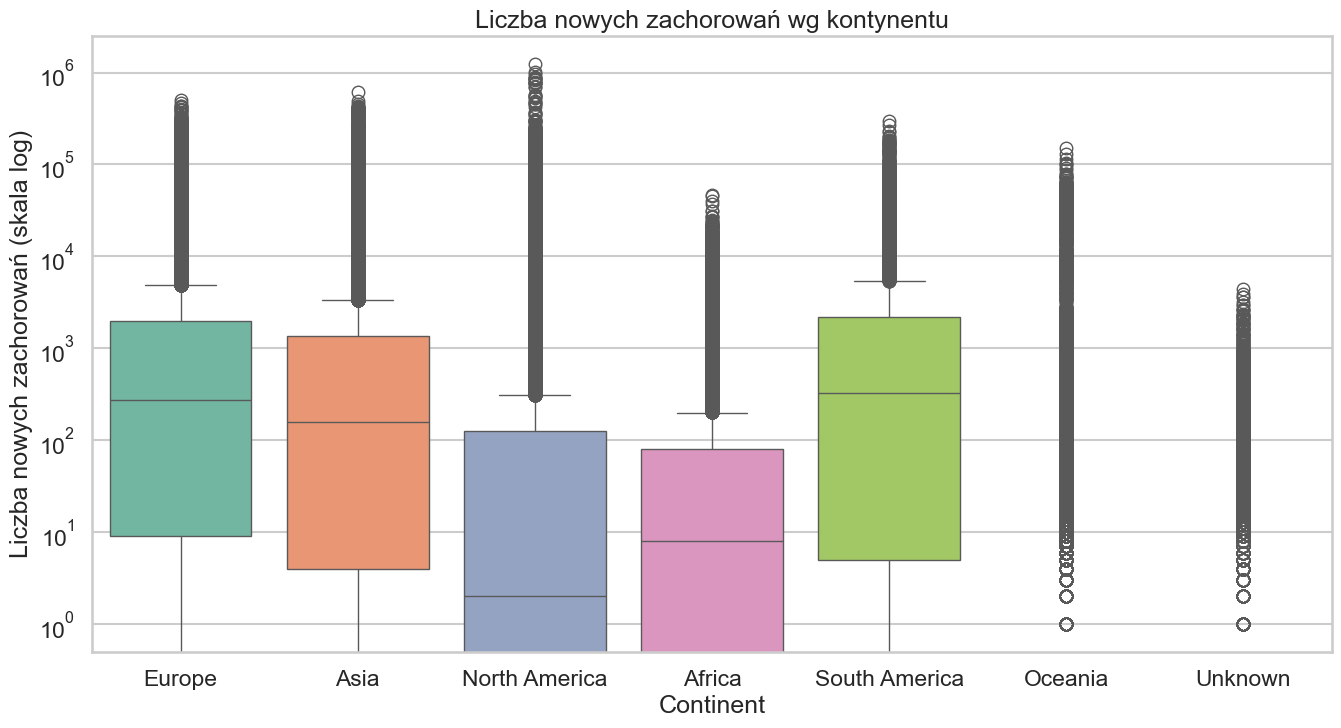

In [146]:
# Z podziałem na kontynenty
plt.figure(figsize=(16, 8))
sns.boxplot(
    x='Continent',
    y='new_confirmed',
    data=df,
    hue='Continent',
    palette='Set2',
    legend=False
)
plt.title("Liczba nowych zachorowań wg kontynentu")
plt.ylabel('Liczba nowych zachorowań (skala log)')
plt.yscale('log')
plt.show()


1.2. the number of new deaths

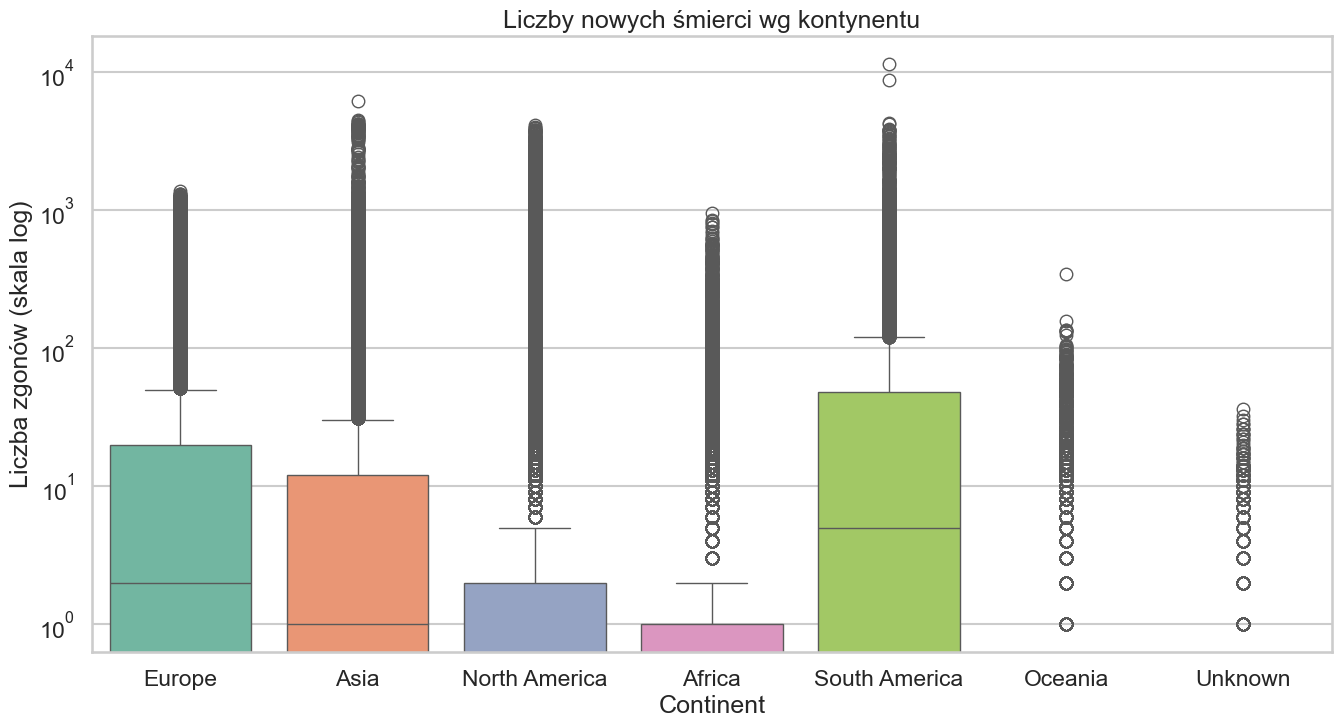

In [147]:
# Z podziałem na kontynenty
plt.figure(figsize=(16, 8))
sns.boxplot(
    x='Continent',
    y='new_deceased',
    data=df,
    hue='Continent',
    palette='Set2',
    legend=False
)
plt.title("Liczby nowych śmierci wg kontynentu")
plt.ylabel('Liczba zgonów (skala log)')
plt.yscale('log')
plt.show()


1.3. the number of new vaccinations

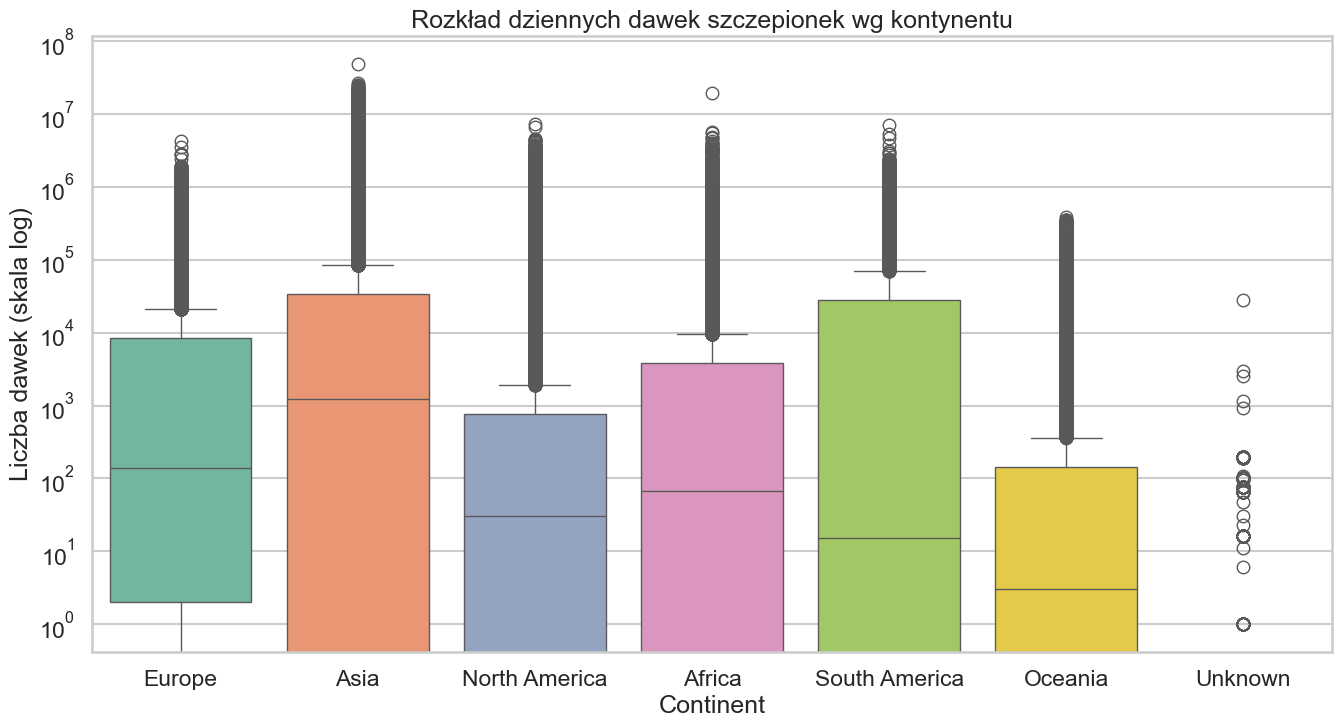

In [148]:
# Z podziałem na kontynenty
plt.figure(figsize=(16, 8))
sns.boxplot(
    x='Continent',
    y='new_vaccine_doses_administered',
    data=df,
    hue='Continent',
    palette='Set2',
    legend=False
)
plt.title('Rozkład dziennych dawek szczepionek wg kontynentu')
plt.ylabel('Liczba dawek (skala log)')
plt.yscale('log')
plt.show()


1.4. population

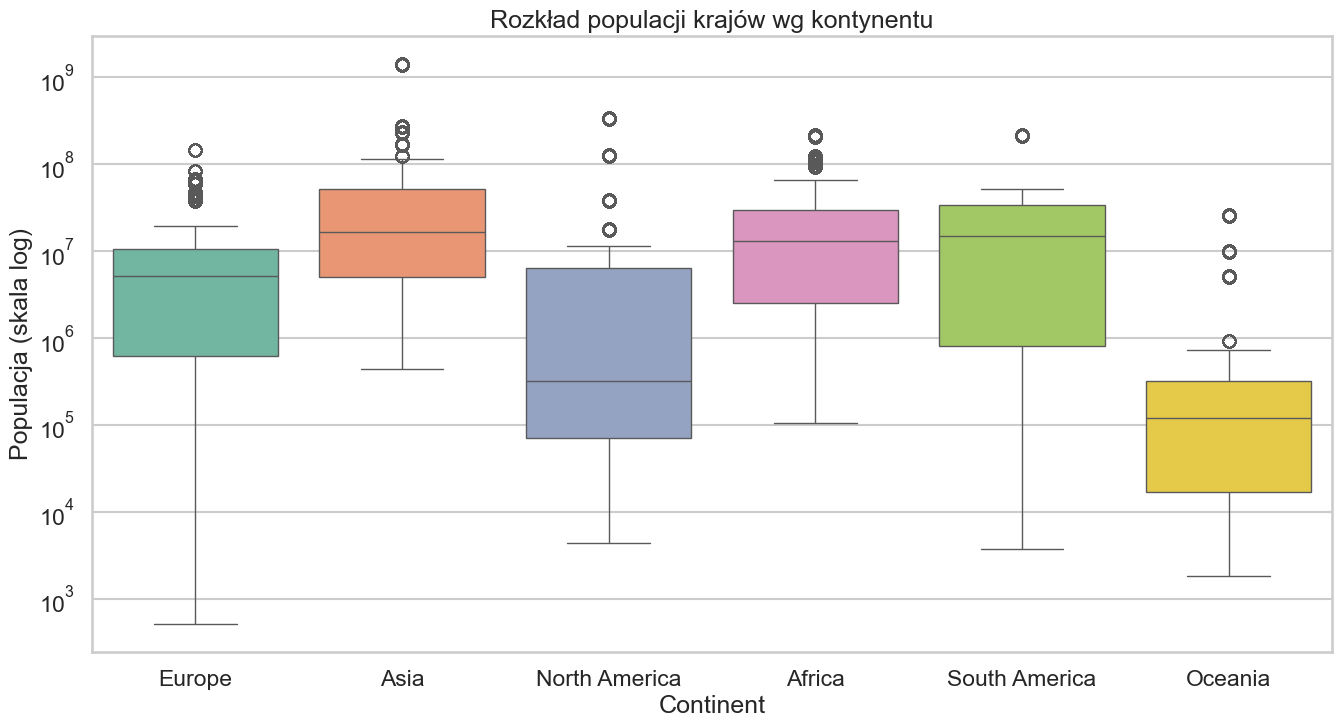

In [158]:
# Z podziałem na kontynenty
plt.figure(figsize=(16, 8))
sns.boxplot(
    x='Continent',
    y='Population',
    data=df[df['Continent'] != 'Unknown'],
    hue='Continent',
    palette='Set2',
    legend=False
)
plt.title('Rozkład populacji krajów wg kontynentu')
plt.ylabel('Populacja (skala log)')
plt.yscale('log')
plt.show()



1.5 GDP

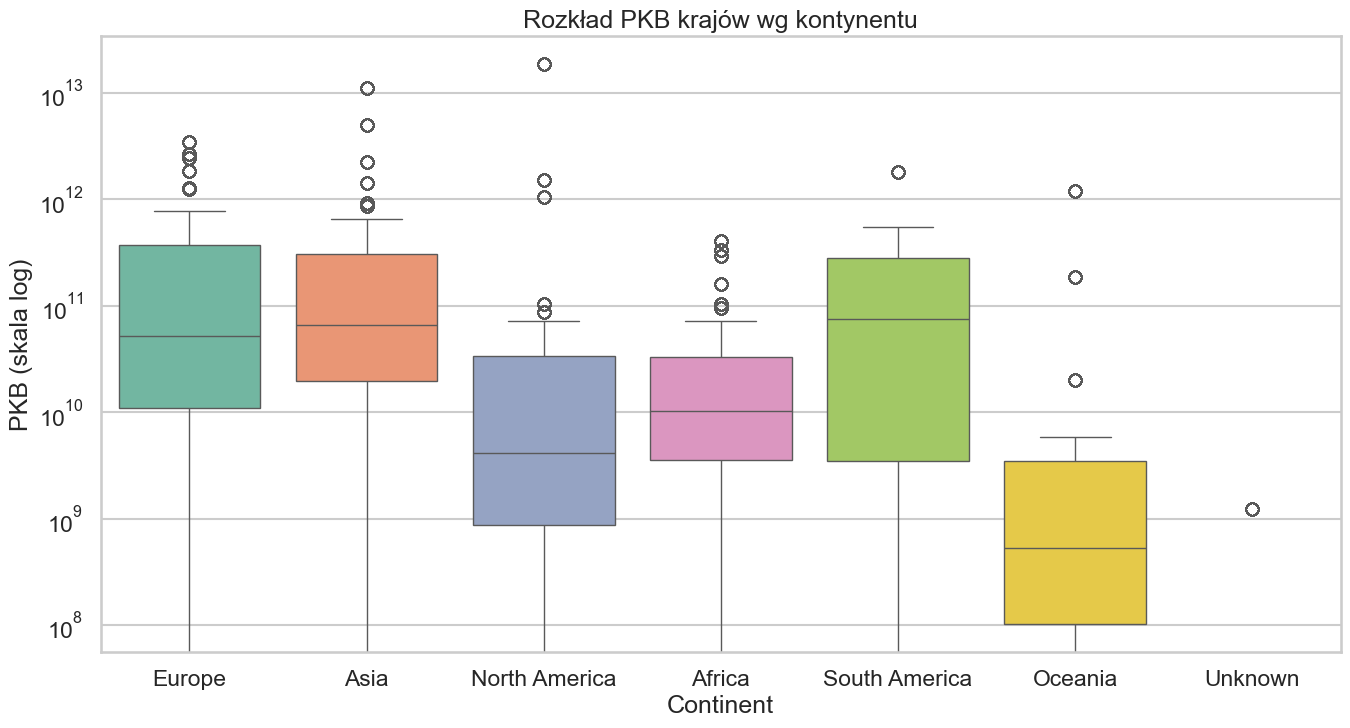

In [150]:
# Z podziałem na kontynenty
plt.figure(figsize=(16, 8))
sns.boxplot(
    x='Continent',
    y='GDP',
    data=df,
    hue='Continent',
    palette='Set2',
    legend=False
)
plt.title('Rozkład PKB krajów wg kontynentu')
plt.ylabel('PKB (skala log)')
plt.yscale('log')
plt.show()



1.6.1 Availability of hospital beds per 1,000 inhabitants

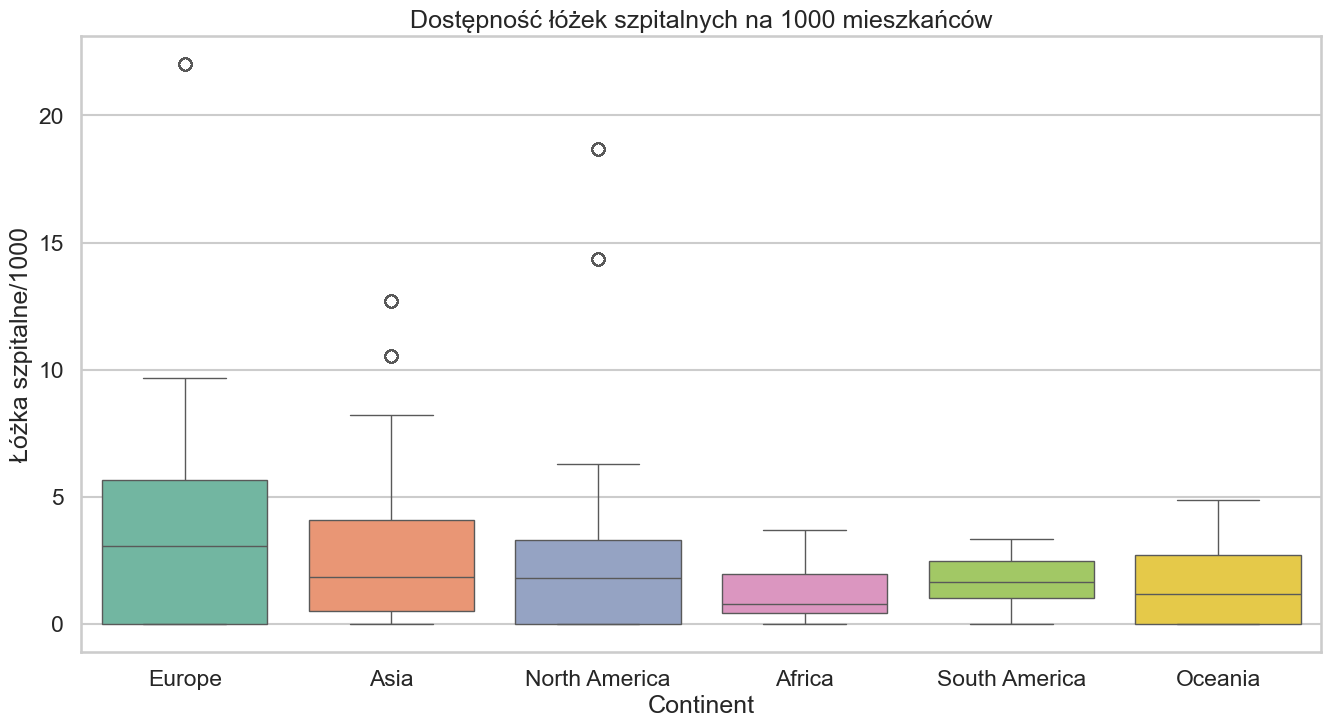

In [151]:
# Z podziałem na kontynenty
plt.figure(figsize=(16, 8))
sns.boxplot(
    x='Continent',
    y='hospital_beds_per_1000',
    data=df[df['Continent'] != 'Unknown'],
    hue='Continent',
    palette='Set2',
    legend=False
)
plt.title('Dostępność łóżek szpitalnych na 1000 mieszkańców')
plt.ylabel('Łóżka szpitalne/1000')
# plt.yscale('log')
plt.show()


1.6.2 Suicide rate per 100 000 inhabitants

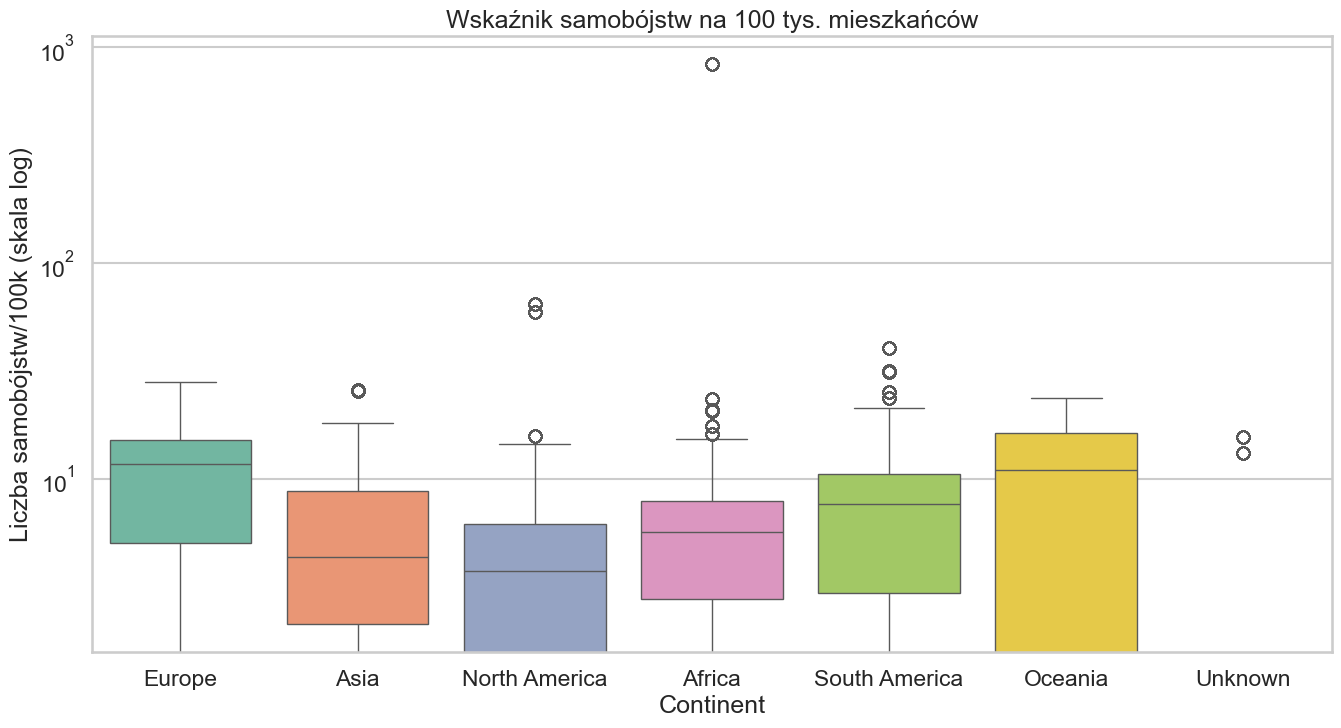

In [152]:
# Z podziałem na kontynenty
plt.figure(figsize=(16, 8))
sns.boxplot(
    x='Continent',
    y='SuicideRate_BothSexes_RatePer100k',
    data=df,
    hue='Continent',
    palette='Set2',
    legend=False
)
plt.title('Wskaźnik samobójstw na 100 tys. mieszkańców')
plt.ylabel('Liczba samobójstw/100k (skala log)')
plt.yscale('log')
plt.show()


1.6.3 Average earnings by continent

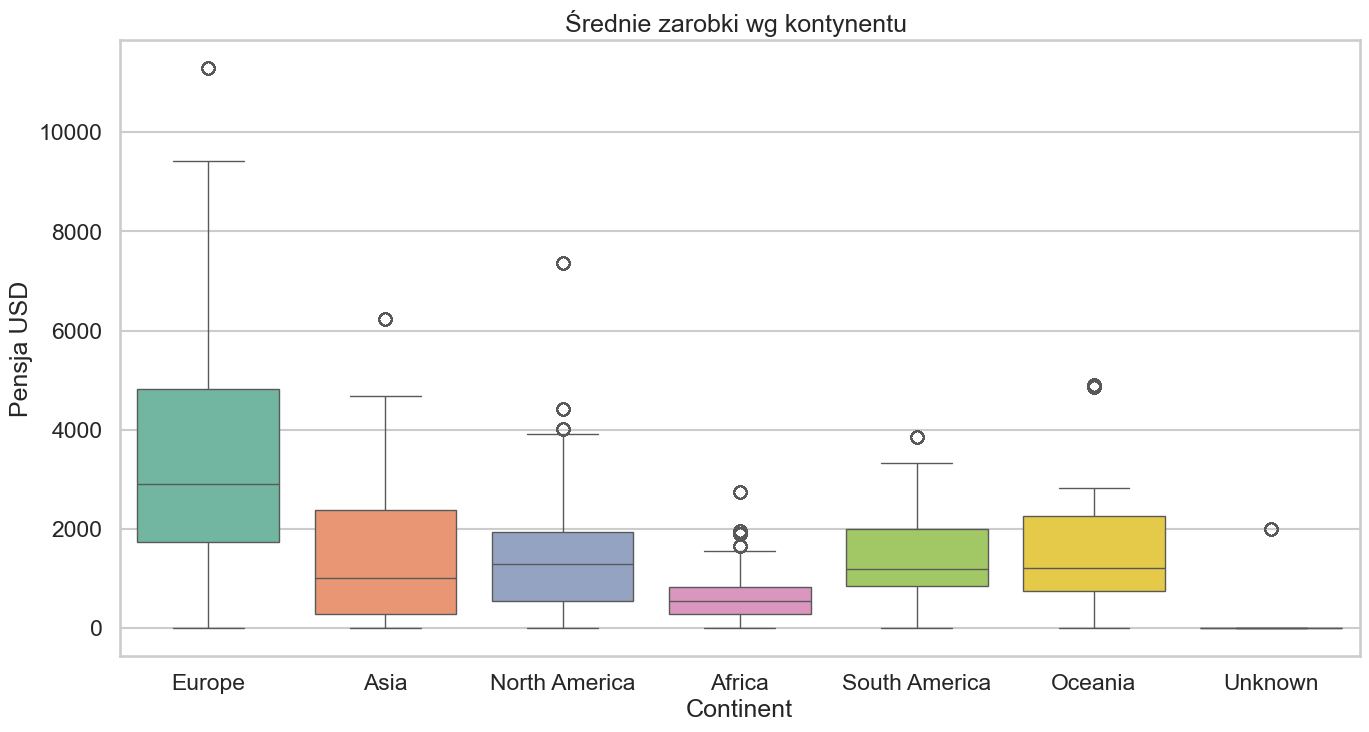

In [157]:
# Z podziałem na kontynenty
plt.figure(figsize=(16, 8))
sns.boxplot(
    x='Continent',
    y='average_salary',
    data=df,
    hue='Continent',
    palette='Set2',
    legend=False
)
plt.title("Średnie zarobki wg kontynentu ")
plt.ylabel('Pensja USD')
# plt.yscale('log')
plt.show()


1.6.4 Total unemployment (% of total workforce) by continent

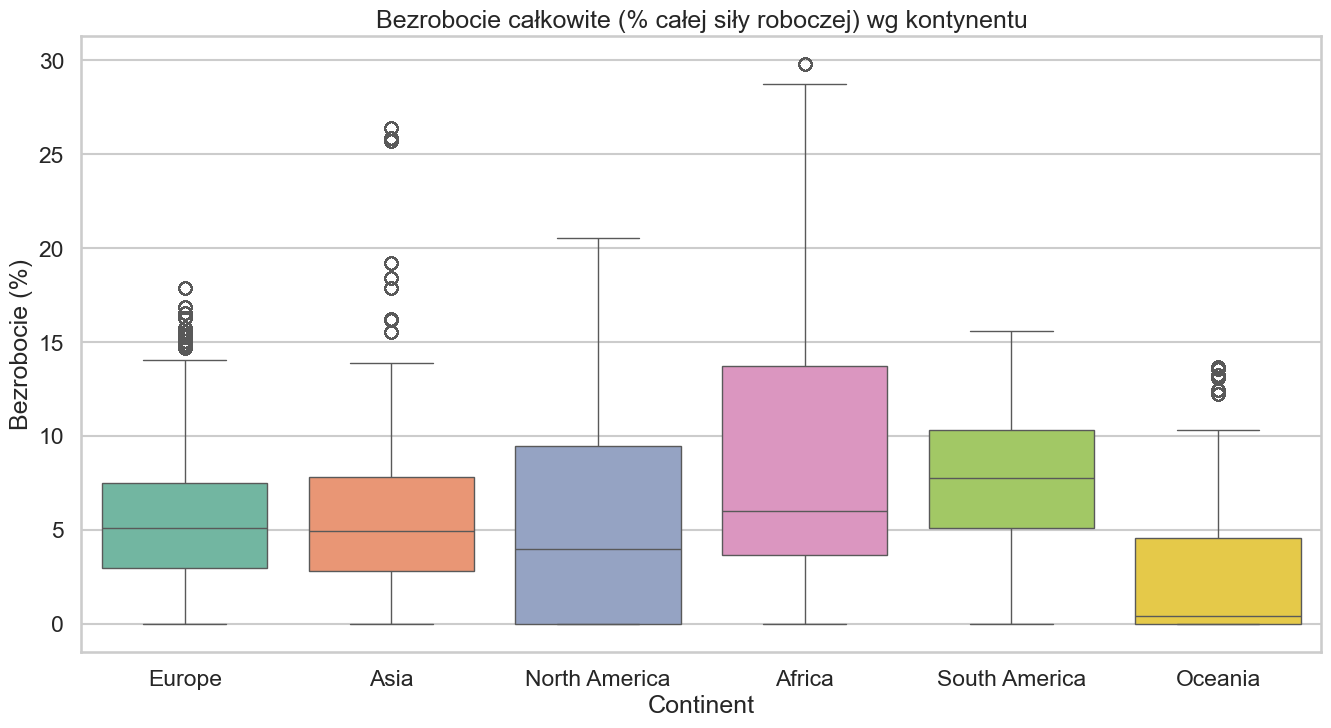

In [155]:
# Z podziałem na kontynenty
plt.figure(figsize=(16, 8))
sns.boxplot(
    x='Continent',
    y='Unemployment, total (% of total labor force)',
    data=df[df['Continent'] != 'Unknown'],
    hue='Continent',
    palette='Set2',
    legend=False
)
plt.title('Bezrobocie całkowite (% całej siły roboczej) wg kontynentu')
plt.ylabel('Bezrobocie (%)')
# plt.yscale('log')
plt.show()



<h1>2. Outliers</h1>

In [119]:
# 1. Usuwanie wartości odstających metodą Z-score dla new_confirmed
# Obliczamy Z-score dla kolumny 'new_confirmed'
z_scores = stats.zscore(df['new_confirmed'])

# Określamy próg, np. 3 (warto go dostosować do konkretnego przypadku)
threshold = 3

# Sprawdzamy, które wiersze mają wartość Z-score < 3 (lub > -3)
mask_new_confirmed = np.abs(z_scores) < threshold

# Filtrowanie DataFrame do wierszy niebędących odstającymi dla 'new_confirmed'
df_no_outliers_confirmed = df[mask_new_confirmed].copy()


In [120]:
# 2. Usuwanie wartości odstających metodą IQR dla new_deceased
Q1 = df_no_outliers_confirmed['new_deceased'].quantile(0.25)
Q3 = df_no_outliers_confirmed['new_deceased'].quantile(0.75)
IQR = Q3 - Q1

# Standardowy mnożnik dla IQR wynosi 1.5, można go dopasować.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}"
      f"\nUpper bound: {upper_bound}")

# Filtrowanie DataFrame do wierszy niebędących odstającymi dla 'new_deceased'
mask_new_deceased = (
        (df_no_outliers_confirmed['new_deceased'] >= lower_bound) &
        (df_no_outliers_confirmed['new_deceased'] <= upper_bound)
)

df2 = df_no_outliers_confirmed[mask_new_deceased].copy()

print(f"Number of rows after outliers removal: {len(df)}")


Lower bound: -7.5
Upper bound: 12.5
Number of rows before outliers removal: 189087


<h1>3. Statistical calculations</h1>

3.1. the average number of new illnesses, deaths and vaccinations for at least 10 selected countries in a selected month

In [121]:
df['date'] = pd.to_datetime(df['date'])

# Filtering data for April 2021 (from April 1 to April 30)
df_april = df[(df['date'] >= '2021-04-01') & (df['date'] <= '2021-04-30')]

# Count the average for the columns of new cases, deaths and vaccinations
aggregations = {
    'new_confirmed': 'mean',
    'new_deceased': 'mean',
    'new_vaccine_doses_administered': ['mean', 'sum'],
    'Continent': 'first'
}

# Data grouping for April 2021
group_april = df_april.groupby('iso_3166_1_alpha_3').agg(aggregations).reset_index()

pd.set_option('display.max_rows', None)

# Average values for April 2021
display(group_april)

# Average values for the entire time interval
group_total = df.groupby('iso_3166_1_alpha_3').agg(aggregations).reset_index()

display(group_total)


iso_3166_1_alpha_3 new_confirmed new_deceased  \
                                mean         mean   
0                  ABW     38.833333     0.400000   
1                  AFG    117.413793     4.448276   
2                  AGO    147.200000     2.066667   
3                  AIA      2.266667     0.000000   
4                  ALB    189.300000     5.166667   
5                  AND     39.300000     0.333333   
6                  ARE   1939.633333     3.066667   
7                  ARM    267.000000    11.000000   
8                  ASM      0.000000     0.000000   
9                  ATG      2.733333     0.133333   
10                 AUS     16.433333     0.033333   
11                 BDI     37.833333     0.000000   
12                 BEN     16.933333     0.200000   
13                 BES      0.000000     0.000000   
14                 BFA     17.766667     0.233333   
15                 BHR   1087.233333     4.166667   
16                 BHS     44.933333     0.366667   
17                 BLR   1231.300000     9.833333   
18                 BLZ      7.066667     0.200000   
19                 BMU     39.200000     0.533333   
20                 BOL    634.200000     9.800000   
21                 BRB      7.033333     0.066667   
22                 BRN      0.466667     0.000000   
23                 BTN      7.400000     0.000000   
24                 BWA    240.846154     1.846154   
25                 CAF    113.833333     0.600000   
26                 CAN      3.576923     0.000000   
27                 CHE   1943.035714     7.928571   
28                 CHN     28.700000     0.200000   
29                 CIV     59.600000     1.300000   
30                 CMR      0.000000     0.000000   
31                 COD     58.266667     0.766667   
32                 COG     31.066667     0.333333   
33                 COK      0.000000     0.000000   
34                 COM      4.500000     0.000000   
35                 CPV    218.000000     1.700000   
36                 CRI    898.208333     7.291667   
37                 CUB   1041.428571     7.071429   
38                 CUW     87.758621     2.034483   
39                 CYM      1.433333     0.000000   
40                 CYP    676.866667     1.833333   
41                 DJI     98.033333     2.466667   
42                 DMA      0.333333     0.000000   
43                 DNK    684.266667     2.300000   
44                 DOM    459.689655     4.931034   
45                 DZA    166.900000     5.500000   
46                 ECU    135.000000     2.500000   
47                 ERI     12.100000     0.000000   
48                 EST    476.360000     6.840000   
49                 FIN    311.866667     1.666667   
50                 FJI      1.666667     0.000000   
51                 FLK      0.300000     0.000000   
52                 FRO      0.100000     0.000000   
53                 FSM      0.000000     0.000000   
54                 GAB    117.500000     0.700000   
55                 GBR   1694.500000    10.000000   
56                 GEO    896.400000     9.000000   
57                 GGY      0.033333     0.000000   
58                 GHA     61.333333     0.933333   
59                 GIB      0.566667     0.000000   
60                 GIN     69.200000     0.566667   
61                 GMB     14.733333     0.333333   
62                 GNB      2.500000     0.066667   
63                 GNQ     22.866667     0.300000   
64                 GRD      0.200000     0.000000   
65                 GRL      0.000000     0.000000   
66                 GTM    444.400000     6.400000   
67                 GUF     80.366667     0.266667   
68                 GUM      5.233333     0.066667   
69                 GUY    101.133333     2.166667   
70                 HKG     10.233333     0.066667   
71                 HND    722.416667     6.000000   
72                 HTI     10.600000     0.433333   
73                 IMN      0

iso_3166_1_alpha_3 new_confirmed new_deceased  \
                                mean         mean   
0                  ABW     43.391919     0.217172   
1                  AFG    107.093787     2.617819   
2                  AGO     93.804928     1.680698   
3                  AIA      3.891019     0.012109   
4                  ALB    299.470779     2.711039   
5                  AND     46.566095     0.156408   
6                  ARE    982.918219     2.018634   
7                  ARG    737.412121     3.336364   
8                  ARM    256.773973     3.223288   
9                  ASM      8.291625     0.034309   
10                 ATG      9.089808     0.146317   
11                 AUS   1207.934286     2.025714   
12                 AUT   2194.681736     4.222423   
13                 AZE    223.561119     2.924890   
14                 BDI     50.335015     0.015136   
15                 BEL   1450.480984     4.836689   
16                 BEN     27.889001     0.164480   
17                 BES      0.000000     0.000000   
18                 BFA     19.338415     0.268293   
19                 BGD    458.896186     2.701271   
20                 BGR    263.000000     3.748515   
21                 BHR    648.660104     1.065285   
22                 BHS     37.021450     0.668029   
23                 BIH    129.032313     3.153061   
24                 BLR    707.351515     5.347879   
25                 BLZ     69.169697     0.672727   
26                 BMU     18.182644     0.149344   
27                 BOL    554.737643     3.254753   
28                 BRA    264.370787     0.808989   
29                 BRB    102.625885     0.496461   
30                 BRN    226.649849     0.131181   
31                 BTN     61.976791     0.021191   
32                 BWA    140.137968     0.709091   
33                 CAF     15.038345     0.114026   
34                 CAN     25.188862     0.084746   
35                 CHE   2804.368707     3.591837   
36                 CHL   1863.852399     4.590406   
37                 CHN    106.579972     1.107093   
38                 CIV     87.772727     0.816162   
39                 CMR     48.045121     0.448059   
40                 COD     89.164271     0.855236   
41                 COG     24.422649     0.350859   
42                 COK      6.447023     0.001009   
43                 COL     70.906015     1.605263   
44                 COM      8.543895     0.161453   
45                 CPV     62.912210     0.413724   
46                 CRI    542.304154     3.587537   
47                 CUB    395.383991     1.627610   
48                 CUW     44.558586     0.275758   
49                 CYM     30.822402     0.031282   
50                 CYP    552.080366     1.045778   
51                 CZE    491.084532     2.793165   
52                 DEU   2124.851449     4.282609   
53                 DJI     15.832492     0.190716   
54                 DMA     14.986882     0.068618   
55                 DNK   1273.855721     3.026119   
56                 DOM    617.737962     2.720045   
57                 DZA    191.996462     4.454009   
58                 ECU    641.002000     3.040000   
59                 EGY     70.136816     3.149254   
60                 ERI     10.255298     0.103935   
61                 ESP    994.973958     2.156250   
62                 EST    580.395203     2.271116   
63                 ETH    326.904575     3.347712   
64                 FIN    496.590692     2.910501   
65                 FJI     61.835041     0.620902   
66                 FLK      1.903128     0.000000   
67                 FRA   2549.401575     3.031496   
68                 FRO     34.972755     0.028254   
69                 FSM     10.358224     0.030272   
70                 GAB     49.109990     0.308779   
71                 GBR   1528.813665     4.366460   
72                 GEO    364.859402     2.168717   
73                 GGY     31

['Europe' 'Asia' 'North America' 'Africa' 'South America' 'Oceania'
 'Unknown']


C:\Users\dzien\AppData\Local\Temp\ipykernel_11828\1275110820.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=continent_totals, x='Continent', y='new_confirmed', palette='viridis')


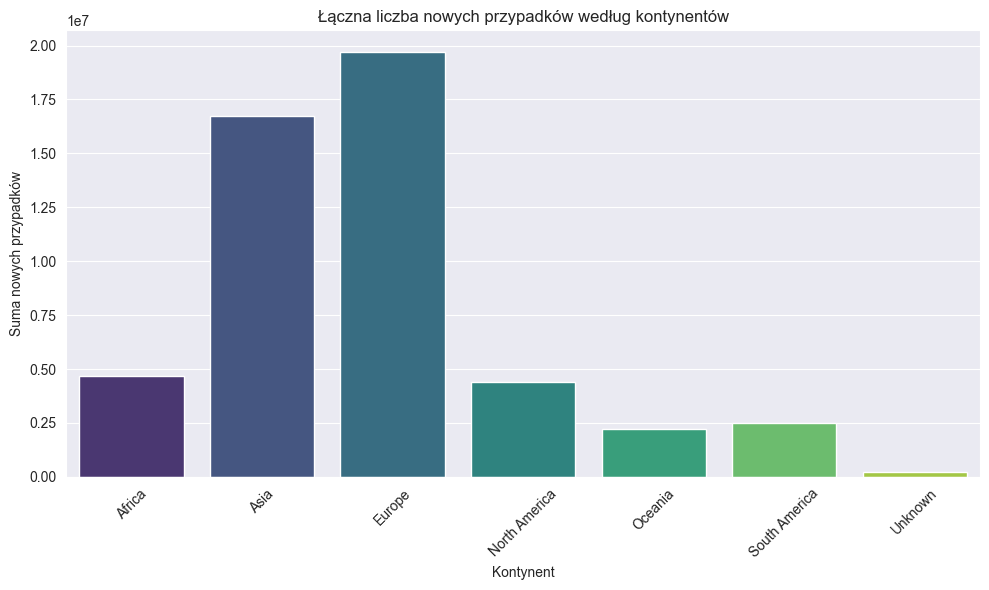

C:\Users\dzien\AppData\Local\Temp\ipykernel_11828\1275110820.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=continent_totals, x='Continent', y='new_deceased', palette='viridis')


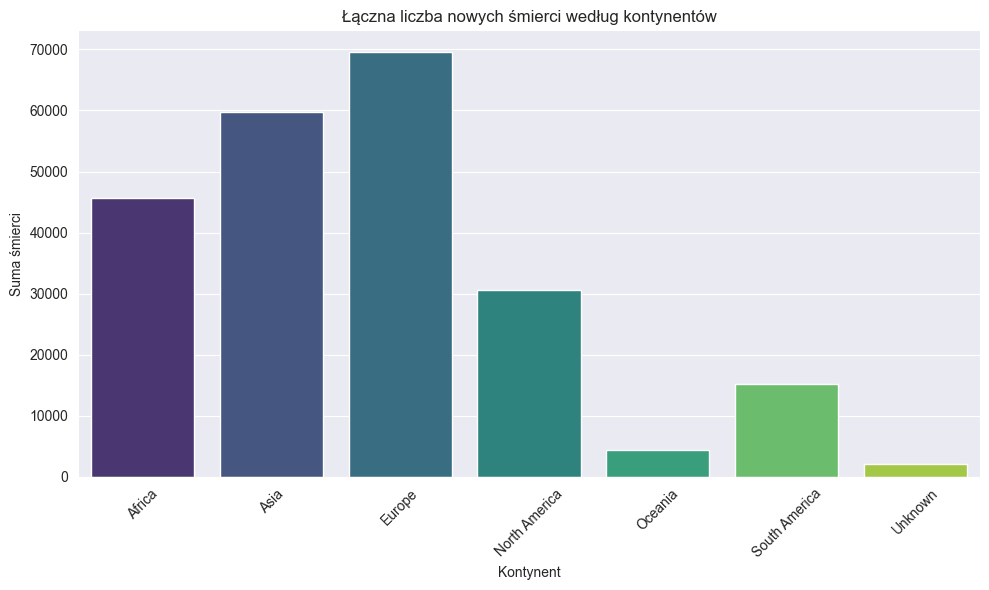

C:\Users\dzien\AppData\Local\Temp\ipykernel_11828\1275110820.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=continent_totals, x='Continent', y='new_persons_fully_vaccinated', palette='viridis', zorder=1, ax=ax2)


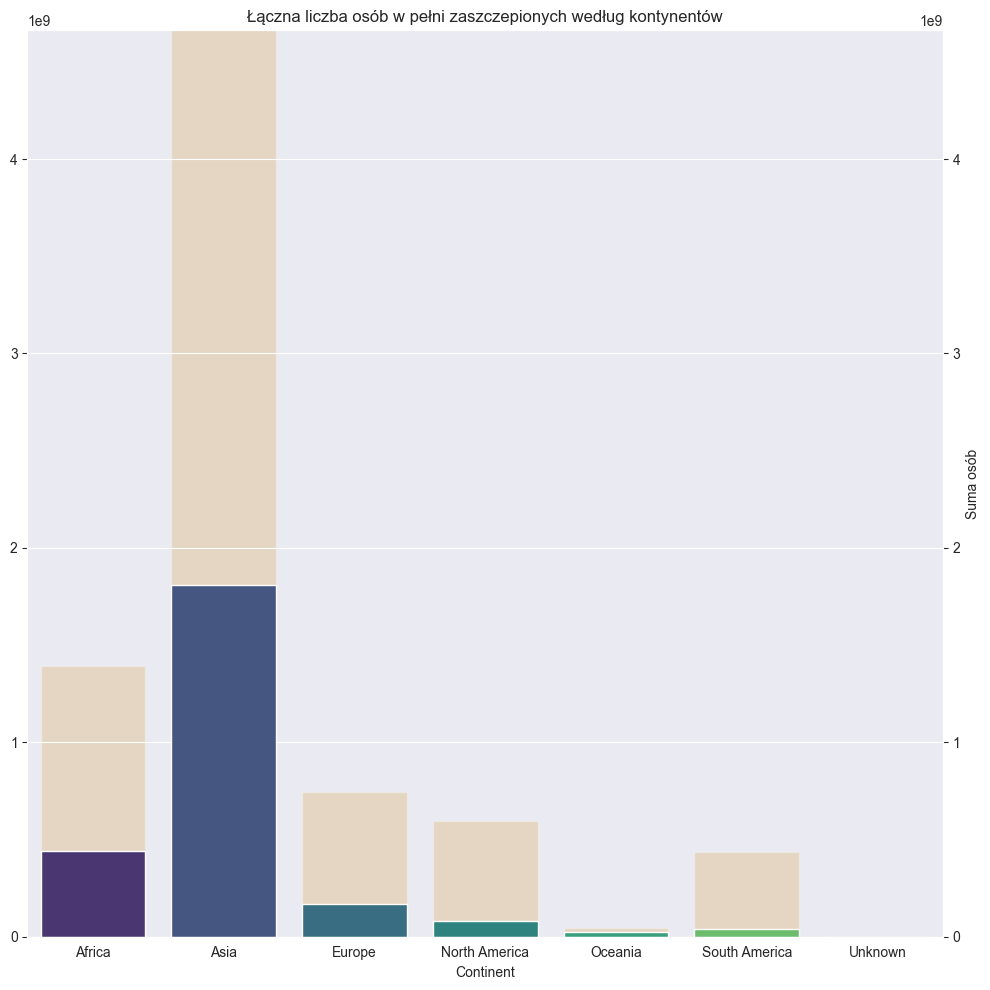

In [122]:
df['date'] = pd.to_datetime(df['date'])
print(df['Continent'].unique())
avg_population_by_country = df.groupby('iso_3166_1_alpha_3', as_index=False).agg({
    'Continent': 'first',
    'Population': 'mean'
})
pop_by_continent = avg_population_by_country.groupby('Continent')['Population'].sum().reset_index()

# --- Wykres 1: Wykres słupkowy - suma nowych przypadków według kontynentów ---

# Grupujemy dane według kontynentu
continent_totals = df.groupby('Continent')['new_confirmed'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=continent_totals, x='Continent', y='new_confirmed', palette='viridis')
plt.title('Łączna liczba nowych przypadków według kontynentów')
plt.xlabel('Kontynent')
plt.ylabel('Suma nowych przypadków')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Grupujemy dane według kontynentu
continent_totals = df.groupby('Continent')['new_deceased'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=continent_totals, x='Continent', y='new_deceased', palette='viridis')
plt.title('Łączna liczba nowych śmierci według kontynentów')
plt.xlabel('Kontynent')
plt.ylabel('Suma śmierci')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Grupujemy dane według kontynentu
continent_totals = df.groupby('Continent')['new_persons_fully_vaccinated'].sum().reset_index()
# continent_totals['new_persons_fully_vaccinated'] = continent_totals['new_persons_fully_vaccinated']

fig, ax1 = plt.subplots(figsize=(10, 10))



sns.barplot(data=pop_by_continent, x='Continent', y='Population', color='#EFAE3E', alpha=0.3, ax=ax1)
ax1.set_ylabel('')
ax1.grid(False)

ax2 = ax1.twinx()
sns.barplot(data=continent_totals, x='Continent', y='new_persons_fully_vaccinated', palette='viridis', zorder=1, ax=ax2)
ax2.set_ylabel('Suma osób')

y_max = max(pop_by_continent['Population'].max(), continent_totals['new_persons_fully_vaccinated'].max())

ax1.set_ylim(0, y_max)
ax2.set_ylim(0, y_max)


plt.title('Łączna liczba osób w pełni zaszczepionych według kontynentów')
plt.xlabel('Kontynent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\dzien\AppData\Local\Temp\ipykernel_11828\3804154689.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Continent', y='new_confirmed', palette='Set2')


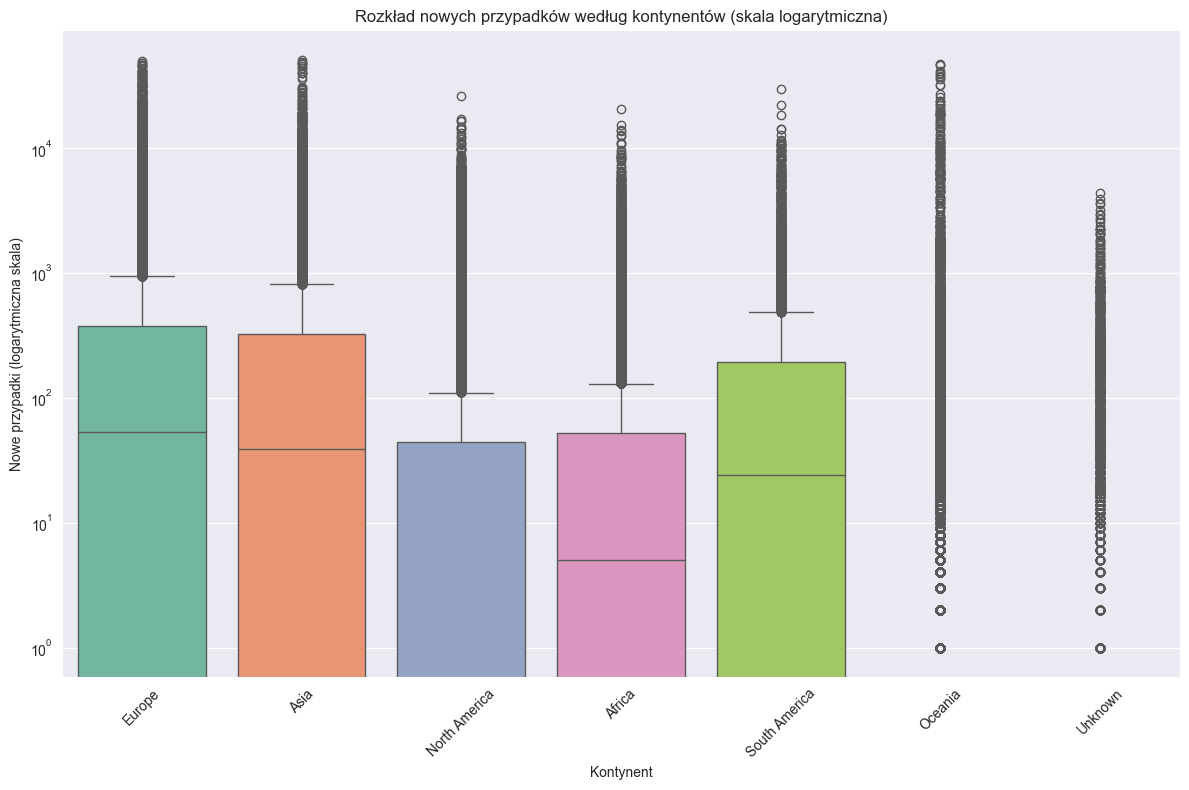

C:\Users\dzien\AppData\Local\Temp\ipykernel_11828\3804154689.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Continent', y='new_deceased', palette='Set2')


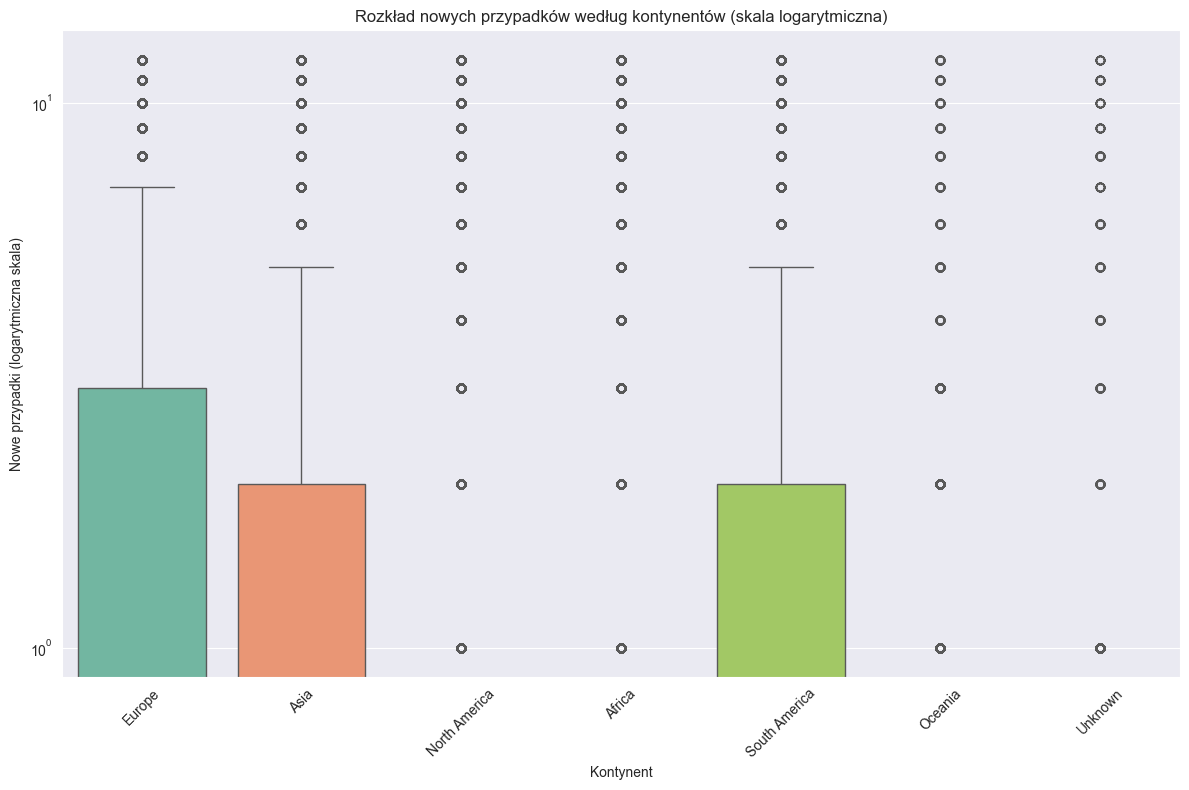

C:\Users\dzien\AppData\Local\Temp\ipykernel_11828\3804154689.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Continent', y='new_persons_fully_vaccinated', palette='Set2')


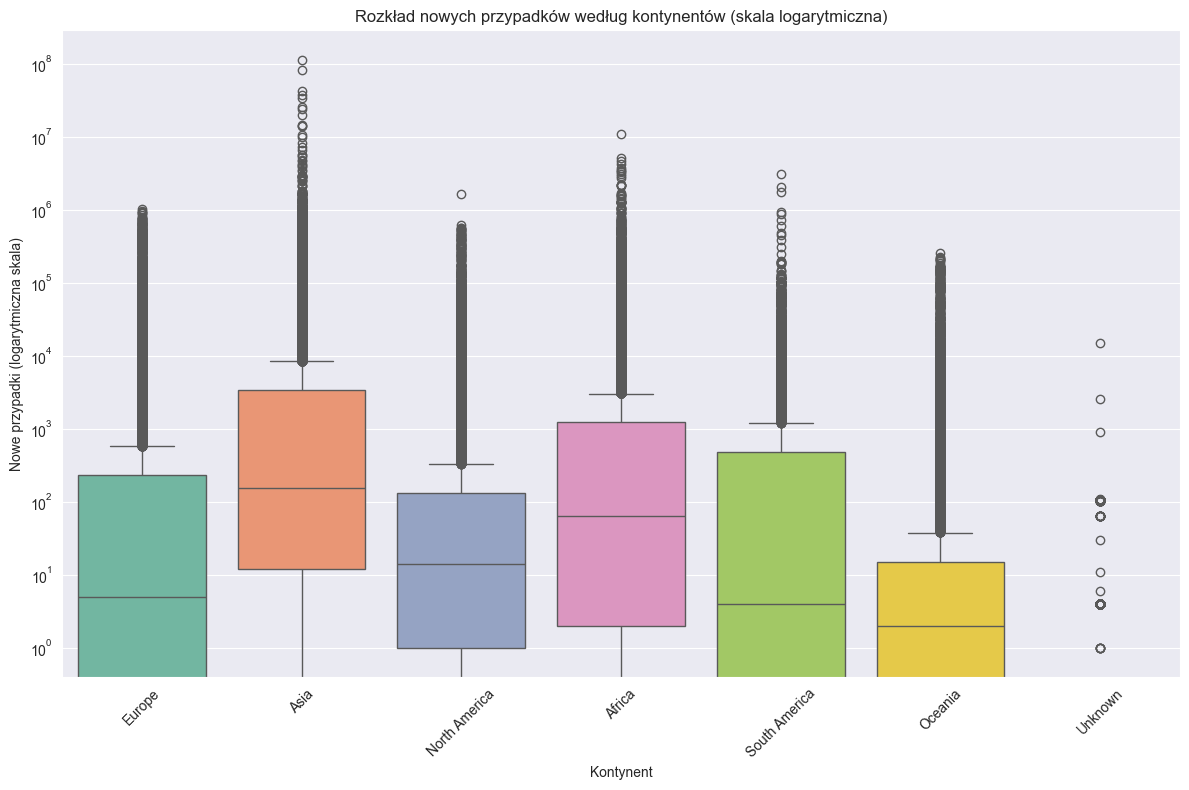

In [123]:

# --- Wykres 2: Wykres pudełkowy - rozkład nowych przypadków dla poszczególnych kontynentów ---

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Continent', y='new_confirmed', palette='Set2')
plt.yscale('log')  # Użycie skali logarytmicznej
plt.title('Rozkład nowych przypadków według kontynentów (skala logarytmiczna)')
plt.xlabel('Kontynent')
plt.ylabel('Nowe przypadki (logarytmiczna skala)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Continent', y='new_deceased', palette='Set2')
plt.yscale('log')  # Użycie skali logarytmicznej
plt.title('Rozkład nowych przypadków według kontynentów (skala logarytmiczna)')
plt.xlabel('Kontynent')
plt.ylabel('Nowe przypadki (logarytmiczna skala)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Continent', y='new_vaccine_doses_administered', palette='Set2')
plt.yscale('log')  # Użycie skali logarytmicznej
plt.title('Rozkład nowych przypadków według kontynentów (skala logarytmiczna)')
plt.xlabel('Kontynent')
plt.ylabel('Nowe przypadki (logarytmiczna skala)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


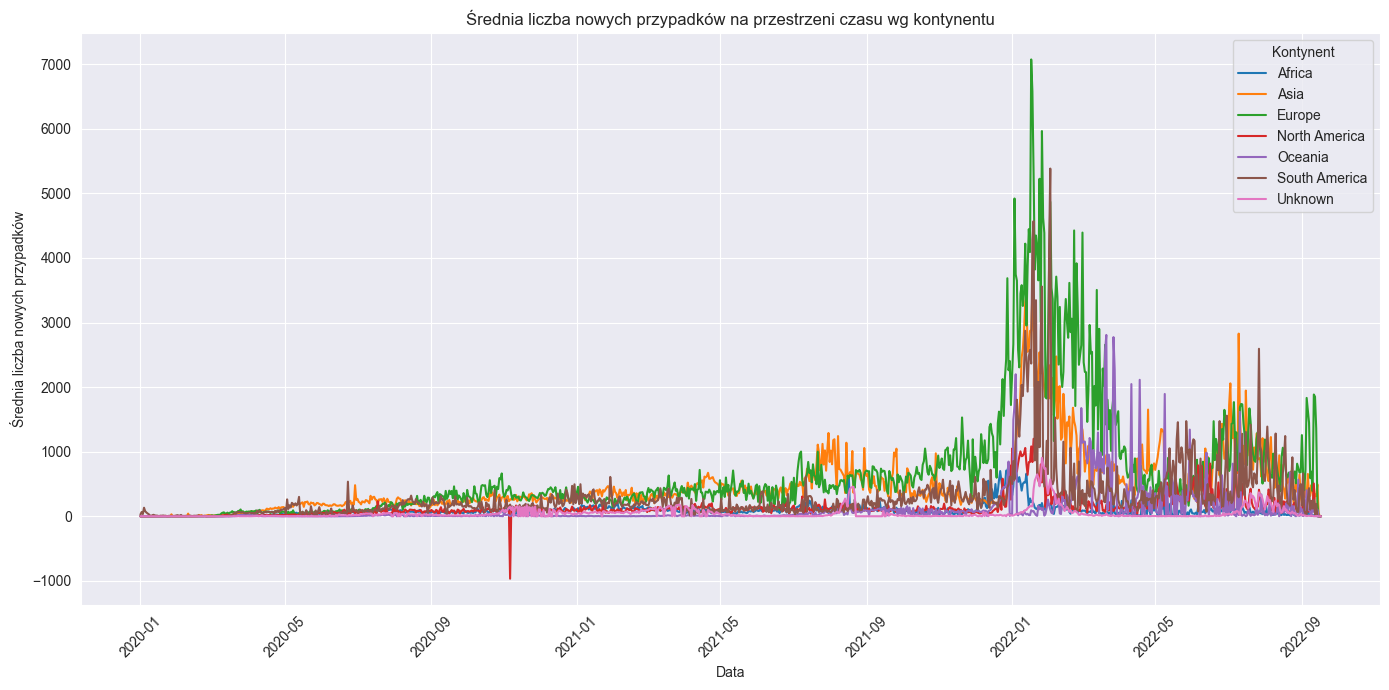

In [124]:

# --- Wykres 3: Wykres liniowy - średnia liczba nowych przypadków na przestrzeni czasu wg kontynentu ---

time_trend = df.groupby(['date', 'Continent'])['new_confirmed'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=time_trend, x='date', y='new_confirmed', hue='Continent', palette='tab10')
plt.title('Liczba nowych przypadków na przestrzeni czasu według kontynentu')
plt.xlabel('Data')
plt.ylabel('Średnia liczba nowych przypadków')
plt.legend(title='Kontynent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


time_trend = df.groupby(['date', 'Continent'])['new_deceased'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=time_trend, x='date', y='new_deceased', hue='Continent', palette='tab10')
plt.title('Liczba nowych śmierci na przestrzeni czasu według kontynentu')
plt.xlabel('Data')
plt.ylabel('Średnia liczba nowych przypadków')
plt.legend(title='Kontynent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



time_trend = df.groupby(['date', 'Continent'])['new_vaccine_doses_administered'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=time_trend, x='date', y='new_vaccine_doses_administered', hue='Continent', palette='tab10')
plt.title('Liczba nowych szczepień na przestrzeni czasu według kontynentu')
plt.xlabel('Data')
plt.ylabel('Średnia liczba nowych przypadków')
plt.legend(title='Kontynent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


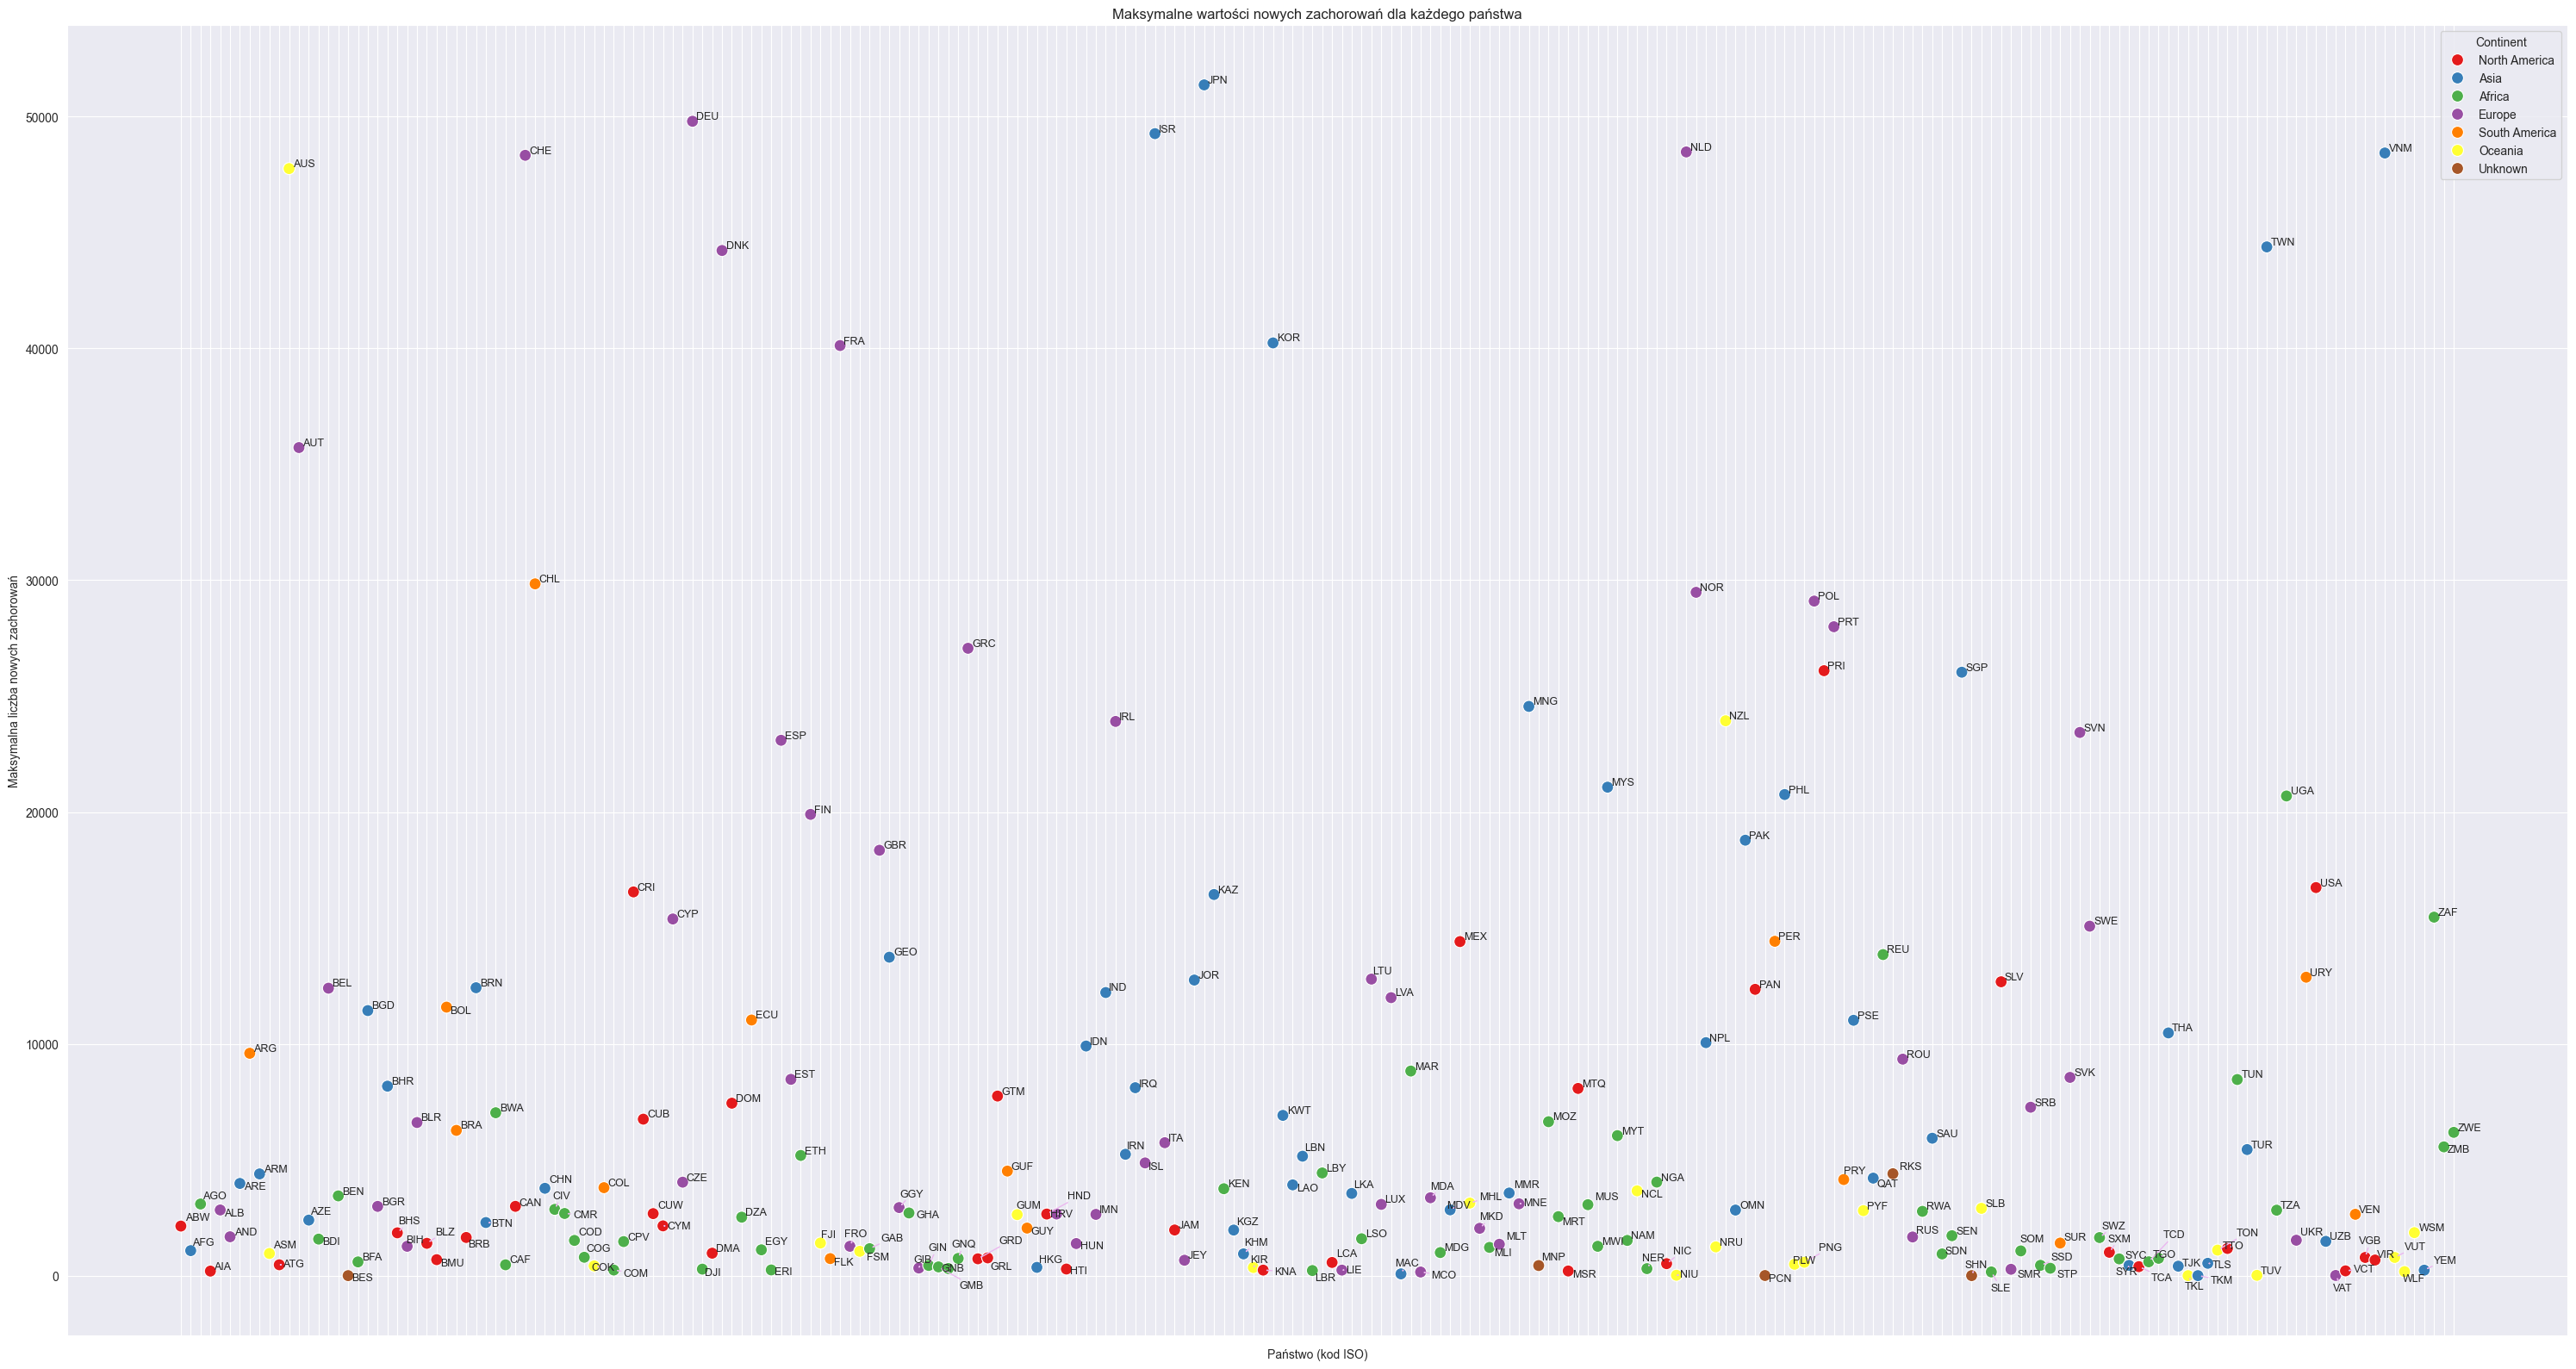

In [125]:
df_max = df.groupby('iso_3166_1_alpha_3').agg({
    'new_confirmed': 'sum',
    'Continent': 'first'
}).reset_index()

# Ustawienia wykresu
plt.figure(figsize=(30, 16))
scatter_ax = sns.scatterplot(data=df_max, x='iso_3166_1_alpha_3', y='new_confirmed',
                             hue='Continent', palette='Set1', s=100)

plt.title('Maksymalne wartości nowych zachorowań dla każdego państwa')
plt.xlabel('Państwo (kod ISO)')
plt.ylabel('Maksymalna liczba nowych zachorowań')
plt.xticks(rotation=45)

texts = []
for idx, row in df_max.iterrows():
    texts.append(plt.text(row['iso_3166_1_alpha_3'], row['new_confirmed'], row['iso_3166_1_alpha_3'],
                          fontsize=9))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='#EBB7EF'))

scatter_ax.set_xticklabels([])


plt.tight_layout()
plt.show()



df_max = df.groupby('iso_3166_1_alpha_3').agg({
    'new_deceased': 'sum',
    'Continent': 'first'
}).reset_index()

# Ustawienia wykresu
plt.figure(figsize=(30, 16))
scatter_ax = sns.scatterplot(data=df_max, x='iso_3166_1_alpha_3', y='new_deceased',
                             hue='Continent', palette='Set1', s=100)

plt.title('Wartości nowych śmierci dla każdego państwa')
plt.xlabel('Państwo (kod ISO)')
plt.ylabel('Liczba nowych śmierci')
plt.xticks(rotation=45)

texts = []
for idx, row in df_max.iterrows():
    texts.append(plt.text(row['iso_3166_1_alpha_3'], row['new_deceased'], row['iso_3166_1_alpha_3'],
                          fontsize=9))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='#EBB7EF'))

scatter_ax.set_xticklabels([])


plt.tight_layout()
plt.show()



df_max = df.groupby('iso_3166_1_alpha_3').agg({
    'new_vaccine_doses_administered': 'max',
    'Continent': 'first'
}).reset_index()

# Ustawienia wykresu
plt.figure(figsize=(30, 16))
scatter_ax = sns.scatterplot(data=df_max, x='iso_3166_1_alpha_3', y='new_vaccine_doses_administered',
                             hue='Continent', palette='Set1', s=100)

plt.title('Wartości nowych szczepień dla każdego państwa')
plt.xlabel('Państwo (kod ISO)')
plt.ylabel('Liczba nowych szczepień')
plt.xticks(rotation=45)

texts = []
for idx, row in df_max.iterrows():
    texts.append(plt.text(row['iso_3166_1_alpha_3'], row['new_vaccine_doses_administered'], row['iso_3166_1_alpha_3'],
                          fontsize=9))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='#EBB7EF'))

scatter_ax.set_xticklabels([])


plt.tight_layout()
plt.show()


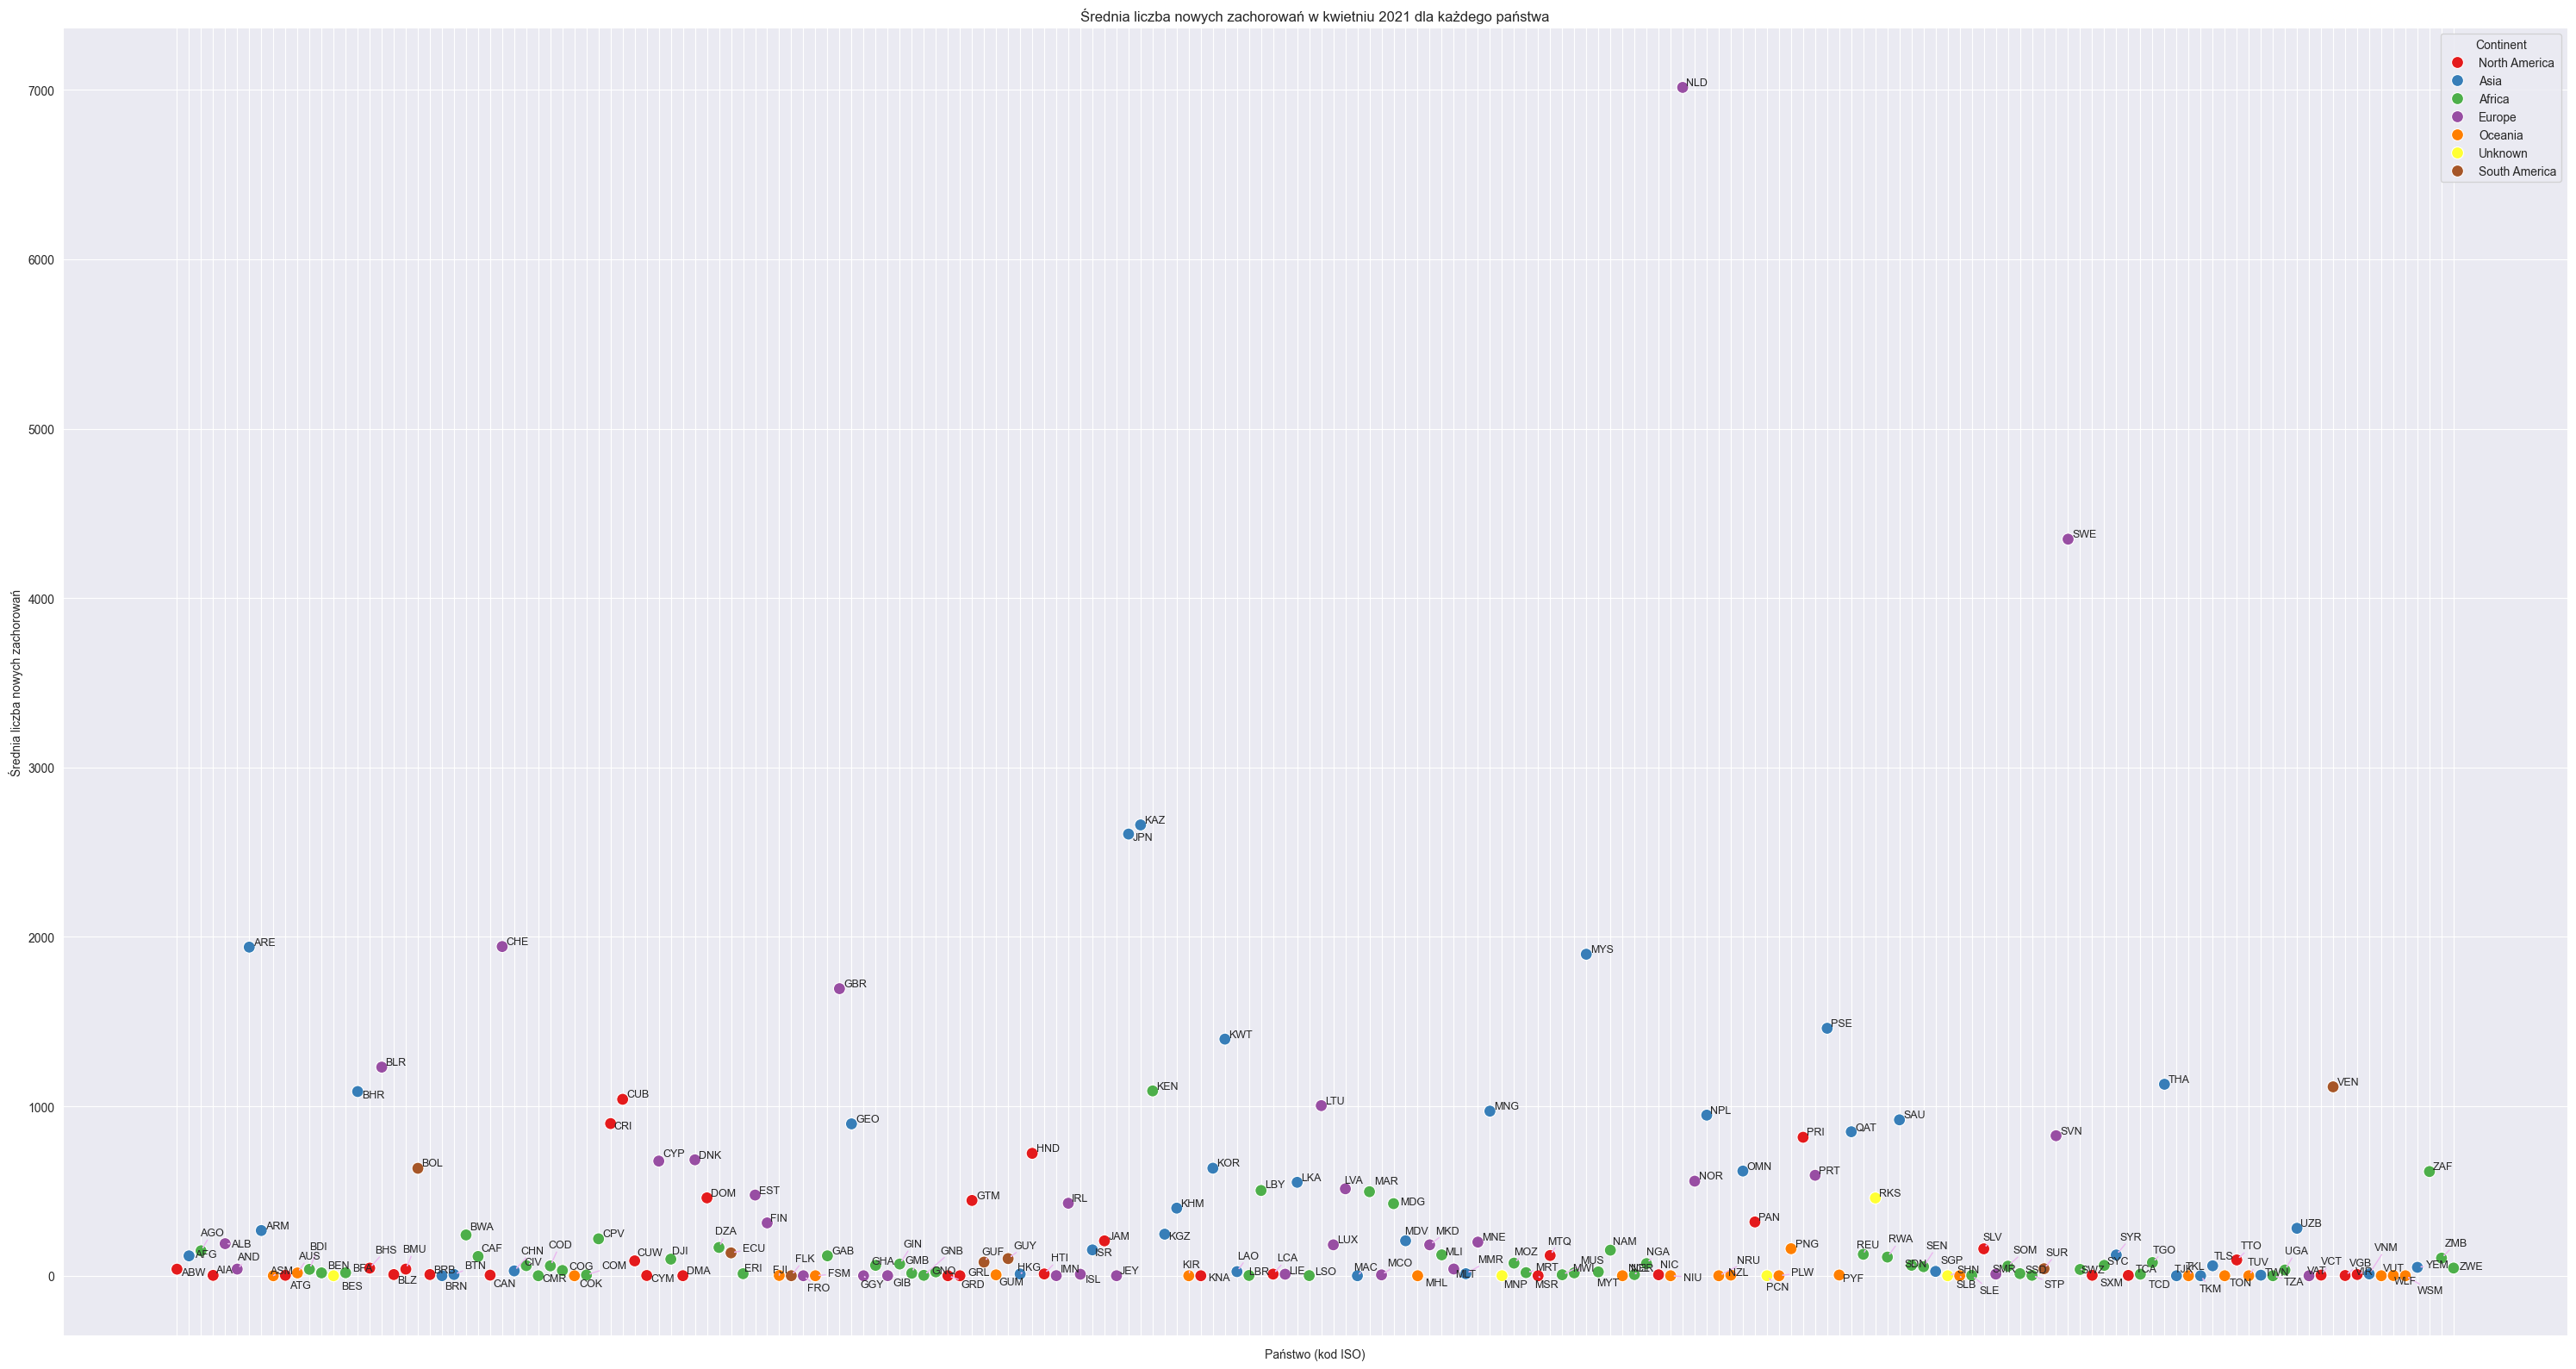

In [126]:
# spłaszczenie indeksu kolumn (MultiIndex)
group_april.columns = ['iso_3166_1_alpha_3',
                       'new_confirmed_mean',
                       'new_deceased_mean',
                       'new_vaccine_doses_administered_mean',
                       'new_vaccine_doses_administered_sum',
                       'Continent']

plt.figure(figsize=(30, 16))
scatter_ax = sns.scatterplot(data=group_april,
                             x='iso_3166_1_alpha_3',
                             y='new_confirmed_mean',
                             hue='Continent',
                             palette='Set1',
                             s=100)

plt.title('Średnia liczba nowych zachorowań w kwietniu 2021 dla każdego państwa')
plt.xlabel('Państwo (kod ISO)')
plt.ylabel('Średnia liczba nowych zachorowań')
plt.xticks(rotation=45)

# Dodawanie etykiet dla punktów
texts = []
for idx, row in group_april.iterrows():
    texts.append(plt.text(row['iso_3166_1_alpha_3'], row['new_confirmed_mean'], row['iso_3166_1_alpha_3'], fontsize=9))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='#EBB7EF'))

scatter_ax.set_xticklabels([])

plt.tight_layout()
plt.show()



plt.figure(figsize=(30, 16))
scatter_ax = sns.scatterplot(data=group_april,
                             x='iso_3166_1_alpha_3',
                             y='new_deceased_mean',
                             hue='Continent',
                             palette='Set1',
                             s=100)

plt.title('Średnia liczba nowych śmierci w kwietniu 2021 dla każdego państwa')
plt.xlabel('Państwo (kod ISO)')
plt.ylabel('Średnia liczba nowych śmierci')
plt.xticks(rotation=45)

# Dodawanie etykiet dla punktów
texts = []
for idx, row in group_april.iterrows():
    texts.append(plt.text(row['iso_3166_1_alpha_3'], row['new_deceased_mean'], row['iso_3166_1_alpha_3'], fontsize=9))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='#EBB7EF'))

scatter_ax.set_xticklabels([])

plt.tight_layout()
plt.show()



plt.figure(figsize=(30, 16))
scatter_ax = sns.scatterplot(data=group_april,
                             x='iso_3166_1_alpha_3',
                             y='new_vaccine_doses_administered_mean',
                             hue='Continent',
                             palette='Set1',
                             s=100)

plt.title('Średnia liczba nowych szczepień w kwietniu 2021 dla każdego państwa')
plt.xlabel('Państwo (kod ISO)')
plt.ylabel('Średnia liczba nowych szczepień')
plt.xticks(rotation=45)

# Dodawanie etykiet dla punktów
texts = []
for idx, row in group_april.iterrows():
    texts.append(plt.text(row['iso_3166_1_alpha_3'], row['new_vaccine_doses_administered_mean'], row['iso_3166_1_alpha_3'], fontsize=9))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='#EBB7EF'))

scatter_ax.set_xticklabels([])

plt.tight_layout()
plt.show()


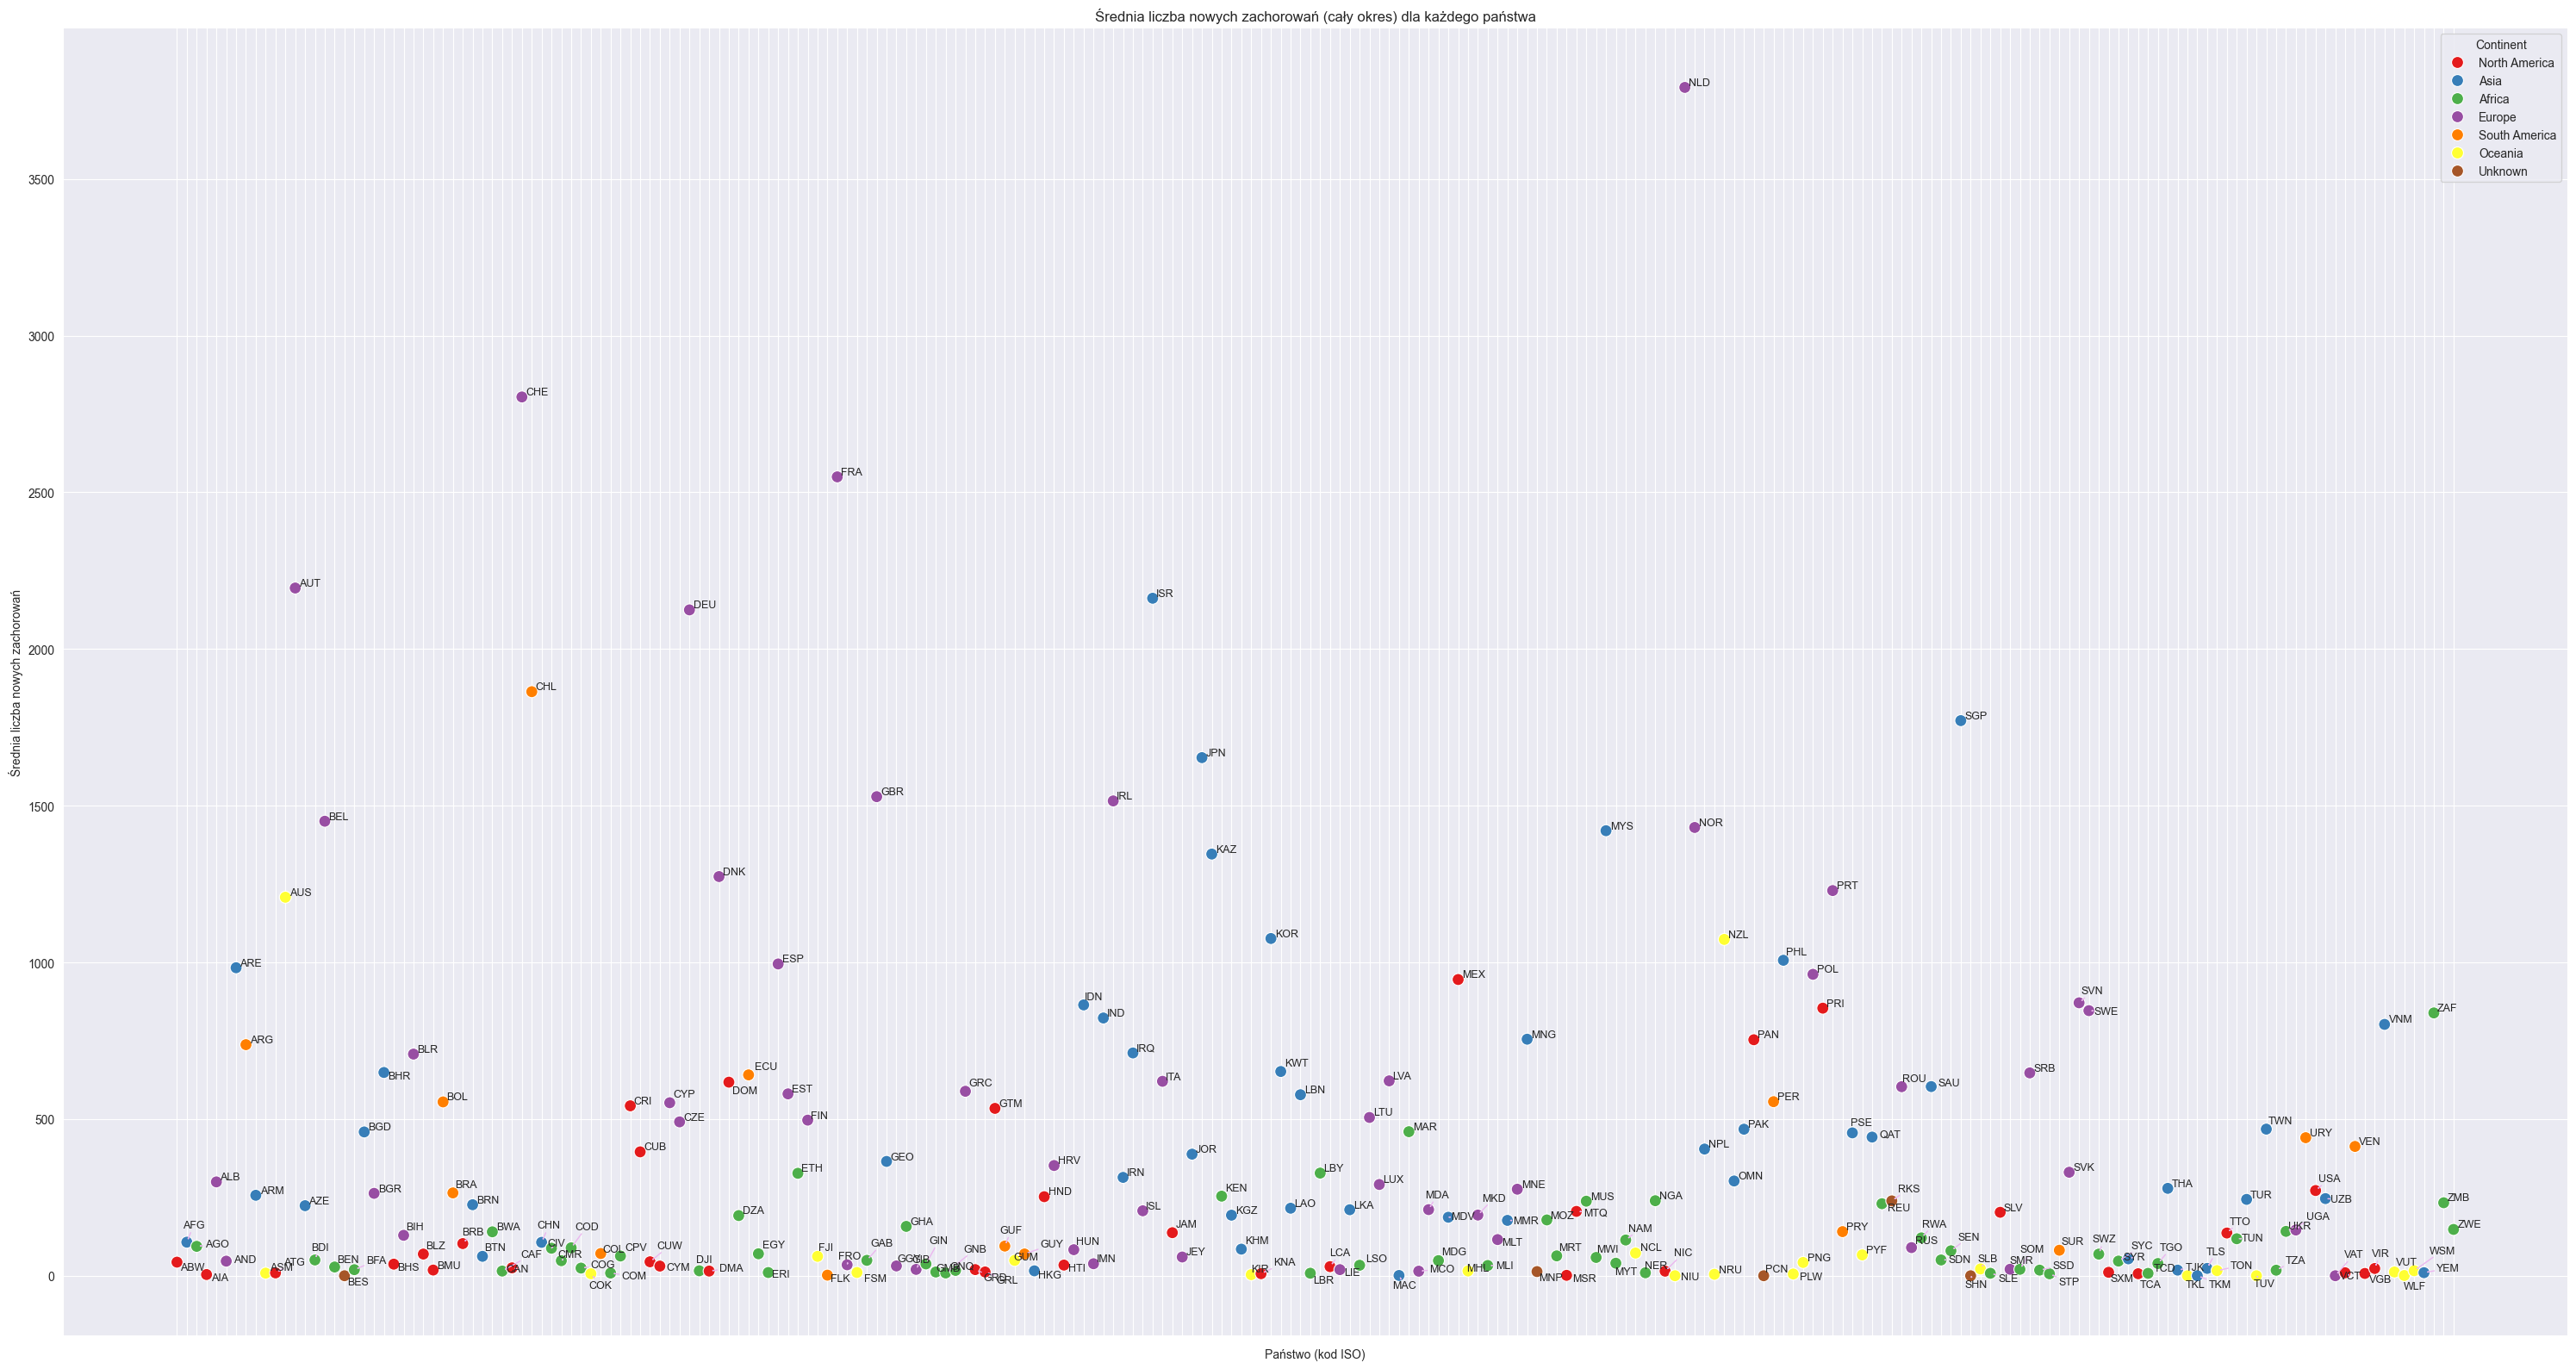

In [127]:
# Spłaszczamy indeks kolumn
group_total.columns = ['iso_3166_1_alpha_3',
                       'new_confirmed_mean',
                       'new_deceased_mean',
                       'new_vaccine_doses_administered_mean',
                       'new_vaccine_doses_administered_sum',
                       'Continent']

# Tworzymy wykres rozrzutu
plt.figure(figsize=(30, 16))
scatter_ax = sns.scatterplot(data=group_total,
                             x='iso_3166_1_alpha_3',
                             y='new_confirmed_mean',
                             hue='Continent',
                             palette='Set1',
                             s=100)

plt.title('Średnia liczba nowych zachorowań (cały okres) dla każdego państwa')
plt.xlabel('Państwo (kod ISO)')
plt.ylabel('Średnia liczba nowych zachorowań')
plt.xticks(rotation=45)

# Dodawanie etykiet punktów
texts = []
for idx, row in group_total.iterrows():
    texts.append(plt.text(row['iso_3166_1_alpha_3'], row['new_confirmed_mean'], row['iso_3166_1_alpha_3'], fontsize=9))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='#EBB7EF'))
scatter_ax.set_xticklabels([])

plt.tight_layout()
plt.show()


# Tworzymy wykres rozrzutu
plt.figure(figsize=(30, 16))
scatter_ax = sns.scatterplot(data=group_total,
                             x='iso_3166_1_alpha_3',
                             y='new_deceased_mean',
                             hue='Continent',
                             palette='Set1',
                             s=100)

plt.title('Średnia liczba nowych śmierci (cały okres) dla każdego państwa')
plt.xlabel('Państwo (kod ISO)')
plt.ylabel('Średnia liczba nowych śmierci')
plt.xticks(rotation=45)

# Dodawanie etykiet punktów
texts = []
for idx, row in group_total.iterrows():
    texts.append(plt.text(row['iso_3166_1_alpha_3'], row['new_deceased_mean'], row['iso_3166_1_alpha_3'], fontsize=9))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='#EBB7EF'))
scatter_ax.set_xticklabels([])

plt.tight_layout()
plt.show()




# Tworzymy wykres rozrzutu
plt.figure(figsize=(30, 16))
scatter_ax = sns.scatterplot(data=group_total,
                             x='iso_3166_1_alpha_3',
                             y='new_vaccine_doses_administered_mean',
                             hue='Continent',
                             palette='Set1',
                             s=100)

plt.title('Średnia liczba nowych szczepień (cały okres) dla każdego państwa')
plt.xlabel('Państwo (kod ISO)')
plt.ylabel('Średnia liczba nowych szczepień')
plt.xticks(rotation=45)

# Dodawanie etykiet punktów
texts = []
for idx, row in group_total.iterrows():
    texts.append(plt.text(row['iso_3166_1_alpha_3'], row['new_vaccine_doses_administered_mean'], row['iso_3166_1_alpha_3'], fontsize=9))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='#EBB7EF'))
scatter_ax.set_xticklabels([])

plt.tight_layout()
plt.show()


3.2. the average change in the number of illnesses, deaths and vaccinations for at least 10 selected countries in the selected month

In [128]:
df['date'] = pd.to_datetime(df['date'])

# Sorting data by country and date
df_sorted = df.sort_values(['iso_3166_1_alpha_3', 'date'])

# Calculation of daily changes for each country
df_sorted['change_confirmed'] = df_sorted.groupby('iso_3166_1_alpha_3')['new_confirmed'].diff()
df_sorted['change_deceased'] = df_sorted.groupby('iso_3166_1_alpha_3')['new_deceased'].diff()
df_sorted['change_vaccine_doses'] = df_sorted.groupby('iso_3166_1_alpha_3')['new_vaccine_doses_administered'].diff()

# Delete rows with missing data (the first row for each country will not have a diff value)
df_changes = df_sorted.dropna(subset=['change_confirmed', 'change_deceased', 'change_vaccine_doses'])

# Filtering data for April 2021
df_april_changes = df_changes[(df_changes['date'] >= '2021-04-01') & (df_changes['date'] <= '2021-04-30')]

# Definition of aggregation for change
aggregations_changes = {
    'change_confirmed': 'mean',
    'change_deceased': 'mean',
    'change_vaccine_doses': 'mean'
}

# Grouping of change data for April 2021
group_april_changes = df_april_changes.groupby('iso_3166_1_alpha_3').agg(aggregations_changes)

# Set the option to display all rows
pd.set_option('display.max_rows', None)

# View average changes for April 2021
display(group_april_changes)

# Grouping of change data for the entire time interval
# group_total_changes = df_changes.groupby('iso_3166_1_alpha_3').agg(aggregations_changes)

# Display of average changes for the entire time interval
# display(group_total_changes)


change_confirmed  change_deceased  change_vaccine_doses
iso_3166_1_alpha_3                                                         
ABW                        -2.300000        -0.033333            -12.500000
AFG                         4.413793         0.000000            398.344828
AGO                         2.500000         0.100000             73.200000
AIA                         0.000000         0.000000              8.100000
ALB                        -8.300000        -0.133333            137.666667
AND                        -1.433333         0.000000             -4.900000
ARE                       -20.100000         0.066667           -844.000000
ARM                      -157.000000        -1.000000            266.000000
ASM                         0.000000         0.000000              0.000000
ATG                        -0.300000         0.000000            -10.566667
AUS                         0.400000         0.000000           -185.566667
BDI                        -0.733333         0.000000              0.000000
BEN                         0.000000         0.000000              0.000000
BES                         0.000000         0.000000              6.066667
BFA                        -0.400000        -0.033333              0.000000
BHR                         4.266667         0.000000              7.566667
BHS                         1.200000         0.000000             20.133333
BLR                         0.266667         0.000000            179.533333
BLZ                         0.600000         0.000000            -34.800000
BMU                        -1.633333         0.033333             -0.766667
BOL                       -80.800000         0.000000          -3399.200000
BRB                        -0.066667         0.000000              5.500000
BRN                         0.033333         0.000000             11.433333
BTN                         0.066667         0.000000          -1791.866667
BWA                         0.000000         0.000000            -14.538462
CAF                         0.200000        -0.033333              0.000000
CAN                         0.423077         0.000000           2221.230769
CHE                       -14.857143        -0.071429            821.714286
CHN                         0.466667         0.000000         -48433.333333
CIV                       -11.966667        -0.100000            199.366667
CMR                         0.000000         0.000000            107.038462
COD                         1.433333         0.000000             14.066667
COG                       -13.433333        -0.066667             28.400000
COK                         0.000000         0.000000              0.000000
COM                        -0.166667         0.000000             49.533333
CPV                         4.266667         0.066667              0.000000
CRI                        25.875000         0.083333           4305.500000
CUB                        -3.500000         0.321429              0.000000
CUW                       -17.448276        -0.068966             -2.758621
CYM                         0.000000         0.000000             -1.300000
CYP                         5.133333        -0.100000            163.200000
DJI                        -5.233333         0.033333              1.800000
DMA                        -0.100000         0.000000            -36.433333
DNK                        -0.800000        -0.033333           -153.100000
DOM                        -5.827586         0.068966           -285.172414
DZA                         3.033333         0.166667              0.000000
ECU                      -312.500000        -4.000000           1267.000000
ERI                        -0.766667         0.000000              0.000000
EST                       -24.240000        -0.160000            331.960000
FIN                       -13.733333        -0.066667            448.900000
FJI                         0.033333         0.000000             53

change_confirmed  change_deceased  change_vaccine_doses
iso_3166_1_alpha_3                                                         
ABW                         0.000000              0.0                   0.0
AFG                         0.000000              0.0                   0.0
AGO                         0.000000              0.0                   0.0
AIA                         0.000000              0.0                   0.0
ALB                         0.000000              0.0                   0.0
AND                         0.000000              0.0                   0.0
ARE                         0.000000              0.0                   0.0
ARG                        -0.009119              0.0                   0.0
ARM                         0.000000              0.0                   0.0
ASM                         0.000000              0.0                   0.0
ATG                         0.000000              0.0                   0.0
AUS                         0.000000              0.0                   0.0
AUT                         0.000000              0.0                   0.0
AZE                         0.000000              0.0                   0.0
BDI                         0.000000              0.0                   0.0
BEL                         0.000000              0.0                   0.0
BEN                         0.000000              0.0                   0.0
BES                         0.000000              0.0                   0.0
BFA                         0.000000              0.0                   0.0
BGD                         0.000000              0.0                   0.0
BGR                         0.000000              0.0                   0.0
BHR                         0.000000              0.0                   0.0
BHS                         0.000000              0.0                   0.0
BIH                         0.000000              0.0                   0.0
BLR                         0.000000              0.0                   0.0
BLZ                         0.000000              0.0                   0.0
BMU                         0.000000              0.0                   0.0
BOL                         0.000000              0.0                   0.0
BRA                        -4.318182              0.0                   0.0
BRB                         0.000000              0.0                   0.0
BRN                         0.000000              0.0                   0.0
BTN                         0.000000              0.0                   0.0
BWA                         0.000000              0.0                   0.0
CAF                         0.000000              0.0                   0.0
CAN                         0.000000              0.0                   0.0
CHE                         0.000000              0.0                   0.0
CHL                         0.000000              0.0                   0.0
CHN                         0.000000              0.0                   0.0
CIV                         0.000000              0.0                   0.0
CMR                         0.000000              0.0                   0.0
COD                         0.000000              0.0                   0.0
COG                         0.000000              0.0                   0.0
COK                         0.000000              0.0                   0.0
COL                         0.000000              0.0                   0.0
COM                         0.000000              0.0                   0.0
CPV                         0.000000              0.0                   0.0
CRI                         0.000000              0.0                   0.0
CUB                         0.000000              0.0                   0.0
CUW                         0.000000              0.0                   0.0
CYM                         0.000000              0.0                   0.0
CYP                         0.000000              0.0               

In [ ]:
# Wykres liniowy przedstawiający dzienne zmiany dla przykładowych krajów
selected_countries = ['POL']
plt.figure(figsize=(12, 7))
for country in selected_countries:
    # Filtrowanie danych dla kraju
    country_data = df_sorted[df_sorted['iso_3166_1_alpha_3'] == country]
    plt.plot(country_data['date'], country_data['change_confirmed'], marker='o', label=country)

plt.title("Dzienna zmiana nowych przypadków - wybrane kraje")
plt.xlabel("Data")
plt.ylabel("Zmiana nowych przypadków")
plt.legend(title="Kraj")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Wykres liniowy przedstawiający dzienne zmiany dla przykładowych krajów
selected_countries = ['POL']
plt.figure(figsize=(12, 7))
for country in selected_countries:
    # Filtrowanie danych dla kraju
    country_data = df_sorted[df_sorted['iso_3166_1_alpha_3'] == country]
    plt.plot(country_data['date'], country_data['change_deceased'], marker='o', label=country)

plt.title("Dzienna zmiana nowych śmierci - wybrane kraje")
plt.xlabel("Data")
plt.ylabel("Zmiana nowych śmierci")
plt.legend(title="Kraj")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Wykres liniowy przedstawiający dzienne zmiany dla przykładowych krajów
selected_countries = ['POL']
plt.figure(figsize=(12, 7))
for country in selected_countries:
    # Filtrowanie danych dla kraju
    country_data = df_sorted[df_sorted['iso_3166_1_alpha_3'] == country]
    plt.plot(country_data['date'], country_data['change_vaccine_doses'], marker='o', label=country)

plt.title("Dzienna zmiana nowych szczepień - wybrane kraje")
plt.xlabel("Data")
plt.ylabel("Zmiana nowych szczepień")
plt.legend(title="Kraj")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Wykres pudełkowy dla rozkładu zmian dziennych (cały okres)
plt.figure(figsize=(12, 6))
data_box = [df_changes['change_confirmed']]
plt.yscale('linear')
plt.boxplot(data_box, labels=['Zachorowania'])
plt.title('Rozkład dziennych zmian')
plt.ylabel('Zmiana')
plt.show()


plt.figure(figsize=(12, 6))
data_box = [df_changes['change_deceased']]
plt.yscale('linear')
plt.boxplot(data_box, labels=['Zgony'])
plt.title('Rozkład dziennych zmian')
plt.ylabel('Zmiana')
plt.show()



plt.figure(figsize=(12, 6))
data_box = [df_changes['change_vaccine_doses']]
plt.yscale('linear')
plt.boxplot(data_box, labels=['Szczepienia'])
plt.title('Rozkład dziennych zmian')
plt.ylabel('Zmiana')
plt.show()


In [ ]:
# Ustawienie stylu dla estetyki wykresów
sns.set_style("whitegrid")

# Wykresy dla kwietnia 2021
fig, ax = plt.subplots(3, 1, figsize=(12, 15))
fig.suptitle('Średnie zmiany w kwietniu 2021', fontsize=16)

top10_april = group_april_changes.sort_values('change_confirmed', ascending=False).head(10)

# Wykres dla zmiany potwierdzonych przypadków
sns.barplot(x=top10_april.index, y=top10_april['change_confirmed'], ax=ax[0], palette='viridis')
ax[0].set_title('Średnia zmiana potwierdzonych przypadków')
ax[0].set_xlabel('Kraj')
ax[0].set_ylabel('Zmiana')

top10_april = group_april_changes.sort_values('change_deceased', ascending=False).head(10)

# Wykres dla zmiany zgonów
sns.barplot(x=top10_april.index, y=top10_april['change_deceased'], ax=ax[1], palette='magma')
ax[1].set_title('Średnia zmiana zgonów')
ax[1].set_xlabel('Kraj')
ax[1].set_ylabel('Zmiana')

top10_april = group_april_changes.sort_values('change_vaccine_doses', ascending=False).head(10)

# Wykres dla zmiany dotyczącej dawki szczepionek
sns.barplot(x=top10_april.index, y=top10_april['change_vaccine_doses'], ax=ax[2], palette='coolwarm')
ax[2].set_title('Średnia zmiana dawek szczepionek')
ax[2].set_xlabel('Kraj')
ax[2].set_ylabel('Zmiana')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
df_poland_april = df_april_changes[df_april_changes['iso_3166_1_alpha_3'] == 'POL'].copy()
df_poland_april = df_poland_april.sort_values('date')

# Przygotowanie listy dat oraz wartości dla poszczególnych miar
dates = df_poland_april['date']
confirmed = df_poland_april['change_confirmed']
deceased = df_poland_april['change_deceased']
vaccine_doses = df_poland_april['change_vaccine_doses']

# Funkcje pomocnicze do wyznaczenia kolorów kolumn
def get_colors(series):
    return ['red' if x > 0 else 'green' for x in series]

def get_colors_vaccine(series):
    return ['green' if x > 0 else 'red' for x in series]

colors_confirmed = get_colors(confirmed)
colors_deceased = get_colors(deceased)
colors_vaccine = get_colors_vaccine(vaccine_doses)

sns.set_style("whitegrid")

# Utworzenie wykresów w układzie 1x3
fig, axes = plt.subplots(3, 1, figsize=(32, 26))
fig.suptitle('Dzienne zmiany dla Polski w kwietniu', fontsize=16)

# zmiana potwierdzonych przypadków
axes[0].bar(dates, confirmed, color=colors_confirmed)
axes[0].set_title('Potwierdzone przypadki')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Zmiana')
axes[0].tick_params(axis='x', rotation=45)

# zmiana zgonów
axes[1].bar(dates, deceased, color=colors_deceased)
axes[1].set_title('Zgony')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Zmiana')
axes[1].tick_params(axis='x', rotation=45)

# zmiana dawek szczepionek
axes[2].bar(dates, vaccine_doses, color=colors_vaccine)
axes[2].set_title('Dawki szczepionek')
axes[2].set_xlabel('Data')
axes[2].set_ylabel('Zmiana')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# -----------------------------------------------------------------------
# Obliczenie pozycji Polski na tle świata (ranking według średniej zmiany przypadków)

ranking_df = group_april_changes.sort_values('change_confirmed', ascending=False)
# Ustalenie pozycji Polski
ranking = ranking_df.reset_index()
poland_rank = ranking[ranking['iso_3166_1_alpha_3'] == 'POL'].index[0] + 1  # +1 aby ranking liczyć od 1
print(f"Polska zajmuje miejsce nr {poland_rank} na świecie według średniej zmiany potwierdzonych przypadków.")


ranking_df = group_april_changes.sort_values('change_deceased', ascending=False)
# Ustalenie pozycji Polski
ranking = ranking_df.reset_index()
poland_rank = ranking[ranking['iso_3166_1_alpha_3'] == 'POL'].index[0] + 1  # +1 aby ranking liczyć od 1
print(f"Polska zajmuje miejsce nr {poland_rank} na świecie według średniej zmiany potwierdzonych śmierci.")


ranking_df = group_april_changes.sort_values('change_vaccine_doses', ascending=False)
# Ustalenie pozycji Polski
ranking = ranking_df.reset_index()
poland_rank = ranking[ranking['iso_3166_1_alpha_3'] == 'POL'].index[0] + 1  # +1 aby ranking liczyć od 1
print(f"Polska zajmuje miejsce nr {poland_rank} na świecie według średniej zmiany szczepień.")

# -----------------------------------------------------------------------
# Statystyki średnich zmian dla Polski (zmiany z kwietnia)
poland_stats = df_poland_april[['change_confirmed', 'change_deceased', 'change_vaccine_doses']].describe()
print("Statystyki średnich zmian dla Polski w kwietniu:")
print(poland_stats)


3.3. median number of new illnesses, deaths and vaccinations for at least 10 selected countries in a selected month

In [129]:
df['date'] = pd.to_datetime(df['date'])

# Filtering data for April 2021 (from April 1 to April 30)
df_april = df[(df['date'] >= '2021-04-01') & (df['date'] <= '2021-04-30')]

# Count the average for the columns of new cases, deaths and vaccinations
aggregations = {
    'new_confirmed': 'median',
    'new_deceased': 'median',
    'new_vaccine_doses_administered': 'median'
}

# Data grouping for April 2021
group_april = df_april.groupby('iso_3166_1_alpha_3').agg(aggregations)

pd.set_option('display.max_rows', None)

# Average values for April 2021
display(group_april)

# Average values for the entire time interval
group_total = df.groupby('iso_3166_1_alpha_3').agg(aggregations)

display(group_total)

new_confirmed  new_deceased  \
iso_3166_1_alpha_3                                
ABW                          24.5           0.0   
AFG                         109.0           4.0   
AGO                         138.5           2.0   
AIA                           0.0           0.0   
ALB                         148.5           5.0   
AND                          39.5           0.0   
ARE                        1931.0           3.0   
ARM                         267.0          11.0   
ASM                           0.0           0.0   
ATG                           2.0           0.0   
AUS                          15.0           0.0   
BDI                          38.0           0.0   
BEN                           0.0           0.0   
BES                           0.0           0.0   
BFA                          18.5           0.0   
BHR                        1060.0           4.0   
BHS                          40.0           0.0   
BLR                        1263.5          10.0   
BLZ                           7.0           0.0   
BMU                          29.5           0.0   
BOL                         520.0           9.0   
BRB                           6.0           0.0   
BRN                           0.0           0.0   
BTN                           5.0           0.0   
BWA                           0.0           0.0   
CAF                         107.0           0.0   
CAN                           1.0           0.0   
CHE                        2079.5           8.0   
CHN                          29.0           0.0   
CIV                          38.0           1.0   
CMR                           0.0           0.0   
COD                          52.5           0.0   
COG                           0.0           0.0   
COK                           0.0           0.0   
COM                           2.5           0.0   
CPV                         207.5           1.5   
CRI                         899.0           7.0   
CUB                        1035.0           7.0   
CUW                          21.0           1.0   
CYM                           0.0           0.0   
CYP                         672.5           1.5   
DJI                          75.0           2.0   
DMA                           0.0           0.0   
DNK                         706.0           2.5   
DOM                         494.0           4.0   
DZA                         165.0           4.0   
ECU                         135.0           2.5   
ERI                           7.5           0.0   
EST                         478.0           8.0   
FIN                         292.5           2.0   
FJI                           0.0           0.0   
FLK                           0.0           0.0   
FRO                           0.0           0.0   
FSM                           0.0           0.0   
GAB                           0.0           0.0   
GBR                        1694.5          10.0   
GEO                         837.0           9.0   
GGY                           0.0           0.0   
GHA                          49.0           0.0   
GIB                           0.0           0.0   
GIN                          66.5           0.0   
GMB                           2.5           0.0   
GNB                           1.0           0.0   
GNQ                           0.0           0.0   
GRD                           0.0           0.0   
GRL                           0.0           0.0   
GTM                         232.0           7.0   
GUF                          88.5           0.0   
GUM                           4.0           0.0   
GUY                         101.5           2.0   
HKG                           8.5           0.0   
HND                         724.5           5.0   
HTI                          12.0           0.0   
IMN                           0.0           0.0   
IRL                         420.5           3.0   
ISL                           7.0           0.0   
ISR                         125.0         

new_confirmed  new_deceased  \
iso_3166_1_alpha_3                                
ABW                           0.0           0.0   
AFG                          55.0           1.0   
AGO                          35.0           0.0   
AIA                           0.0           0.0   
ALB                         125.5           2.0   
AND                           2.0           0.0   
ARE                         733.0           1.0   
ARG                          10.5           0.0   
ARM                         103.5           2.0   
ASM                           0.0           0.0   
ATG                           0.0           0.0   
AUS                          19.0           0.0   
AUT                         402.0           3.0   
AZE                         123.0           2.0   
BDI                           9.0           0.0   
BEL                         813.0           5.0   
BEN                           0.0           0.0   
BES                           0.0           0.0   
BFA                           3.0           0.0   
BGD                         216.0           1.0   
BGR                         119.0           3.0   
BHR                         346.0           0.0   
BHS                          16.0           0.0   
BIH                          53.0           2.0   
BLR                         603.0           5.0   
BLZ                           9.0           0.0   
BMU                           0.0           0.0   
BOL                         186.0           2.0   
BRA                         105.0           0.0   
BRB                           8.0           0.0   
BRN                           0.0           0.0   
BTN                           2.0           0.0   
BWA                           0.0           0.0   
CAF                           1.0           0.0   
CAN                           0.0           0.0   
CHE                        1060.0           2.0   
CHL                         673.0           4.0   
CHN                          47.0           0.0   
CIV                          35.5           0.0   
CMR                           0.0           0.0   
COD                          34.5           0.0   
COG                           0.0           0.0   
COK                           0.0           0.0   
COL                           0.0           0.0   
COM                           1.0           0.0   
CPV                          29.0           0.0   
CRI                         142.0           1.0   
CUB                          71.5           0.0   
CUW                           0.0           0.0   
CYM                           0.0           0.0   
CYP                         112.0           0.0   
CZE                         201.5           2.0   
DEU                         541.5           4.0   
DJI                           2.0           0.0   
DMA                           0.0           0.0   
DNK                         528.5           2.0   
DOM                         401.0           1.0   
DZA                         140.0           4.0   
ECU                         285.5           1.0   
EGY                           0.0           0.0   
ERI                           1.0           0.0   
ESP                           0.0           0.0   
EST                         186.0           1.0   
ETH                         129.0           2.0   
FIN                         186.0           2.0   
FJI                           0.0           0.0   
FLK                           0.0           0.0   
FRA                          43.0           0.0   
FRO                           0.0           0.0   
FSM                           0.0           0.0   
GAB                           0.0           0.0   
GBR                         403.0           3.0   
GEO                           8.0           0.0   
GGY                           0.0           0.0   
GHA                          33.0           0.0   
GIB                           2.0           0.0   
GIN                          15.0         

In [ ]:
medians_april = group_april.median()
medians_total = group_total.median()

labels = ['Zachorowania', 'Zgony', 'Szczepienia']
april_values = [
    medians_april['new_confirmed'],
    medians_april['new_deceased'],
    medians_april['new_vaccine_doses_administered']
]
total_values = [
    medians_total['new_confirmed'],
    medians_total['new_deceased'],
    medians_total['new_vaccine_doses_administered']
]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))

rects1 = ax.bar(x - width / 2, april_values, width, label='Kwiecień 2021')
rects2 = ax.bar(x + width / 2, total_values, width, label='Cały okres')

ax.set_ylabel('Mediana wartości')
ax.set_title('Porównanie median nowych zachorowań, zgonów i szczepień')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

for rects in (rects1, rects2):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
# Sortowanie według mediany nowych zachorowań (new_confirmed)
top_countries = group_april.sort_values(
    by='new_confirmed', ascending=False
).head(10)

fig, ax = plt.subplots(figsize=(16, 6))
bars = ax.bar(
    top_countries.index,
    top_countries['new_confirmed'],
    color='orange'
)
ax.set_xticklabels(top_countries.index, rotation=45, ha='right')
ax.set_ylabel('Mediana nowych zachorowań')
ax.set_title('TOP 10 krajów pod względem mediany zachorowań (kwiecień 2021)')

# Dodanie wartości nad słupkami
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Sortowanie według mediany nowych śmierci (new_deceased)
top_countries = group_april.sort_values(
    by='new_deceased', ascending=False
).head(10)

fig, ax = plt.subplots(figsize=(16, 6))
bars = ax.bar(
    top_countries.index,
    top_countries['new_deceased'],
    color='orange'
)
ax.set_xticklabels(top_countries.index, rotation=45, ha='right')
ax.set_ylabel('Mediana nowych zachorowań')
ax.set_title('TOP 10 krajów pod względem mediany śmierci (kwiecień 2021)')

# Dodanie wartości nad słupkami
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Sortowanie według mediany nowych szczepień (new_vaccine_doses_administered)
top_countries = group_april.sort_values(
    by='new_vaccine_doses_administered', ascending=False
).head(10)

fig, ax = plt.subplots(figsize=(16, 6))
bars = ax.bar(
    top_countries.index,
    top_countries['new_vaccine_doses_administered'],
    color='orange'
)
ax.set_xticklabels(top_countries.index, rotation=45, ha='right')
ax.set_ylabel('Mediana nowych zachorowań')
ax.set_title('TOP 10 krajów pod względem mediany szczepień (kwiecień 2021)')

# Dodanie wartości nad słupkami
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()



In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(26, 10), sharey=True)

# Boxplot dla kwietnia
sns.boxplot(
    data=group_april[['new_confirmed', 'new_deceased', 'new_vaccine_doses_administered']],
    ax=axes[0]
)
axes[0].set_title('Kwiecień 2021')

# Boxplot dla całego okresu
sns.boxplot(
    data=group_total[['new_confirmed', 'new_deceased', 'new_vaccine_doses_administered']],
    ax=axes[1]
)
axes[1].set_title('Cały okres')

for ax in axes:
    ax.set_ylabel('Wartość mediany')

plt.suptitle('Porównanie rozkładu median')
plt.yscale('log')
plt.tight_layout()
plt.show()


In [ ]:
aggregations = {
    'new_confirmed': 'median',
    'new_deceased': 'median',
    'new_vaccine_doses_administered': 'median'
}

group_april_continent = df_april.groupby('Continent', as_index=False).agg(aggregations)
group_total_continent = df.groupby('Continent', as_index=False).agg(aggregations)

# wykresy dla kwietnia 2021
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

sns.barplot(
    data=group_april_continent,
    x='Continent',
    y='new_confirmed',
    ax=axes[0],
    palette='Oranges_d'
)
axes[0].set_title('Mediana nowych zachorowań w kwietniu 2021 (według kontynentów)')
axes[0].set_xlabel('Kontynent')
axes[0].set_ylabel('Mediana nowych zachorowań')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(
    data=group_april_continent,
    x='Continent',
    y='new_deceased',
    ax=axes[1],
    palette='Reds_d'
)
axes[1].set_title('Mediana nowych zachorowań w kwietniu 2021 (według kontynentów)')
axes[1].set_xlabel('Kontynent')
axes[1].set_ylabel('Mediana nowych śmierci')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(
    data=group_april_continent,
    x='Continent',
    y='new_vaccine_doses_administered',
    ax=axes[2],
    palette='Greens_d'
)
axes[2].set_title('Mediana szczepień w kwietniu 2021 (według kontynentów)')
axes[2].set_xlabel('Kontynent')
axes[2].set_ylabel('Mediana szczepień')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Analogiczny wykres dla całego okresu
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

sns.barplot(
    data=group_total_continent,
    x='Continent',
    y='new_confirmed',
    ax=axes[0],
    palette='Oranges_d'
)
axes[0].set_title('Mediana nowych zachorowań w całym okresie (według kontynentów)')
axes[0].set_xlabel('Kontynent')
axes[0].set_ylabel('Mediana nowych zachorowań')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(
    data=group_april_continent,
    x='Continent',
    y='new_deceased',
    ax=axes[1],
    palette='Reds_d'
)
axes[1].set_title('Mediana nowych zachorowań w kwietniu 2021 (według kontynentów)')
axes[1].set_xlabel('Kontynent')
axes[1].set_ylabel('Mediana nowych śmierci')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(
    data=group_total_continent,
    x='Continent',
    y='new_vaccine_doses_administered',
    ax=axes[2],
    palette='Greens_d'
)
axes[2].set_title('Mediana szczepień w całym okresie (według kontynentów)')
axes[2].set_xlabel('Kontynent')
axes[2].set_ylabel('Mediana szczepień')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
df_poland = df[df['iso_3166_1_alpha_3'] == 'POL'].copy()
df_poland['date'] = pd.to_datetime(df_poland['date'])
df_poland['month'] = df_poland['date'].dt.to_period('M')

aggregations = {
    'new_confirmed': 'median',
    'new_deceased': 'median',
    'new_vaccine_doses_administered': 'median'
}
monthly_poland = df_poland.groupby('month').agg(aggregations).reset_index()

monthly_poland['month'] = monthly_poland['month'].dt.to_timestamp()

fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# 1. Wykres zachorowań
axes[0].plot(monthly_poland['month'], monthly_poland['new_confirmed'], marker='o', color='orange')
axes[0].set_title('Mediana zachorowań w Polsce (miesięcznie)')
axes[0].set_xlabel('Miesiąc')
axes[0].set_ylabel('Mediana zachorowań')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# 2. Wykres zgonów
axes[1].plot(monthly_poland['month'], monthly_poland['new_deceased'], marker='o', color='red')
axes[1].set_title('Mediana zgonów w Polsce (miesięcznie)')
axes[1].set_xlabel('Miesiąc')
axes[1].set_ylabel('Mediana zgonów')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# 3. Wykres szczepień
axes[2].plot(monthly_poland['month'], monthly_poland['new_vaccine_doses_administered'], marker='o', color='green')
axes[2].set_title('Mediana szczepień w Polsce (miesięcznie)')
axes[2].set_xlabel('Miesiąc')
axes[2].set_ylabel('Mediana szczepień')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True)

plt.tight_layout()
plt.show()



In [ ]:
grouped_confirmed = df.groupby('iso_3166_1_alpha_3')['new_confirmed'].median().reset_index()
grouped_deceased = df.groupby('iso_3166_1_alpha_3')['new_deceased'].median().reset_index()
grouped_vaccinated = df.groupby('iso_3166_1_alpha_3')['new_vaccine_doses_administered'].median().reset_index()

# Wybór krajów o najwyższych medianach (Top 10)
top10_confirmed = grouped_confirmed.nlargest(10, 'new_confirmed')
top10_deceased = grouped_deceased.nlargest(10, 'new_deceased')
top10_vaccinated = grouped_vaccinated.nlargest(10, 'new_vaccine_doses_administered')

fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Top 10 median zachorowań
axes[0].bar(top10_confirmed['iso_3166_1_alpha_3'], top10_confirmed['new_confirmed'], color='orange')
axes[0].set_title('Top 10 krajów: mediana zachorowań')
axes[0].set_xlabel('Kraj')
axes[0].set_ylabel('Mediana zachorowań')
axes[0].tick_params(axis='x', rotation=45)

# Top 10 median zgonów
axes[1].bar(top10_deceased['iso_3166_1_alpha_3'], top10_deceased['new_deceased'], color='red')
axes[1].set_title('Top 10 krajów: mediana zgonów')
axes[1].set_xlabel('Kraj')
axes[1].set_ylabel('Mediana zgonów')
axes[1].tick_params(axis='x', rotation=45)

# Top 10 median szczepień
axes[2].bar(top10_vaccinated['iso_3166_1_alpha_3'], top10_vaccinated['new_vaccine_doses_administered'], color='green')
axes[2].set_title('Top 10 krajów: mediana szczepień')
axes[2].set_xlabel('Kraj')
axes[2].set_ylabel('Mediana szczepień')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


3.4. the standard deviation of the number of new cases, deaths and vaccinations for at least 10 selected countries in the selected month

In [130]:
df['date'] = pd.to_datetime(df['date'])

# Filtering data for April 2021 (from April 1 to April 30)
df_april = df[(df['date'] >= '2021-04-01') & (df['date'] <= '2021-04-30')]

# Count the average for the columns of new cases, deaths and vaccinations
aggregations = {
    'new_confirmed': 'std',
    'new_deceased': 'std',
    'new_vaccine_doses_administered': 'std'
}

# Data grouping for April 2021
group_april = df_april.groupby('iso_3166_1_alpha_3').agg(aggregations)

pd.set_option('display.max_rows', None)

# Average values for April 2021
display(group_april)

# Average values for the entire time interval
group_total = df.groupby('iso_3166_1_alpha_3').agg(aggregations)

display(group_total)

new_confirmed  new_deceased  \
iso_3166_1_alpha_3                                
ABW                     45.470781      0.968468   
AFG                     59.527015      3.322931   
AGO                     55.649395      1.460593   
AIA                      5.483098      0.000000   
ALB                     86.161096      2.260353   
AND                     19.260734      0.606478   
ARE                    124.106874      1.080655   
ARM                           NaN           NaN   
ASM                      0.000000      0.000000   
ATG                      4.697272      0.345746   
AUS                      8.244887      0.182574   
BDI                     23.394788      0.000000   
BEN                     46.793702      0.664364   
BES                      0.000000      0.000000   
BFA                     12.209898      0.504007   
BHR                     88.245615      1.931291   
BHS                     41.124649      0.614948   
BLR                    258.038643      0.379049   
BLZ                      7.807747      0.484234   
BMU                     34.447762      0.819307   
BOL                    309.017313      1.643168   
BRB                      4.468150      0.253708   
BRN                      0.819307      0.000000   
BTN                      7.379375      0.000000   
BWA                    678.610857      3.946566   
CAF                     63.574601      1.132589   
CAN                      4.328261      0.000000   
CHE                    538.300376      2.340126   
CHN                      8.473692      0.484234   
CIV                     86.345976      1.822276   
CMR                      0.000000      0.000000   
COD                     28.584941      1.454679   
COG                    122.913744      1.372974   
COK                      0.000000      0.000000   
COM                      5.237465      0.000000   
CPV                     95.817715      1.368362   
CRI                    462.923318      2.422345   
CUB                     93.528933      3.558283   
CUW                    157.238139      2.352548   
CYM                      2.725149      0.000000   
CYP                    159.969767      1.599210   
DJI                     66.286465      1.795268   
DMA                      0.994236      0.000000   
DNK                    108.152489      1.149213   
DOM                    222.726627      2.419136   
DZA                     44.865585      2.609664   
ECU                    166.877200      3.535534   
ERI                     14.582346      0.000000   
EST                    181.793353      4.007077   
FIN                    133.209903      1.295439   
FJI                      2.868778      0.000000   
FLK                      1.465700      0.000000   
FRO                      0.305129      0.000000   
FSM                      0.000000      0.000000   
GAB                    178.164153      1.290549   
GBR                    184.554870      2.828427   
GEO                    399.280326      1.806421   
GGY                      0.182574      0.000000   
GHA                     65.710091      1.818171   
GIB                      2.373464      0.000000   
GIN                     45.138408      0.773854   
GMB                     21.731803      0.660895   
GNB                      3.674235      0.253708   
GNQ                     57.467072      0.987857   
GRD                      0.406838      0.000000   
GRL                      0.000000      0.000000   
GTM                    500.874535      2.792848   
GUF                     80.491372      0.520830   
GUM                      3.820844      0.365148   
GUY                     52.058808      1.533158   
HKG                      6.196124      0.253708   
HND                    363.563539      3.741657   
HTI                      6.841053      0.935261   
IMN                      1.098065      0.000000   
IRL                     81.138600      1.634400   
ISL                      6.375330      0.000000   
ISR                     81.997967      2.7

new_confirmed  new_deceased  \
iso_3166_1_alpha_3                                
ABW                    149.440331      0.642534   
AFG                    149.093940      3.291654   
AGO                    206.172158      2.493506   
AIA                     15.738206      0.109428   
ALB                    410.575344      3.077871   
AND                    131.628961      0.509264   
ARE                    869.479430      2.361098   
ARG                   1545.050291      4.061706   
ARM                    523.450308      3.579511   
ASM                     56.236592      0.271236   
ATG                     32.418928      0.751956   
AUS                   5414.616730      3.380821   
AUT                   4178.281799      3.697738   
AZE                    282.657264      3.432701   
BDI                    130.174602      0.151667   
BEL                   1813.140483      3.588434   
BEN                    184.991460      0.802892   
BES                      0.000000      0.000000   
BFA                     47.643196      0.905039   
BGD                   1102.928501      3.333826   
BGR                    399.180236      3.490083   
BHR                   1090.679006      1.795825   
BHS                     88.204914      1.693579   
BIH                    160.811106      3.608674   
BLR                    708.491173      4.147341   
BLZ                    158.113466      1.593073   
BMU                     63.432028      0.699132   
BOL                   1112.687119      3.735509   
BRA                    736.505344      2.472009   
BRB                    179.386493      1.221119   
BRN                    965.275529      0.869777   
BTN                    234.214929      0.157490   
BWA                    587.050995      2.116741   
CAF                     38.410180      0.577451   
CAN                    214.577868      0.837071   
CHE                   5895.661479      3.604711   
CHL                   3415.804318      4.187961   
CHN                    230.733363      2.303792   
CIV                    173.700764      1.678551   
CMR                    171.627207      1.602807   
COD                    148.593051      1.933793   
COG                     81.943457      1.413230   
COK                     32.001941      0.031766   
COL                    272.917187      3.302116   
COM                     26.567768      0.754895   
CPV                    130.783989      0.799225   
CRI                   1240.890691      4.156903   
CUB                    686.918617      2.802327   
CUW                    167.290609      0.872984   
CYM                    141.217086      0.220262   
CYP                   1263.426937      1.660902   
CZE                    749.131003      3.331859   
DEU                   6500.072774      3.789918   
DJI                     38.376974      0.697003   
DMA                     59.988019      0.393552   
DNK                   3605.909863      3.515568   
DOM                    927.408501      3.345905   
DZA                    231.966408      3.855447   
ECU                   1131.136544      3.765469   
EGY                    137.541102      4.373191   
ERI                     22.394633      0.379120   
ESP                   3395.820936      3.784311   
EST                   1186.529341      3.123670   
ETH                    610.578095      3.825293   
FIN                   1342.476922      3.439577   
FJI                    183.546170      2.016276   
FLK                     28.702069      0.000000   
FRA                   5515.446935      4.180334   
FRO                    130.504601      0.188586   
FSM                     72.379805      0.260326   
GAB                    122.618852      0.902026   
GBR                   2559.907465      4.549299   
GEO                   1447.959609      3.709477   
GGY                    151.662654      0.402167   
GHA                    271.401779      2.169021   
GIB                     41.533538      0.591377   
GIN                     57.269857      1.0

3.5. minimum, average and maximum number of new illnesses, vaccinations and deaths, and GDP of at least 10 selected countries

In [131]:
df['date'] = pd.to_datetime(df['date'])

# Filtering data for April 2021 (from April 1 to April 30)
df_april = df[(df['date'] >= '2021-04-01') & (df['date'] <= '2021-04-30')]

# Count the average for the columns of new cases, deaths and vaccinations
aggregations = {
    'new_confirmed': ['min', 'mean', 'max'],
    'new_deceased': ['min', 'mean', 'max'],
    'new_vaccine_doses_administered': ['min', 'mean', 'max'],
    'GDP': ['min', 'mean', 'max']
}

# Data grouping for April 2021
group_april = df_april.groupby('iso_3166_1_alpha_3').agg(aggregations)

pd.set_option('display.max_rows', None)

# Average values for April 2021
display(group_april)

# Average values for the entire time interval
group_total = df.groupby('iso_3166_1_alpha_3').agg(aggregations)

display(group_total)

new_confirmed                    new_deceased             \
                             min         mean   max          min       mean   
iso_3166_1_alpha_3                                                            
ABW                            0    38.833333   178            0   0.400000   
AFG                           16   117.413793   230            0   4.448276   
AGO                           52   147.200000   263            0   2.066667   
AIA                            0     2.266667    25            0   0.000000   
ALB                           69   189.300000   360            1   5.166667   
AND                            0    39.300000    71            0   0.333333   
ARE                         1710  1939.633333  2180            2   3.066667   
ARM                          267   267.000000   267           11  11.000000   
ASM                            0     0.000000     0            0   0.000000   
ATG                           -8     2.733333    18            0   0.133333   
AUS                            5    16.433333    37            0   0.033333   
BDI                            6    37.833333    91            0   0.000000   
BEN                            0    16.933333   202            0   0.200000   
BES                            0     0.000000     0            0   0.000000   
BFA                            0    17.766667    61            0   0.233333   
BHR                          970  1087.233333  1316            1   4.166667   
BHS                            0    44.933333   176            0   0.366667   
BLR                          754  1231.300000  1735            9   9.833333   
BLZ                            0     7.066667    25            0   0.200000   
BMU                            0    39.200000   118            0   0.533333   
BOL                          467   634.200000  1185            8   9.800000   
BRB                            0     7.033333    20            0   0.066667   
BRN                            0     0.466667     3            0   0.000000   
BTN                            0     7.400000    32            0   0.000000   
BWA                            0   240.846154  3213            0   1.846154   
CAF                            0   113.833333   284            0   0.600000   
CAN                            0     3.576923    12            0   0.000000   
CHE                         1022  1943.035714  2744            3   7.928571   
CHN                           11    28.700000    48            0   0.200000   
CIV                            0    59.600000   423            0   1.300000   
CMR                            0     0.000000     0            0   0.000000   
COD                           23    58.266667   149            0   0.766667   
COG                            0    31.066667   594            0   0.333333   
COK                            0     0.000000     0            0   0.000000   
COM                            0     4.500000    20            0   0.000000   
CPV                           50   218.000000   409            0   1.700000   
CRI                          272   898.208333  1830            2   7.291667   
CUB                          854  1041.428571  1241            0   7.071429   
CUW                            0    87.758621   723            0   2.034483   
CYM                            0     1.433333    11            0   0.000000   
CYP                          404   676.866667   941            0   1.833333   
DJI                            8    98.033333   251            0   2.466667   
DMA                            0     0.333333     5            0   0.000000   
DNK                          467   684.266667   893            0   2.300000   
DOM                            0   459.689655  1094            0   4.931034   
DZA                           95   166.900000   286            3   5.500000   
ECU                           17   135.000000   253            0   2.500000   
ERI                            0    12.100000    54            0   0.

new_confirmed                     new_deceased            \
                             min         mean    max          min      mean   
iso_3166_1_alpha_3                                                            
ABW                          -53    43.391919   2138            0  0.217172   
AFG                           -1   107.093787   1078            0  2.617819   
AGO                            0    93.804928   3090            0  1.680698   
AIA                            0     3.891019    196            0  0.012109   
ALB                            0   299.470779   2832            0  2.711039   
AND                            0    46.566095   1676            0  0.156408   
ARE                            0   982.918219   3977            0  2.018634   
ARG                            0   737.412121   9592            0  3.336364   
ARM                            0   256.773973   4388            0  3.223288   
ASM                            0     8.291625    955            0  0.034309   
ATG                           -8     9.089808    468            0  0.146317   
AUS                            0  1207.934286  47759            0  2.025714   
AUT                            0  2194.681736  35723            0  4.222423   
AZE                            0   223.561119   2396            0  2.924890   
BDI                            0    50.335015   1576            0  0.015136   
BEL                            0  1450.480984  12400            0  4.836689   
BEN                            0    27.889001   3440            0  0.164480   
BES                            0     0.000000      0            0  0.000000   
BFA                            0    19.338415    592            0  0.268293   
BGD                            0   458.896186  11434           -6  2.701271   
BGR                            0   263.000000   2987            0  3.748515   
BHR                            0   648.660104   8173            0  1.065285   
BHS                            0    37.021450   1846            0  0.668029   
BIH                            0   129.032313   1265            0  3.153061   
BLR                            0   707.351515   6605            0  5.347879   
BLZ                          -48    69.169697   1394           -1  0.672727   
BMU                           -4    18.182644    689            0  0.149344   
BOL                            0   554.737643  11583            0  3.254753   
BRA                            0   264.370787   6266            0  0.808989   
BRB                            0   102.625885   1646            0  0.496461   
BRN                            0   226.649849  12420            0  0.131181   
BTN                           -1    61.976791   2291            0  0.021191   
BWA                            0   140.137968   7027            0  0.709091   
CAF                            0    15.038345    467            0  0.114026   
CAN                            0    25.188862   2989            0  0.084746   
CHE                            0  2804.368707  48332            0  3.591837   
CHL                            0  1863.852399  29844            0  4.590406   
CHN                           -1   106.579972   3768            0  1.107093   
CIV                            0    87.772727   2858            0  0.816162   
CMR                            0    48.045121   2681            0  0.448059   
COD                            0    89.164271   1518            0  0.855236   
COG                            0    24.422649    792            0  0.350859   
COK                            0     6.447023    420            0  0.001009   
COL                            0    70.906015   3795            0  1.605263   
COM                            0     8.543895    241           -1  0.161453   
CPV                            0    62.912210   1469            0  0.413724   
CRI                            0   542.304154  16554            0  3.587537   
CUB                            0   395.383991   6750            0  1.

3.6. minimum, average, and maximum number of new illnesses, vaccinations, and deaths, and the population of at least 10 selected countries

In [132]:
df['date'] = pd.to_datetime(df['date'])

# Filtering data for April 2021 (from April 1 to April 30)
df_april = df[(df['date'] >= '2021-04-01') & (df['date'] <= '2021-04-30')]

# Count the average for the columns of new cases, deaths and vaccinations
aggregations = {
    'new_confirmed': ['min', 'mean', 'max'],
    'new_deceased': ['min', 'mean', 'max'],
    'new_vaccine_doses_administered': ['min', 'mean', 'max'],
    'Population': ['min', 'mean', 'max']
}

# Data grouping for April 2021
group_april = df_april.groupby('iso_3166_1_alpha_3').agg(aggregations)

pd.set_option('display.max_rows', None)

# Average values for April 2021
display(group_april)

# Average values for the entire time interval
group_total = df.groupby('iso_3166_1_alpha_3').agg(aggregations)

display(group_total)

new_confirmed                    new_deceased             \
                             min         mean   max          min       mean   
iso_3166_1_alpha_3                                                            
ABW                            0    38.833333   178            0   0.400000   
AFG                           16   117.413793   230            0   4.448276   
AGO                           52   147.200000   263            0   2.066667   
AIA                            0     2.266667    25            0   0.000000   
ALB                           69   189.300000   360            1   5.166667   
AND                            0    39.300000    71            0   0.333333   
ARE                         1710  1939.633333  2180            2   3.066667   
ARM                          267   267.000000   267           11  11.000000   
ASM                            0     0.000000     0            0   0.000000   
ATG                           -8     2.733333    18            0   0.133333   
AUS                            5    16.433333    37            0   0.033333   
BDI                            6    37.833333    91            0   0.000000   
BEN                            0    16.933333   202            0   0.200000   
BES                            0     0.000000     0            0   0.000000   
BFA                            0    17.766667    61            0   0.233333   
BHR                          970  1087.233333  1316            1   4.166667   
BHS                            0    44.933333   176            0   0.366667   
BLR                          754  1231.300000  1735            9   9.833333   
BLZ                            0     7.066667    25            0   0.200000   
BMU                            0    39.200000   118            0   0.533333   
BOL                          467   634.200000  1185            8   9.800000   
BRB                            0     7.033333    20            0   0.066667   
BRN                            0     0.466667     3            0   0.000000   
BTN                            0     7.400000    32            0   0.000000   
BWA                            0   240.846154  3213            0   1.846154   
CAF                            0   113.833333   284            0   0.600000   
CAN                            0     3.576923    12            0   0.000000   
CHE                         1022  1943.035714  2744            3   7.928571   
CHN                           11    28.700000    48            0   0.200000   
CIV                            0    59.600000   423            0   1.300000   
CMR                            0     0.000000     0            0   0.000000   
COD                           23    58.266667   149            0   0.766667   
COG                            0    31.066667   594            0   0.333333   
COK                            0     0.000000     0            0   0.000000   
COM                            0     4.500000    20            0   0.000000   
CPV                           50   218.000000   409            0   1.700000   
CRI                          272   898.208333  1830            2   7.291667   
CUB                          854  1041.428571  1241            0   7.071429   
CUW                            0    87.758621   723            0   2.034483   
CYM                            0     1.433333    11            0   0.000000   
CYP                          404   676.866667   941            0   1.833333   
DJI                            8    98.033333   251            0   2.466667   
DMA                            0     0.333333     5            0   0.000000   
DNK                          467   684.266667   893            0   2.300000   
DOM                            0   459.689655  1094            0   4.931034   
DZA                           95   166.900000   286            3   5.500000   
ECU                           17   135.000000   253            0   2.500000   
ERI                            0    12.100000    54            0   0.

new_confirmed                     new_deceased            \
                             min         mean    max          min      mean   
iso_3166_1_alpha_3                                                            
ABW                          -53    43.391919   2138            0  0.217172   
AFG                           -1   107.093787   1078            0  2.617819   
AGO                            0    93.804928   3090            0  1.680698   
AIA                            0     3.891019    196            0  0.012109   
ALB                            0   299.470779   2832            0  2.711039   
AND                            0    46.566095   1676            0  0.156408   
ARE                            0   982.918219   3977            0  2.018634   
ARG                            0   737.412121   9592            0  3.336364   
ARM                            0   256.773973   4388            0  3.223288   
ASM                            0     8.291625    955            0  0.034309   
ATG                           -8     9.089808    468            0  0.146317   
AUS                            0  1207.934286  47759            0  2.025714   
AUT                            0  2194.681736  35723            0  4.222423   
AZE                            0   223.561119   2396            0  2.924890   
BDI                            0    50.335015   1576            0  0.015136   
BEL                            0  1450.480984  12400            0  4.836689   
BEN                            0    27.889001   3440            0  0.164480   
BES                            0     0.000000      0            0  0.000000   
BFA                            0    19.338415    592            0  0.268293   
BGD                            0   458.896186  11434           -6  2.701271   
BGR                            0   263.000000   2987            0  3.748515   
BHR                            0   648.660104   8173            0  1.065285   
BHS                            0    37.021450   1846            0  0.668029   
BIH                            0   129.032313   1265            0  3.153061   
BLR                            0   707.351515   6605            0  5.347879   
BLZ                          -48    69.169697   1394           -1  0.672727   
BMU                           -4    18.182644    689            0  0.149344   
BOL                            0   554.737643  11583            0  3.254753   
BRA                            0   264.370787   6266            0  0.808989   
BRB                            0   102.625885   1646            0  0.496461   
BRN                            0   226.649849  12420            0  0.131181   
BTN                           -1    61.976791   2291            0  0.021191   
BWA                            0   140.137968   7027            0  0.709091   
CAF                            0    15.038345    467            0  0.114026   
CAN                            0    25.188862   2989            0  0.084746   
CHE                            0  2804.368707  48332            0  3.591837   
CHL                            0  1863.852399  29844            0  4.590406   
CHN                           -1   106.579972   3768            0  1.107093   
CIV                            0    87.772727   2858            0  0.816162   
CMR                            0    48.045121   2681            0  0.448059   
COD                            0    89.164271   1518            0  0.855236   
COG                            0    24.422649    792            0  0.350859   
COK                            0     6.447023    420            0  0.001009   
COL                            0    70.906015   3795            0  1.605263   
COM                            0     8.543895    241           -1  0.161453   
CPV                            0    62.912210   1469            0  0.413724   
CRI                            0   542.304154  16554            0  3.587537   
CUB                            0   395.383991   6750            0  1.

<h1>4. Data normalization</h1>

4.1. the number of illnesses per the number of people you specify (e.g., per 1,000 people)

In [133]:
df["new_confirmed_normalized"] = df["new_confirmed"] / df["Population"] * 1000
df["cumulative_confirmed_normalized"] = df["cumulative_confirmed"] / df["Population"] * 1000


4.2. the number of vaccinations per the number of people you specify (e.g., per 1,000 people)

In [134]:
df["new_vaccine_doses_administered_normalized"] = df["new_vaccine_doses_administered"] / df["Population"] * 1000
df["cumulative_vaccine_doses_administered_normalized"] = df["cumulative_vaccine_doses_administered"] / df["Population"] * 1000

4.3. the number of deaths per the number of people you specify (e.g., per 1,000 people)

In [135]:
df["new_deceased_normalized"] = df["new_deceased"] / df["Population"] * 1000
df["cumulative_deceased_normalized"] = df["cumulative_deceased"] / df["Population"] * 1000


4.4.1 GDP

In [136]:
df["GDP_normalized"] = df["GDP"] / df["Population"] * 1000


4.4.2 the number of test per 1000 people

In [137]:
df["new_tested_normalized"] = df["new_tested"] / df["Population"] * 1000
df["cumulative_tested_normalized"] = df["cumulative_tested"] / df["Population"] * 1000

4.4.3 to do

4.4.4 to do

In [138]:


print(df.head())
print(df.columns)


  location_key       date iso_3166_1_alpha_3 country_name  new_confirmed  \
0           AD 2020-01-01                AND      Andorra              0   
1           AD 2020-01-02                AND      Andorra              0   
2           AD 2020-01-03                AND      Andorra              0   
3           AD 2020-01-04                AND      Andorra              0   
4           AD 2020-01-05                AND      Andorra              0   

   cumulative_confirmed  new_tested  cumulative_tested  new_deceased  \
0                     0           0                  0             0   
1                     0         180                180             0   
2                     0         180                360             0   
3                     0         180                540             0   
4                     0         180                720             0   

   cumulative_deceased  ...  highest_salary  new_confirmed_normalized  \
0                    0  ...        17

4.5 Charts

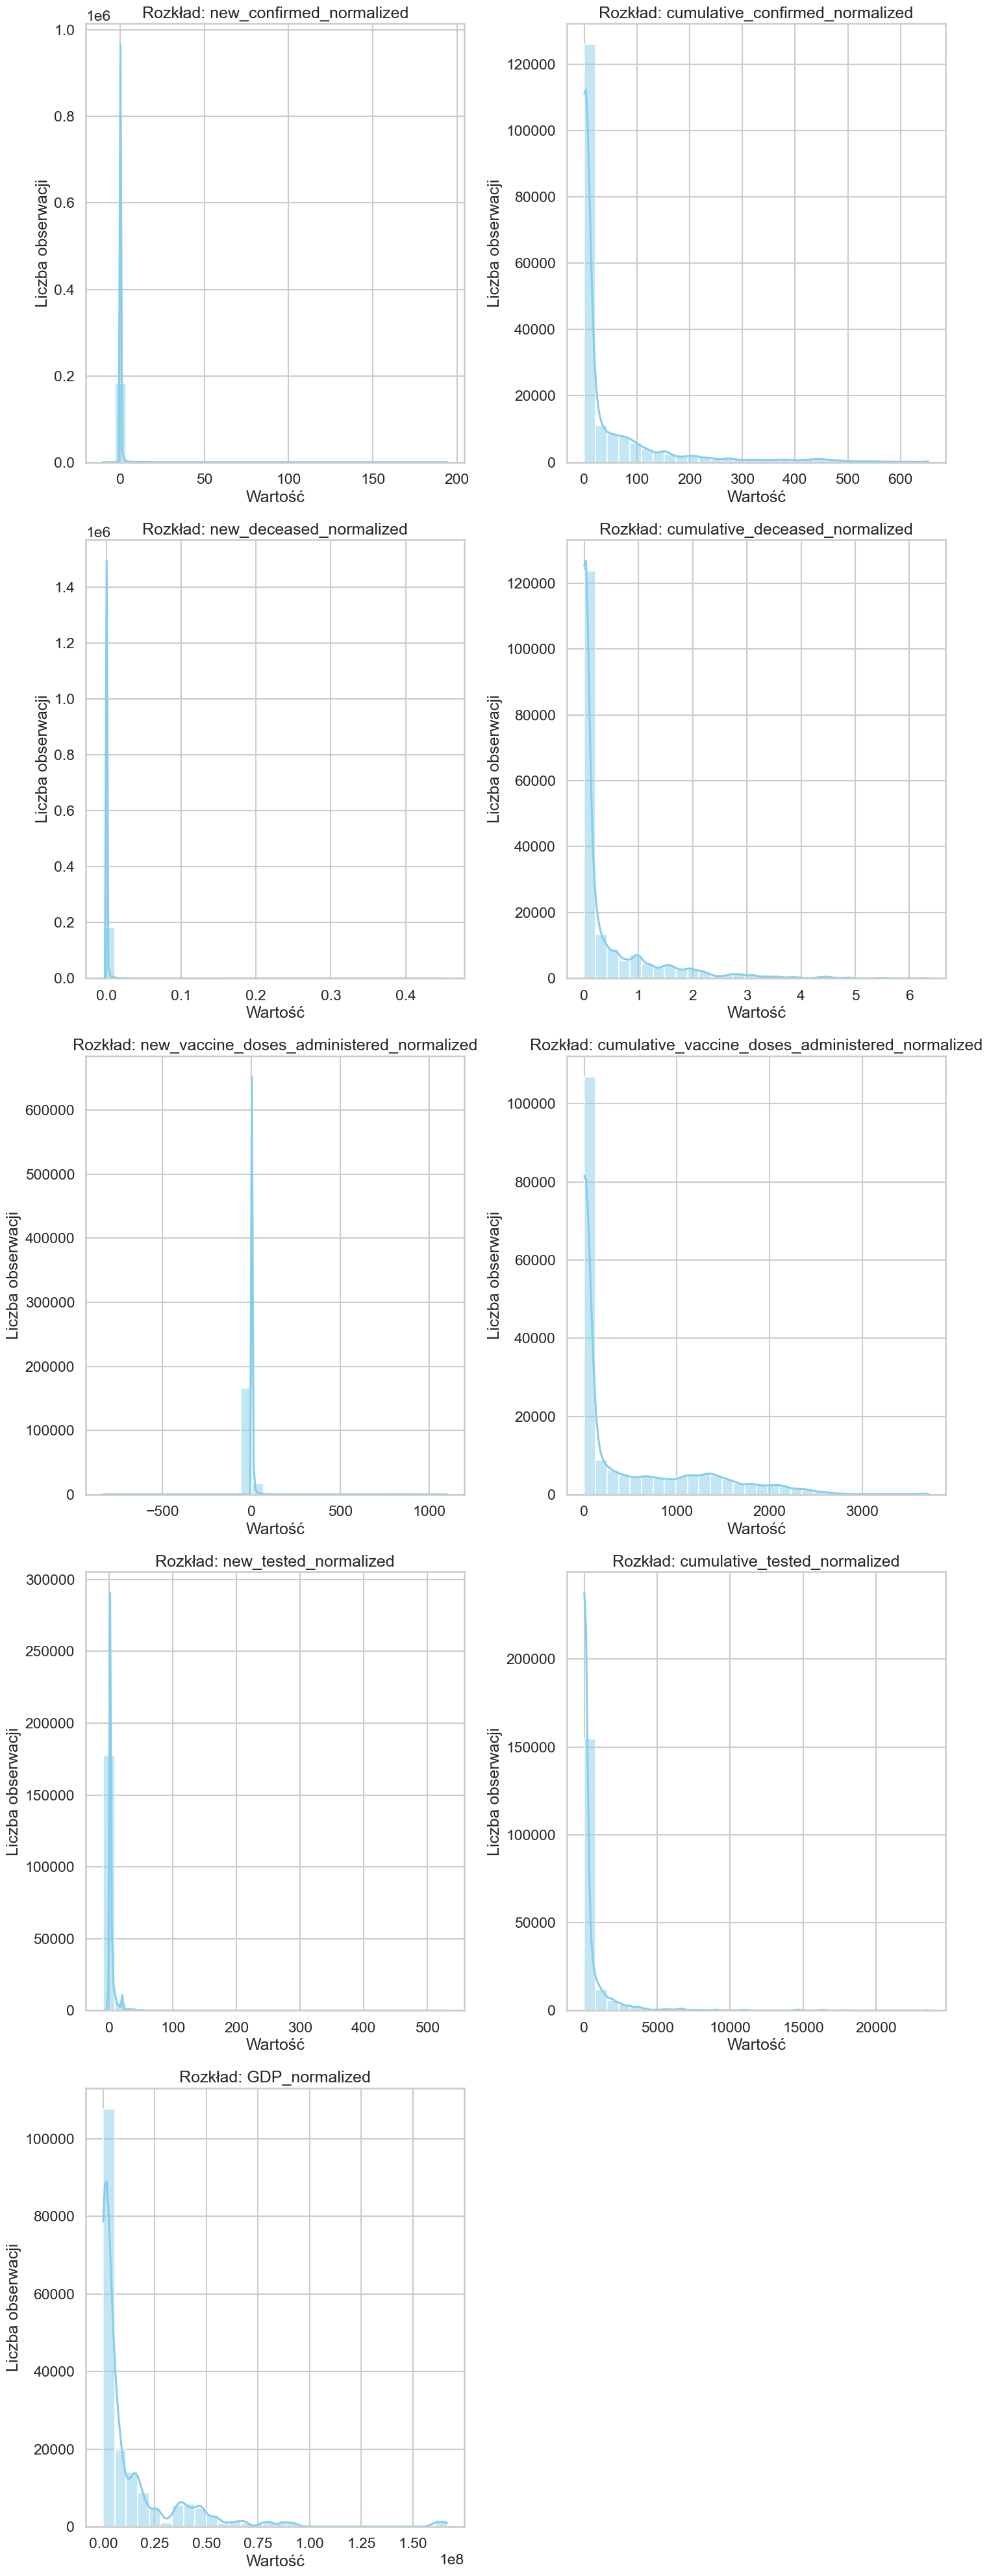

In [139]:
# Lista znormalizowanych kolumn
normalized_cols = [
    'new_confirmed_normalized',
    'cumulative_confirmed_normalized',

    'new_deceased_normalized',
    'cumulative_deceased_normalized',

    'new_vaccine_doses_administered_normalized',
    'cumulative_vaccine_doses_administered_normalized',

    'new_tested_normalized',
    'cumulative_tested_normalized',

    'GDP_normalized',
]

# Ustawienia stylu wykresów
sns.set(style='whitegrid', context='talk')

# Wykres histogramów z krzywą KDE dla każdej kolumny
plt.figure(figsize=(15, 40))
for i, col in enumerate(normalized_cols, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Rozkład: {col}')
    plt.xlabel('Wartość')
    plt.ylabel('Liczba obserwacji')

plt.tight_layout()
plt.show()


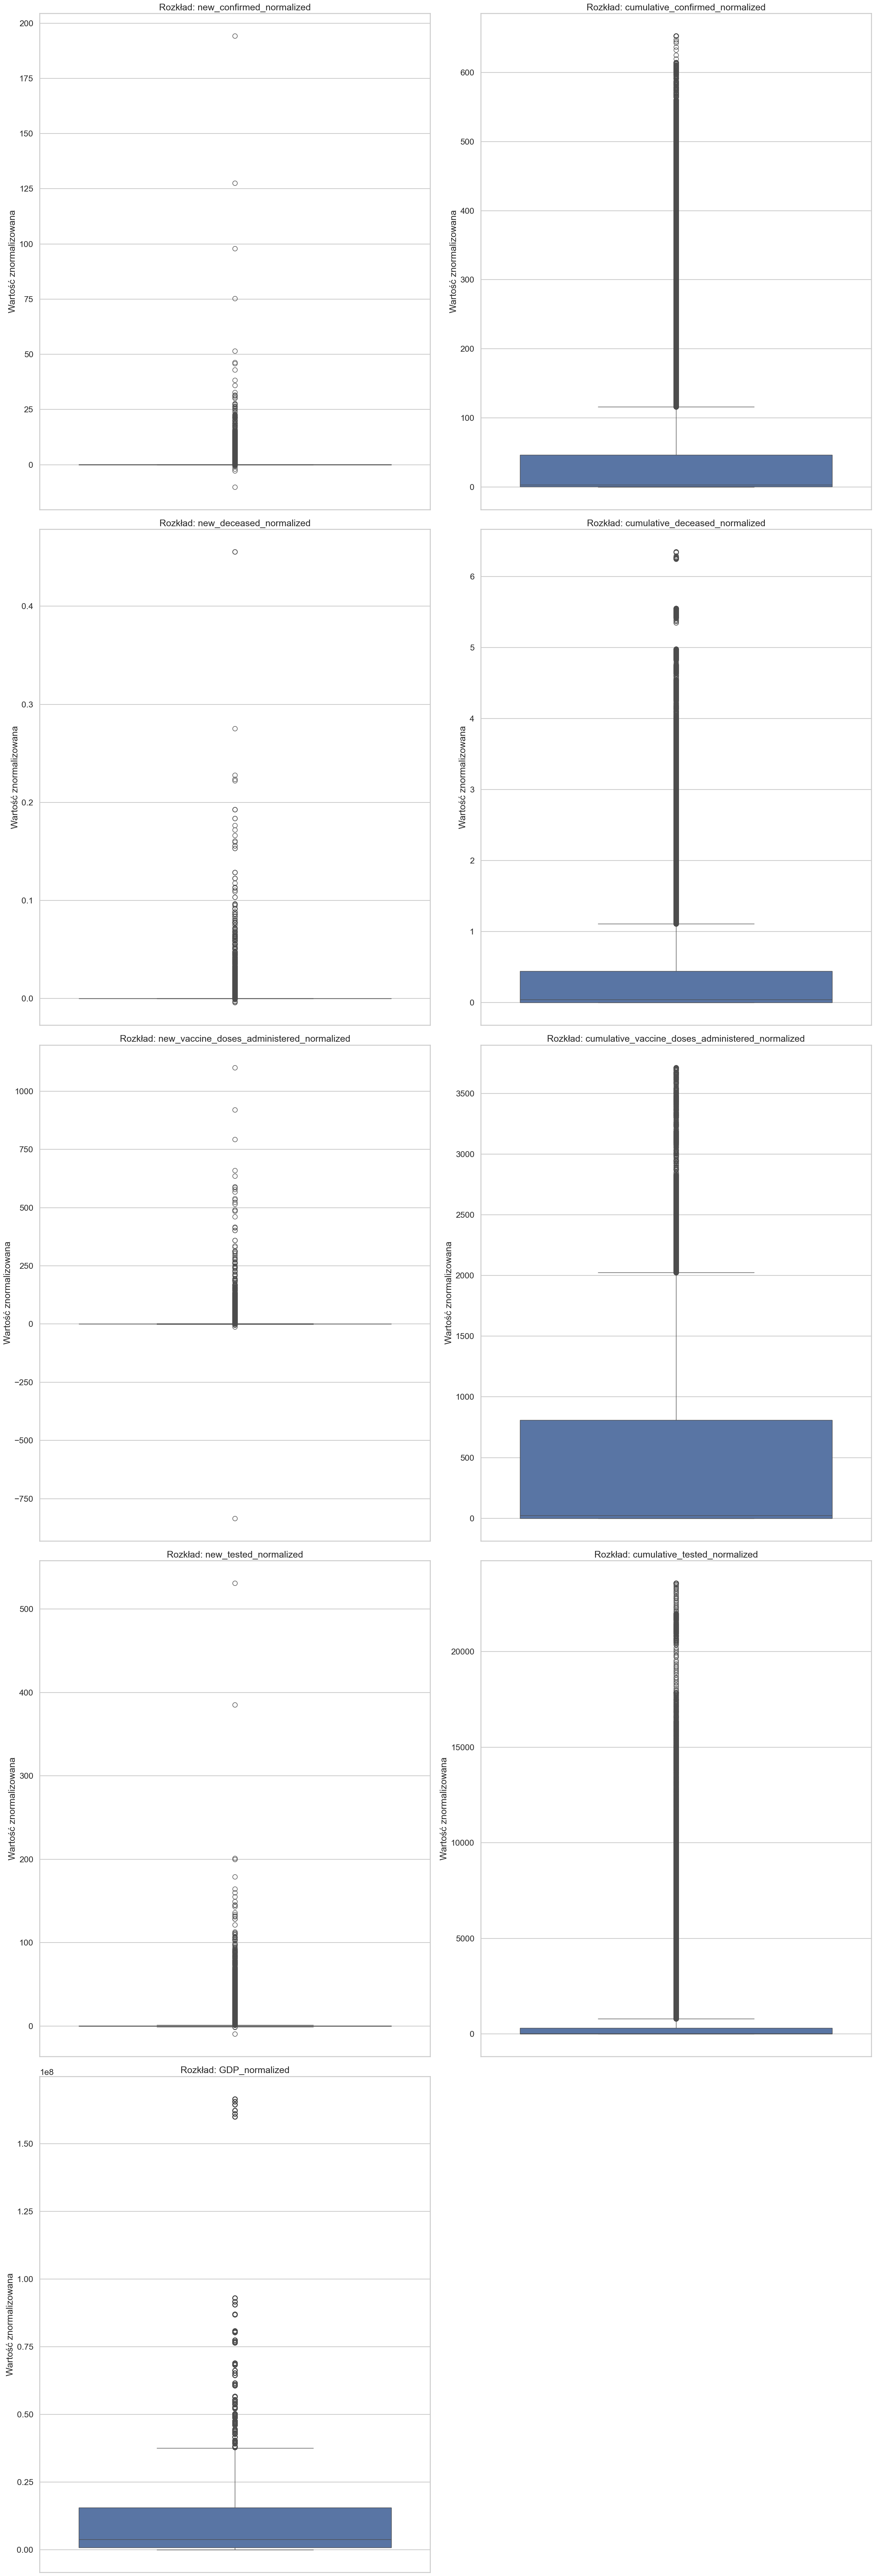

In [140]:
# Wykres pudełkowy (boxplot) porównujący rozkłady znormalizowanych danych

num_plots = len(normalized_cols)
ncols = 2
nrows = int(np.ceil(num_plots / ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 12, nrows * 14))

axs = np.array(axs).flatten()

for ax, col in zip(axs, normalized_cols):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(f"Rozkład: {col}")
    ax.set_xlabel("")
    ax.set_ylabel("Wartość znormalizowana")
    ax.xaxis.set_tick_params(rotation=45)

for ax in axs[len(normalized_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()



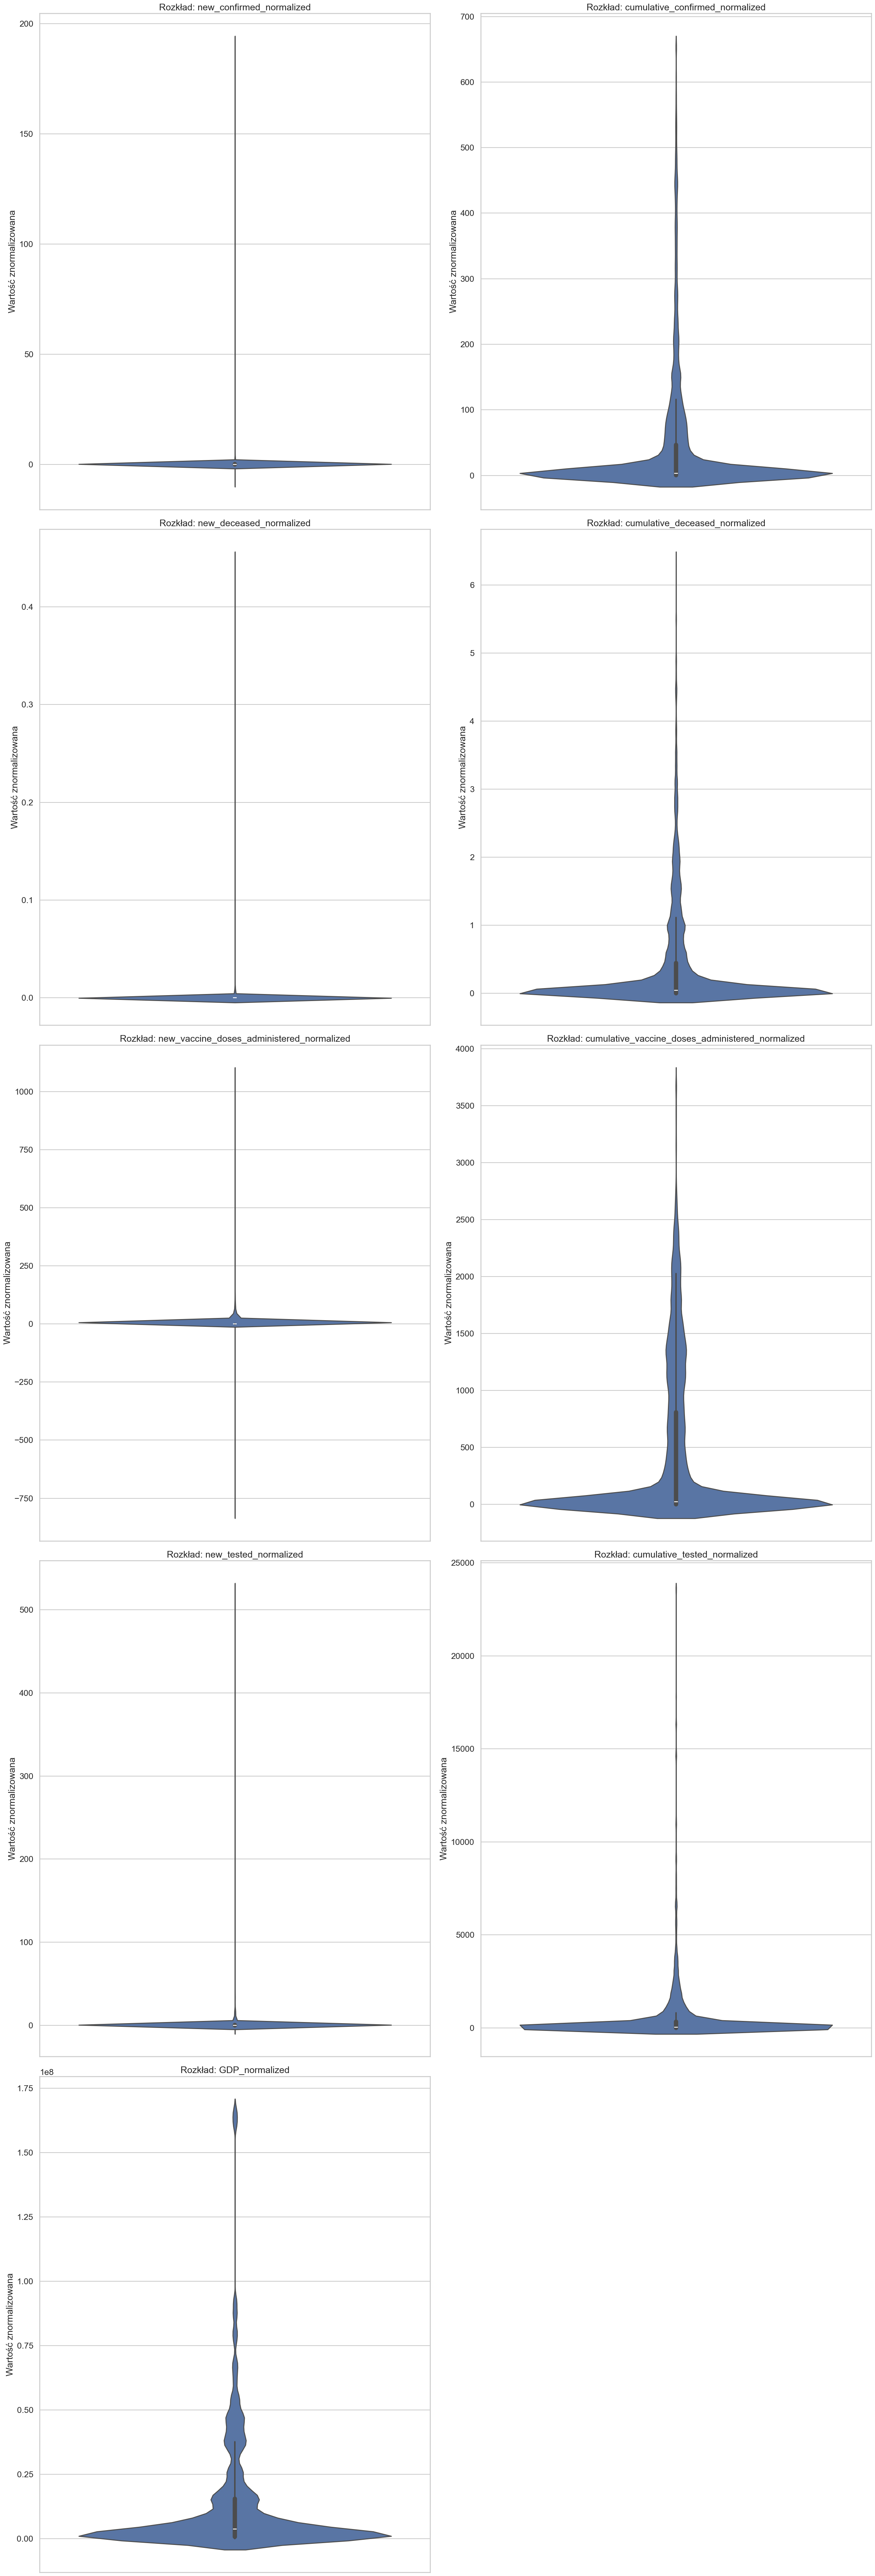

In [141]:
num_plots = len(normalized_cols)
ncols = 2
nrows = int(np.ceil(num_plots / ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 12, nrows * 14))
axs = np.array(axs).flatten()

for ax, col in zip(axs, normalized_cols):
    sns.violinplot(y=df[col], ax=ax)
    ax.set_title(f"Rozkład: {col}")
    ax.set_xlabel("")
    ax.set_ylabel("Wartość znormalizowana")
    ax.xaxis.set_tick_params(rotation=45)

# Ukrycie pustych subplotów, jeśli liczba pól przekracza liczbę danych
for ax in axs[len(normalized_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


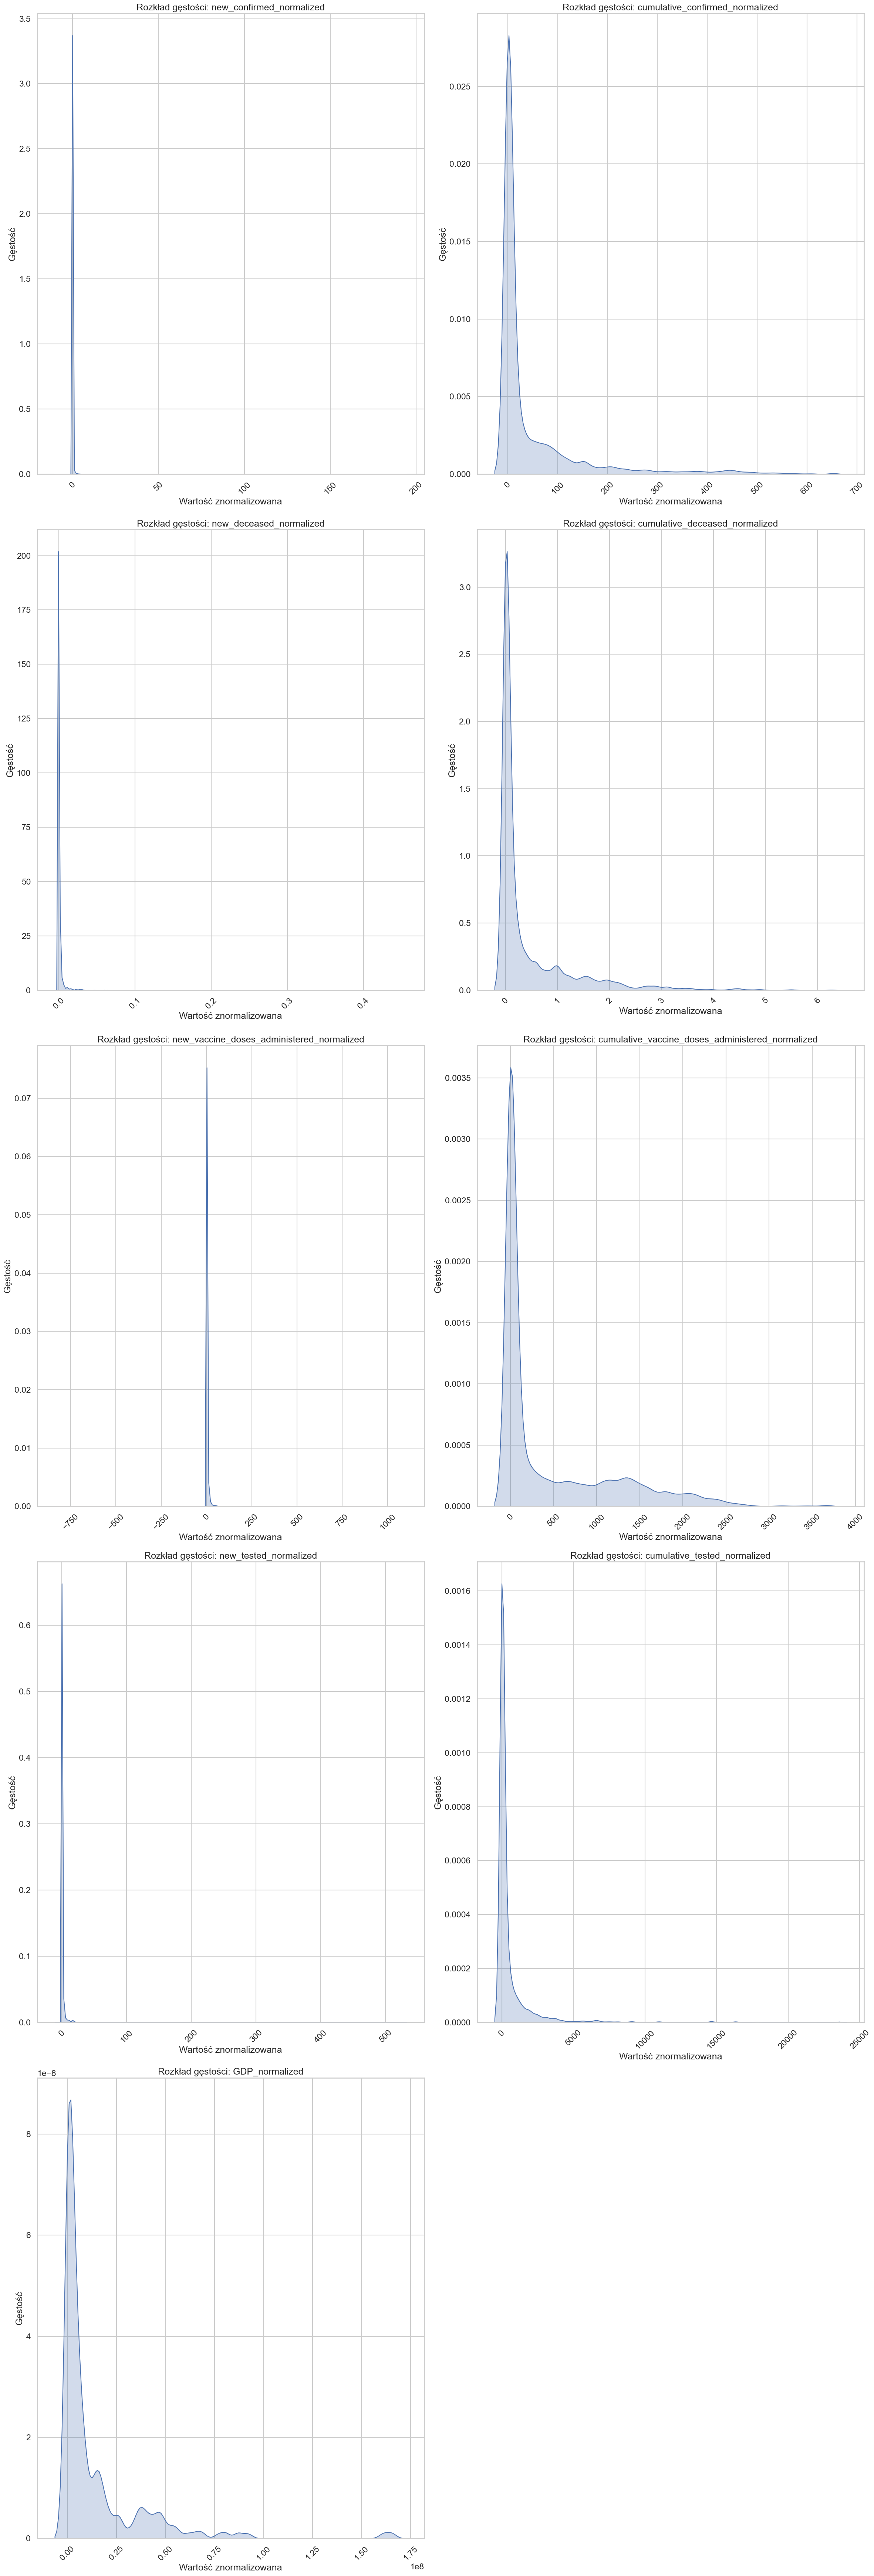

In [142]:
num_plots = len(normalized_cols)
ncols = 2
nrows = int(np.ceil(num_plots / ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 12, nrows * 14))
axs = np.array(axs).flatten()

for ax, col in zip(axs, normalized_cols):
    sns.kdeplot(data=df[col], fill=True, ax=ax)
    ax.set_title(f"Rozkład gęstości: {col}")
    ax.set_xlabel("Wartość znormalizowana")
    ax.set_ylabel("Gęstość")
    ax.xaxis.set_tick_params(rotation=45)

# Ukrycie pustych subplotów, jeśli liczba wykresów przekracza liczbę kolumn danych
for ax in axs[len(normalized_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

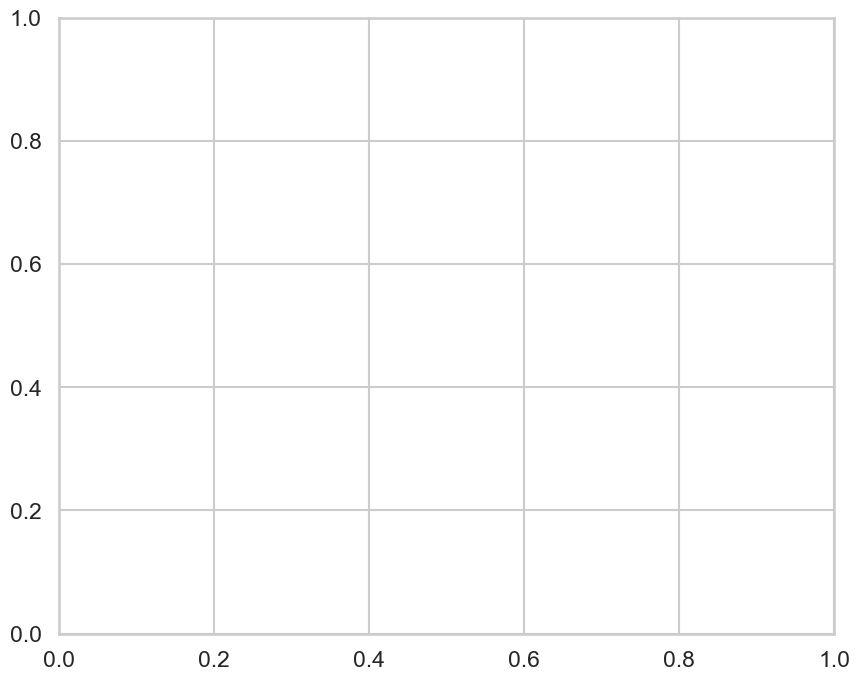

In [143]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='cumulative_confirmed_normalized', y='cumulative_deceased_normalized')
plt.title("Wykres punktowy: cumulative_confirmed_normalized vs cumulative_deceased_normalized")
plt.xlabel("cumulative_confirmed_normalized")
plt.ylabel("cumulative_deceased_normalized")
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='new_confirmed_normalized', y='new_deceased_normalized')
plt.title("Wykres punktowy: new_confirmed_normalized vs new_deceased_normalized")
plt.xlabel("new_confirmed_normalized")
plt.ylabel("new_deceased_normalized")
plt.show()


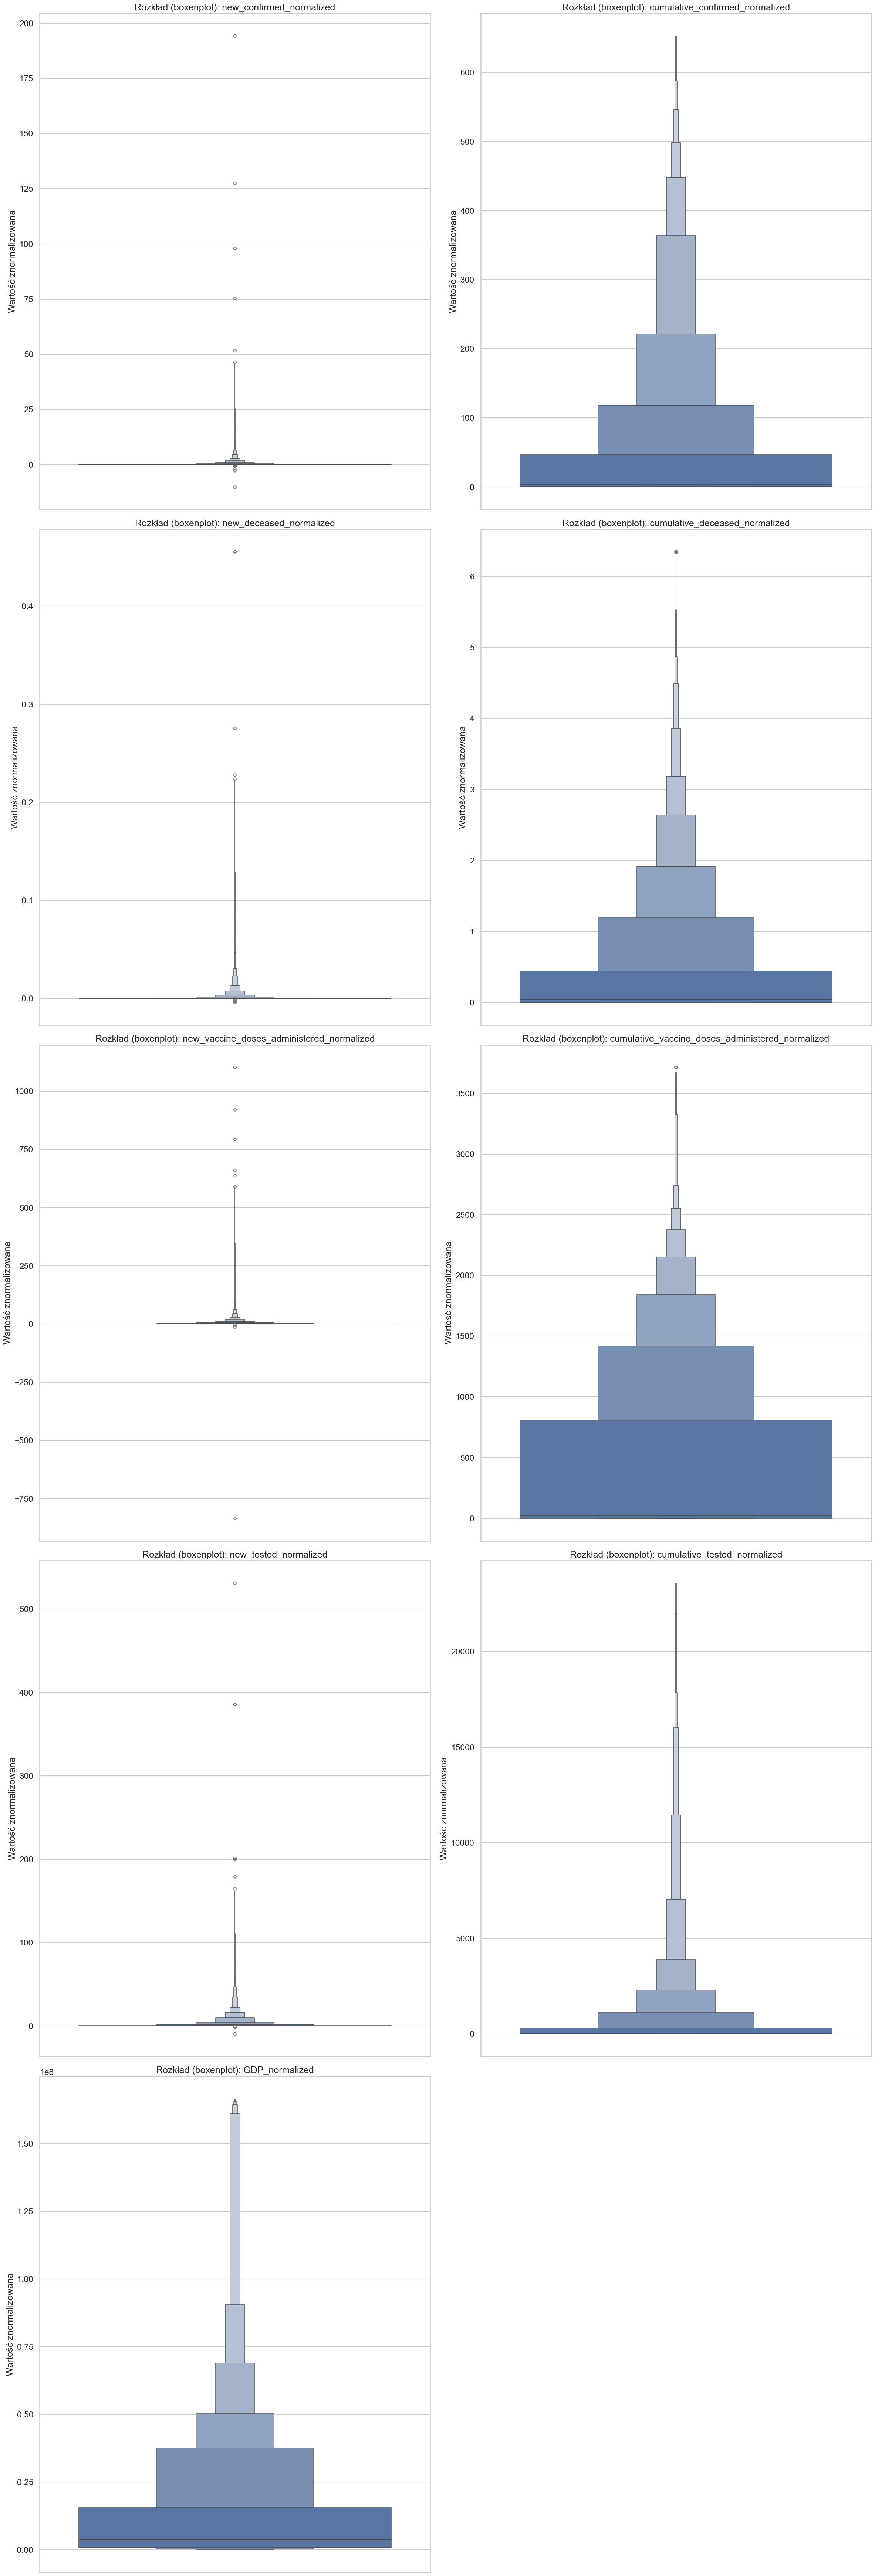

In [33]:
num_plots = len(normalized_cols)
ncols = 2
nrows = int(np.ceil(num_plots / ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 12, nrows * 14))
axs = np.array(axs).flatten()

for ax, col in zip(axs, normalized_cols):
    sns.boxenplot(y=df[col], ax=ax)
    ax.set_title(f"Rozkład (boxenplot): {col}")
    ax.set_xlabel("")
    ax.set_ylabel("Wartość znormalizowana")
    ax.xaxis.set_tick_params(rotation=45)

# Ukrywamy niewykorzystane osie w przypadku, gdy liczba kolumn jest nieparzysta
for ax in axs[len(normalized_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


<h1>5. Data correlation</h1>

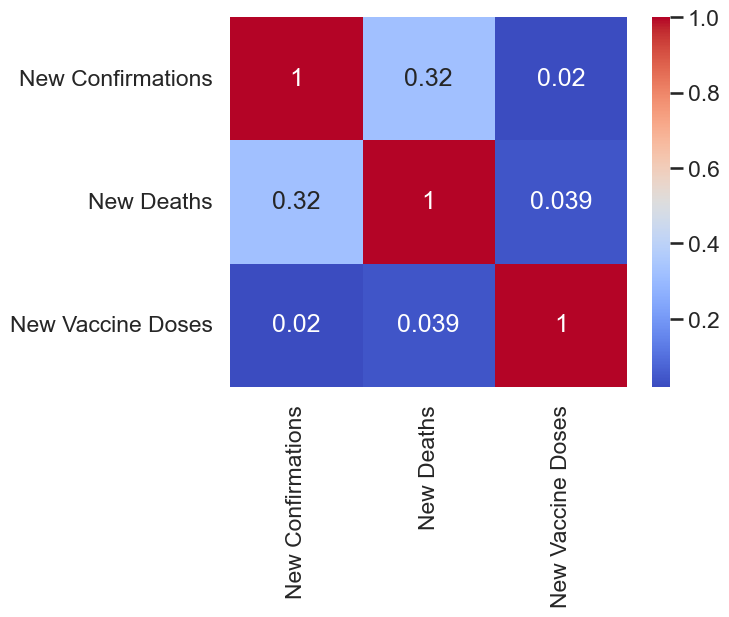

In [34]:
"""
df['date'] = pd.to_datetime(df['date'])
df_sorted = df.sort_values('date')

last_measurements = df_sorted.groupby('iso_3166_1_alpha_3').last()
"""

columns = ['new_confirmed', 'new_deceased', 'new_vaccine_doses_administered']

# Calculation of the correlation matrix
correlation_matrix = df[columns].corr()

new_names = {
    'new_confirmed': 'New Confirmations',
    'new_deceased': 'New Deaths',
    'new_vaccine_doses_administered': 'New Vaccine Doses',
}

# Changing index and column labels in the correlation matrix
correlation_matrix = correlation_matrix.rename(index=new_names, columns=new_names)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


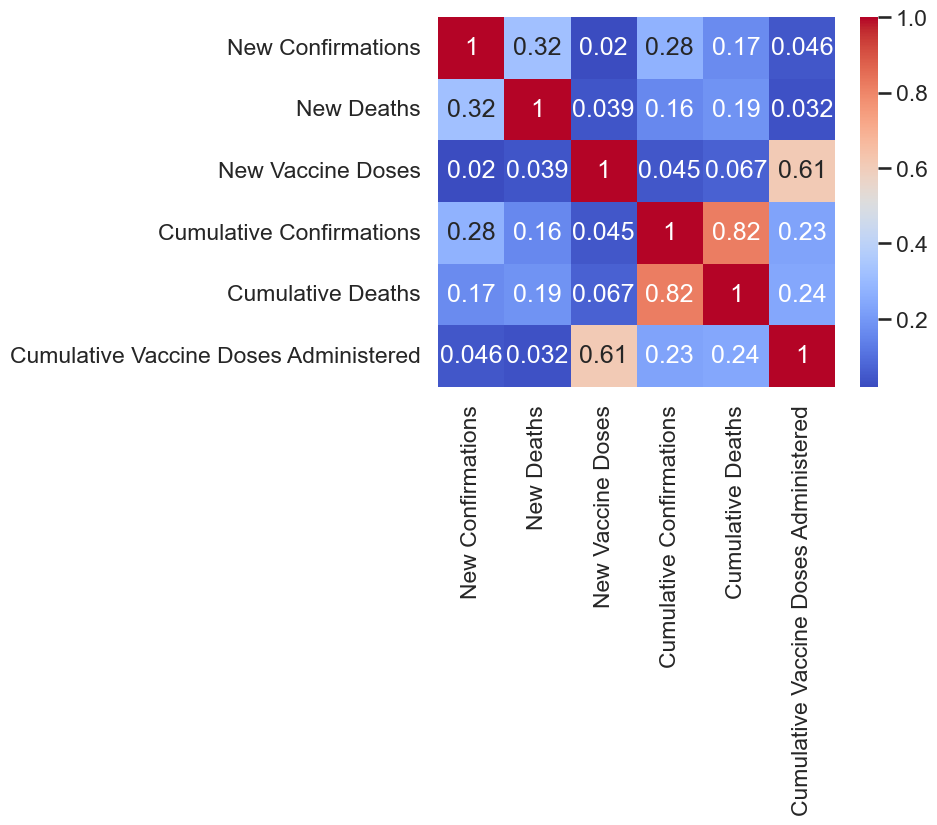

In [35]:
columns = ['new_confirmed', 'new_deceased', 'new_vaccine_doses_administered', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered']

# Calculation of the correlation matrix
correlation_matrix = df[columns].corr()

new_names = {
    'new_confirmed': 'New Confirmations',
    'new_deceased': 'New Deaths',
    'new_vaccine_doses_administered': 'New Vaccine Doses',
    'cumulative_confirmed': 'Cumulative Confirmations',
    'cumulative_deceased': 'Cumulative Deaths',
    'cumulative_vaccine_doses_administered': 'Cumulative Vaccine Doses Administered'
}

# Changing index and column labels in the correlation matrix
correlation_matrix = correlation_matrix.rename(index=new_names, columns=new_names)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


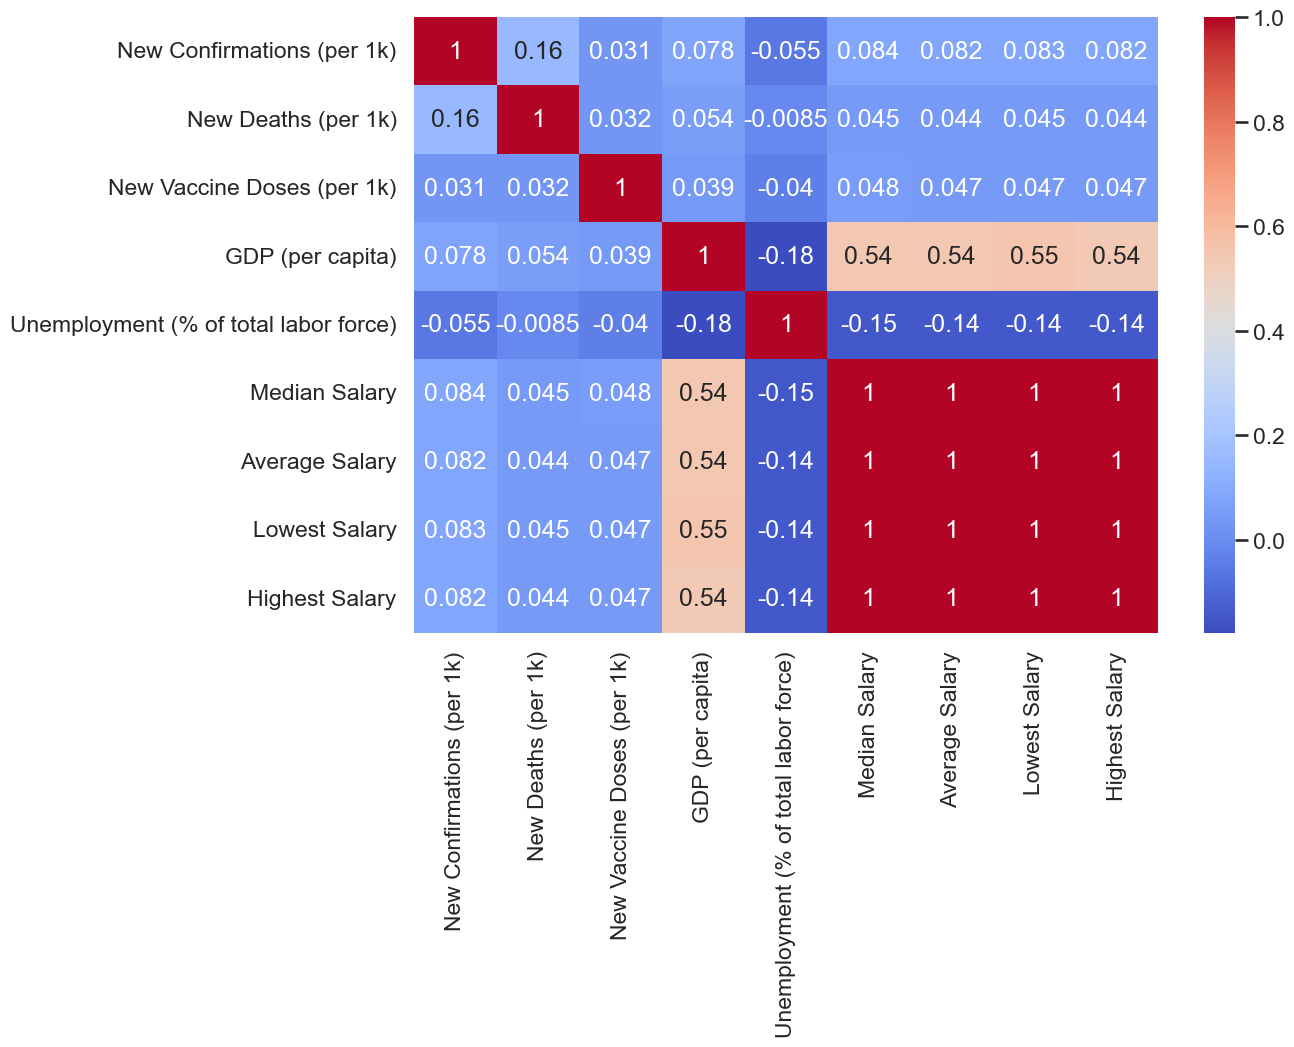

In [36]:
columns = ['new_confirmed_normalized', 'new_deceased_normalized', 'new_vaccine_doses_administered_normalized', 'GDP_normalized', 'Unemployment, total (% of total labor force)', 'median_salary', 'average_salary', 'lowest_salary', 'highest_salary']

# Calculation of the correlation matrix
correlation_matrix = df[columns].corr()

new_names = {
    'new_confirmed_normalized': 'New Confirmations (per 1k)',
    'new_deceased_normalized': 'New Deaths (per 1k)',
    'new_vaccine_doses_administered_normalized': 'New Vaccine Doses (per 1k)',
    'GDP_normalized': 'GDP (per capita)',
    'Unemployment, total (% of total labor force)': 'Unemployment (% of total labor force)',
    'median_salary': 'Median Salary',
    'average_salary': 'Average Salary',
    'lowest_salary': 'Lowest Salary',
    'highest_salary': 'Highest Salary'
}

# Changing index and column labels in the correlation matrix
correlation_matrix = correlation_matrix.rename(index=new_names, columns=new_names)

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


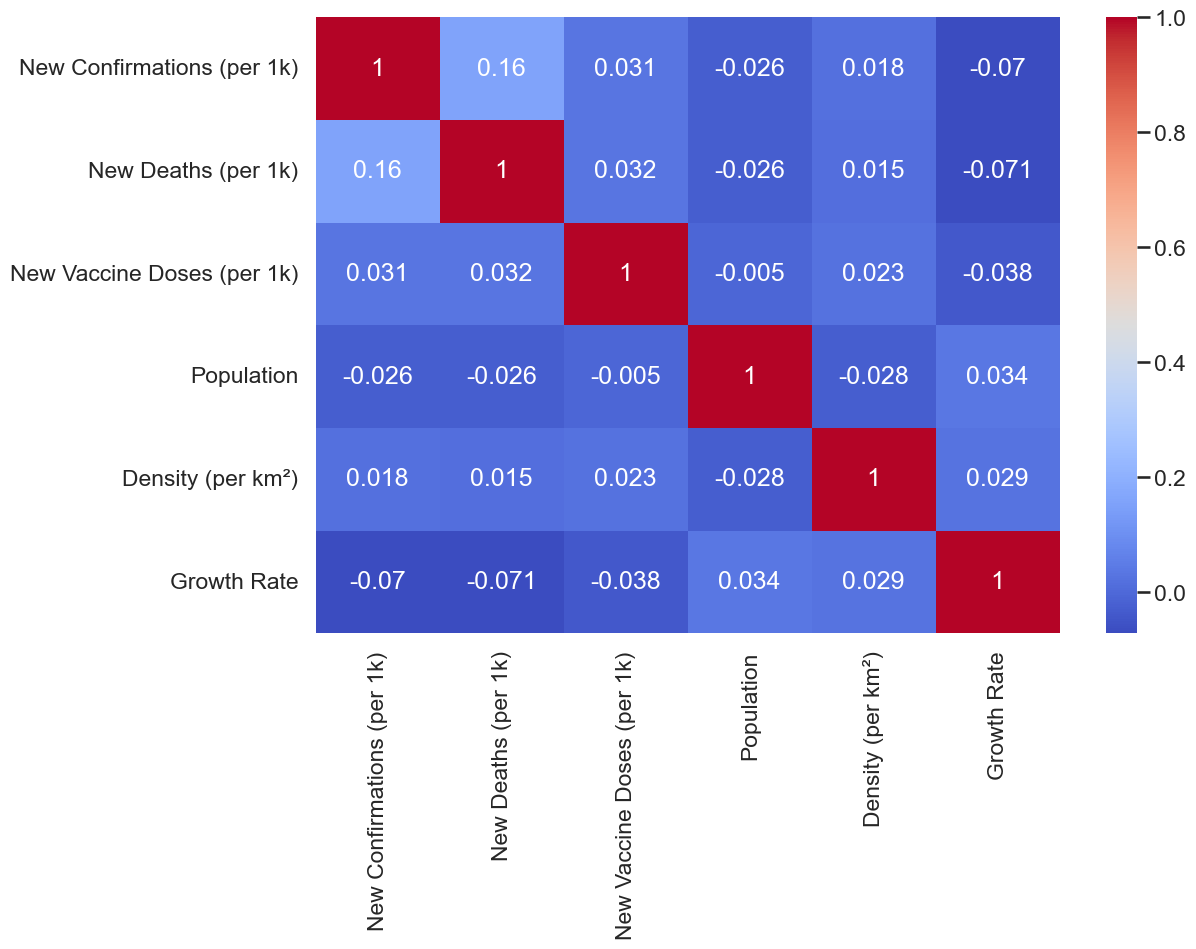

In [37]:
columns = ['new_confirmed_normalized', 'new_deceased_normalized', 'new_vaccine_doses_administered_normalized', 'Population', 'Density (per km²)', 'Growth Rate']

# Calculation of the correlation matrix
correlation_matrix = df[columns].corr()

new_names = {
    'new_confirmed_normalized': 'New Confirmations (per 1k)',
    'new_deceased_normalized': 'New Deaths (per 1k)',
    'new_vaccine_doses_administered_normalized': 'New Vaccine Doses (per 1k)',
    'Population': 'Population',
    'Density (per km²)': 'Density (per km²)',
    'Growth Rate': 'Growth Rate'
}

# Changing index and column labels in the correlation matrix
correlation_matrix = correlation_matrix.rename(index=new_names, columns=new_names)

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


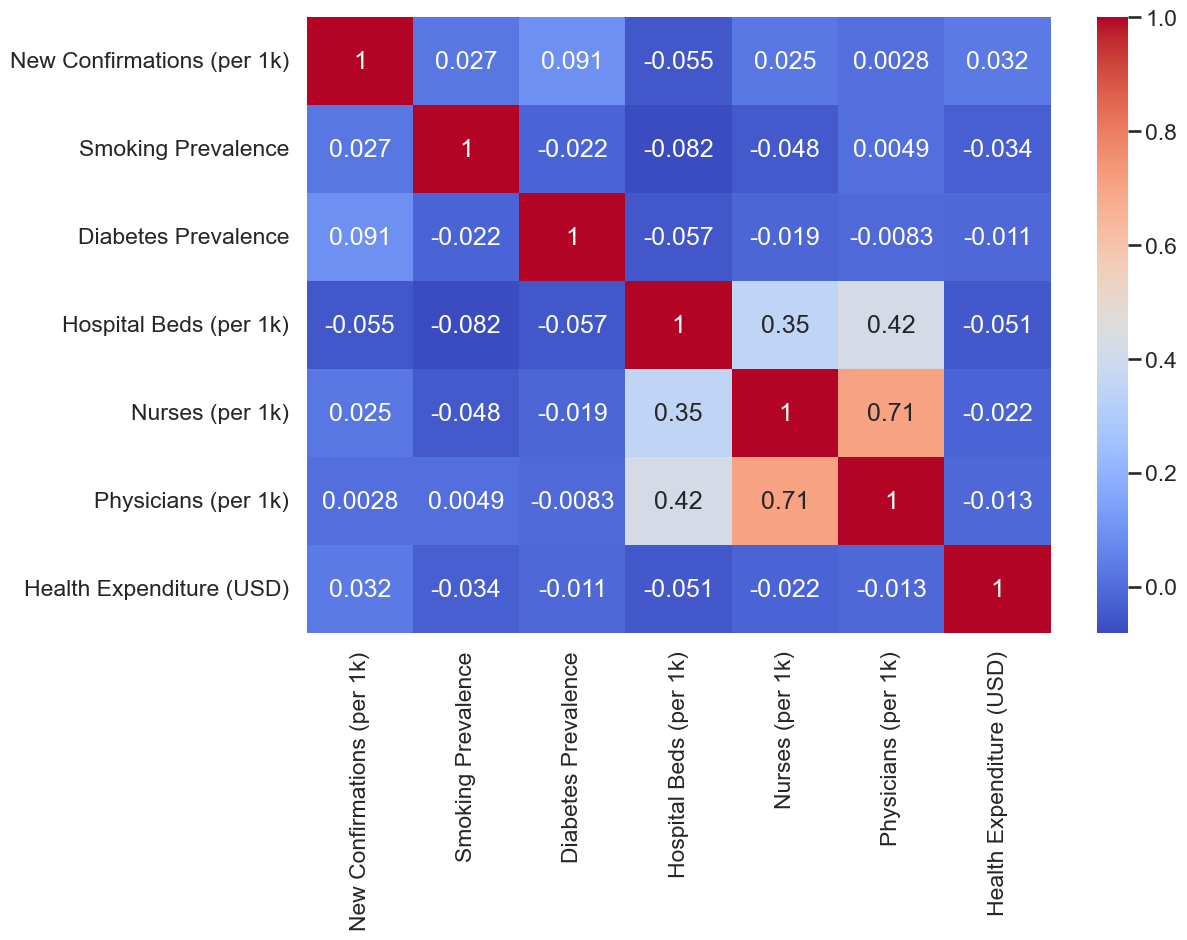

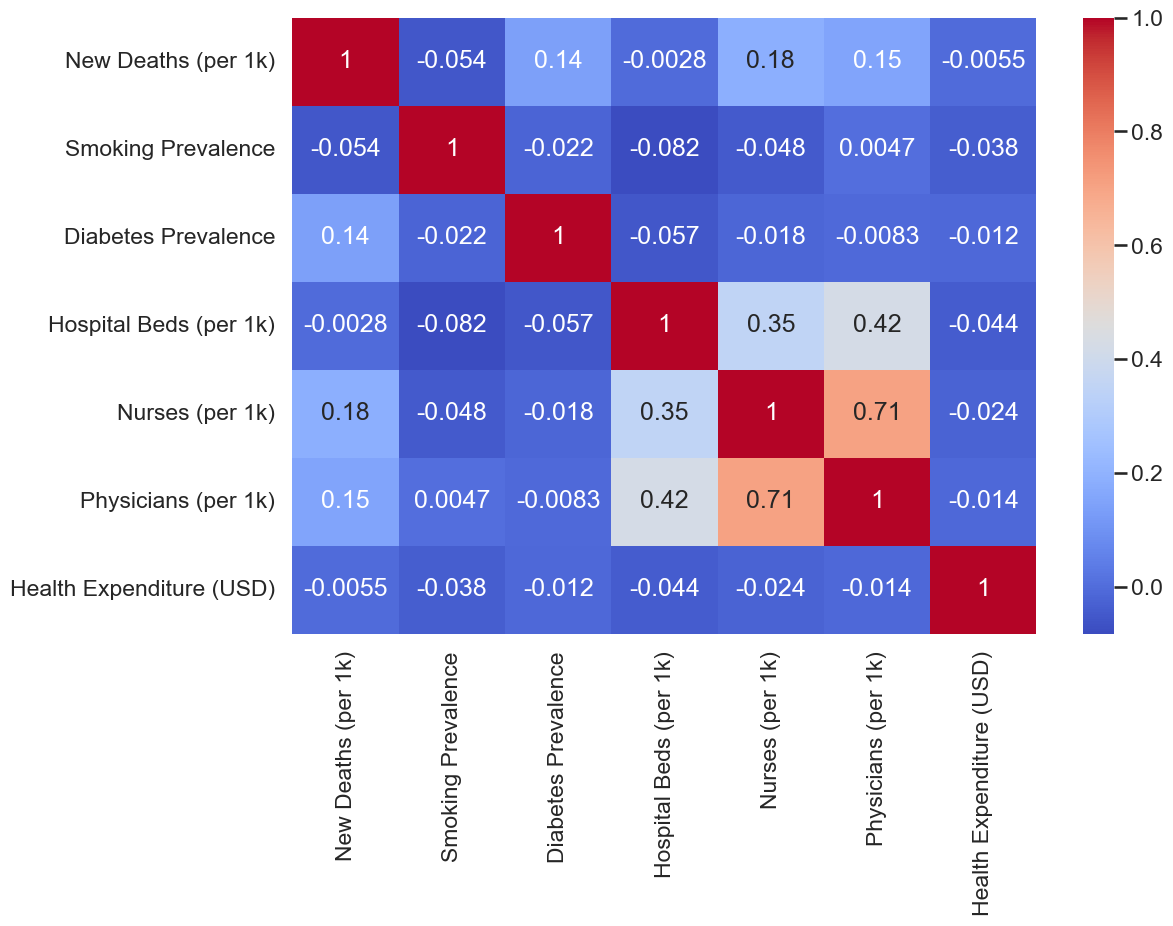

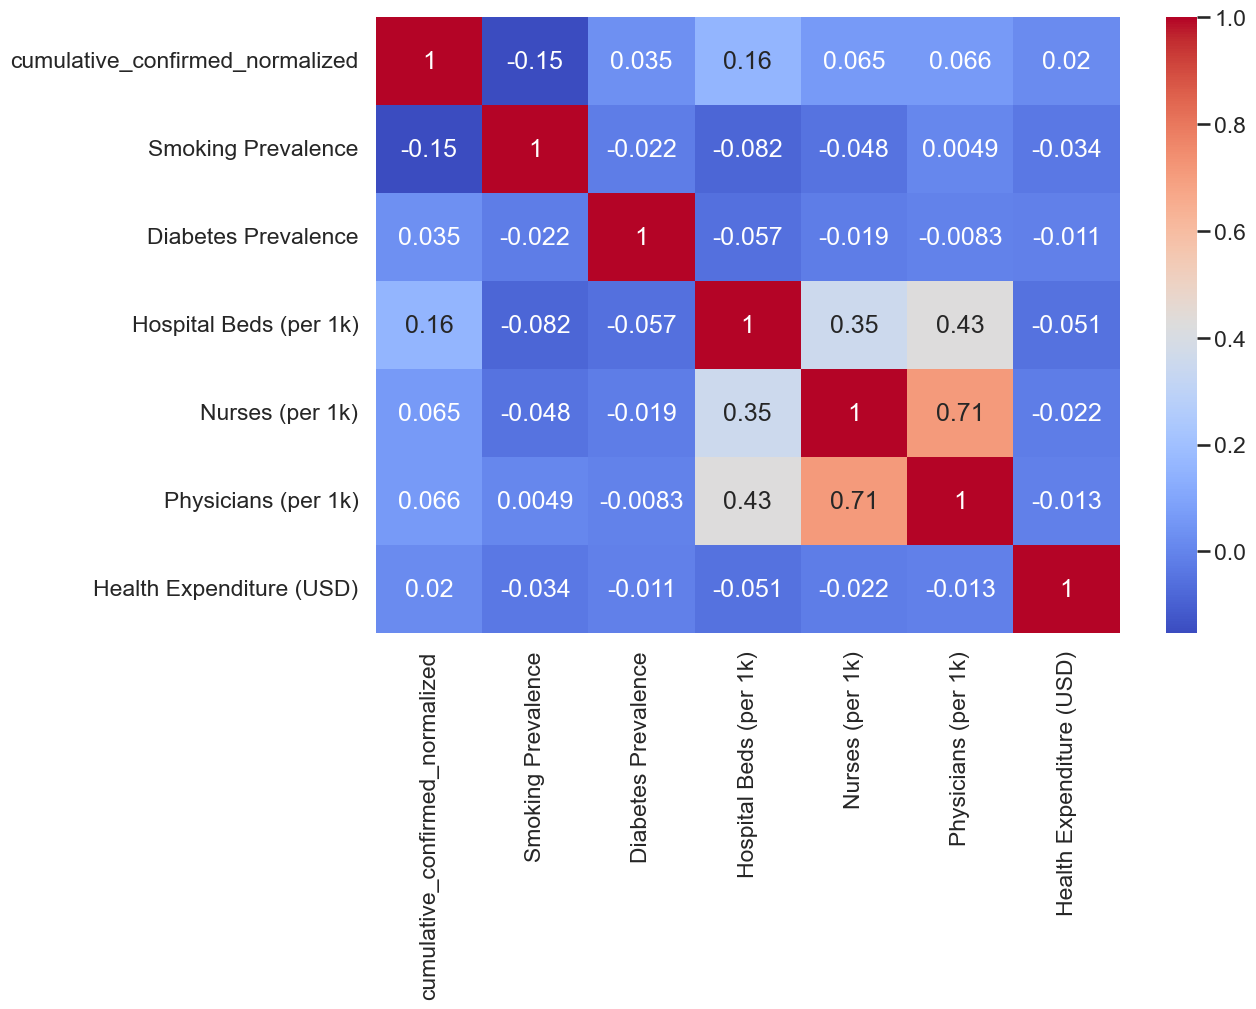

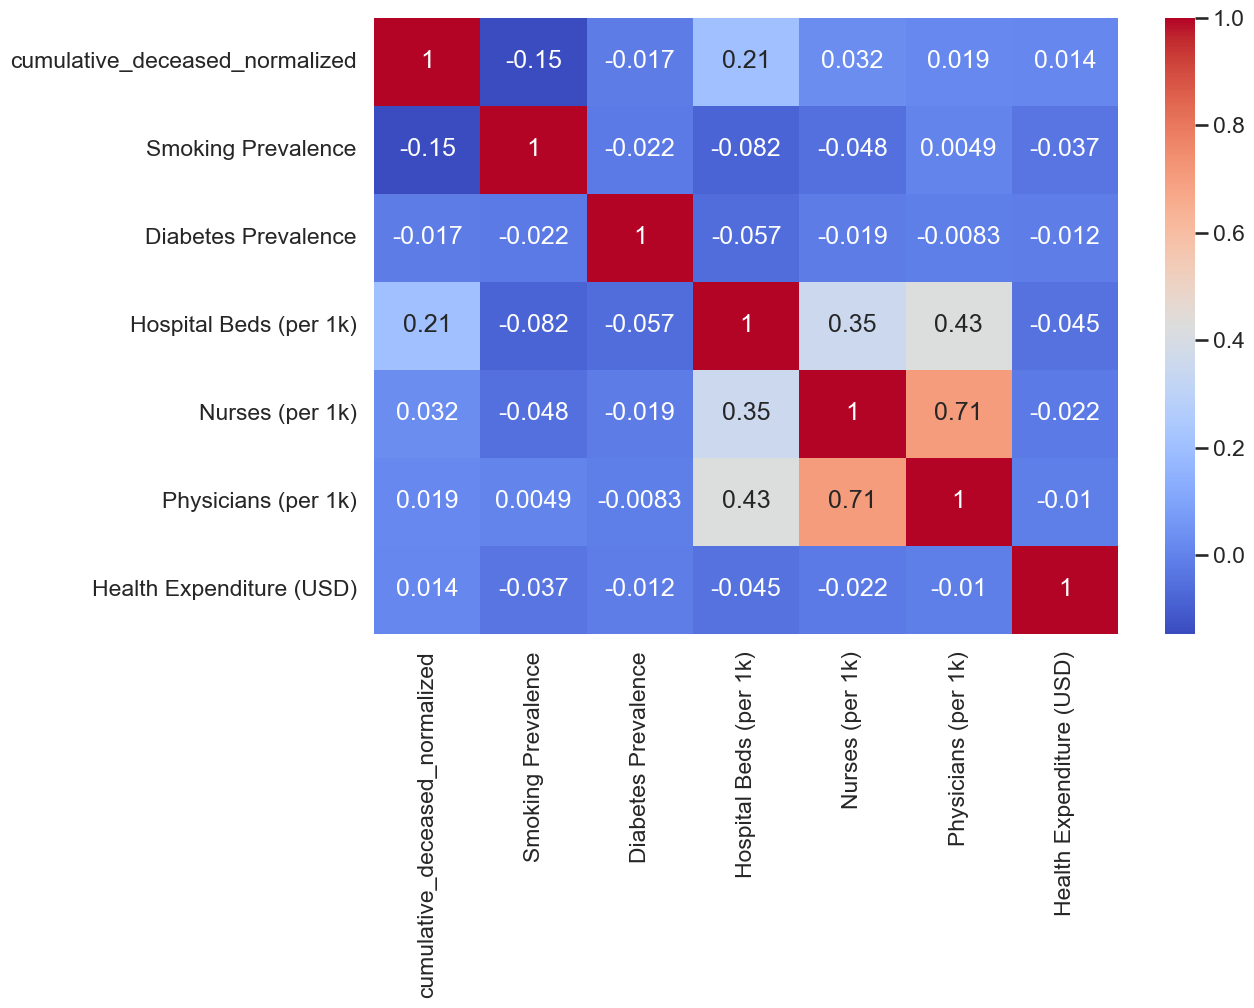

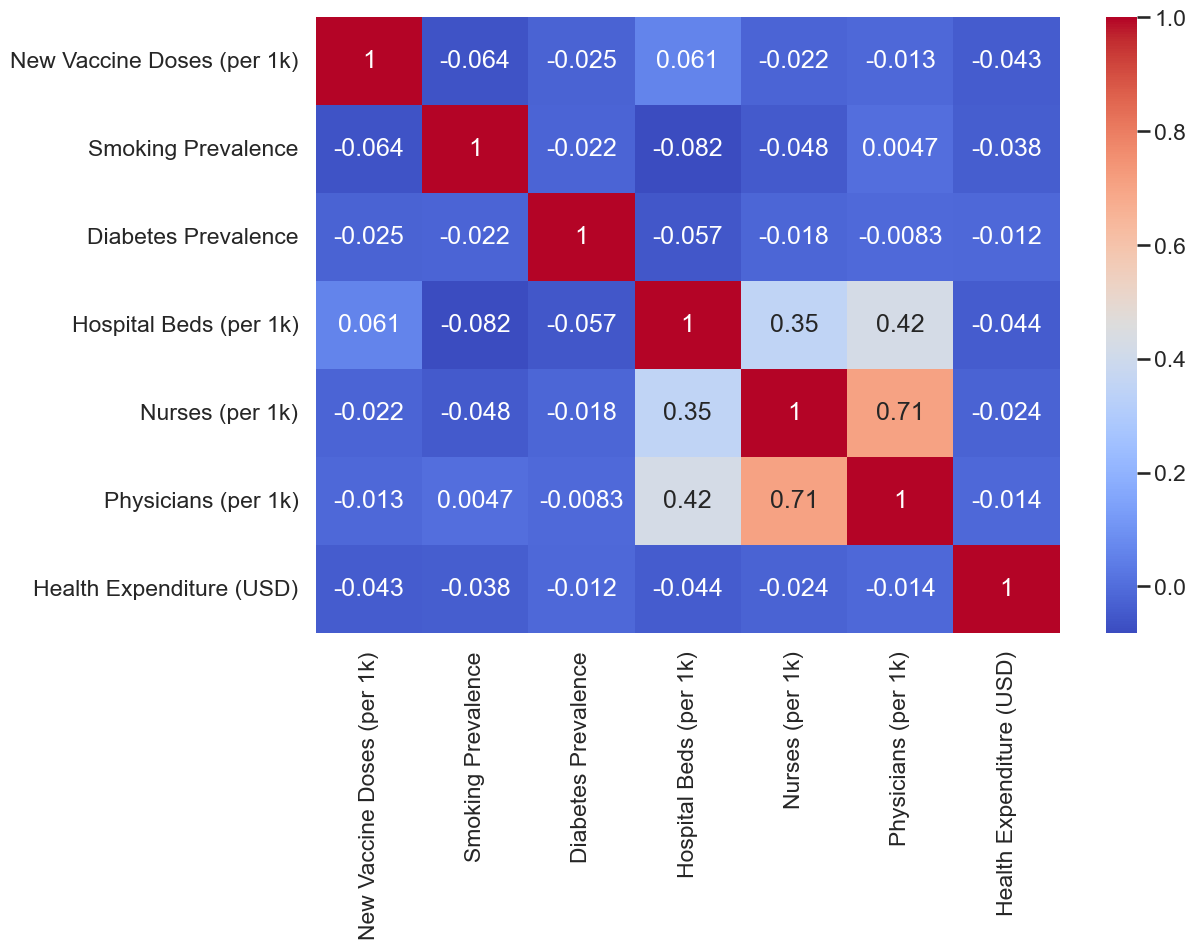

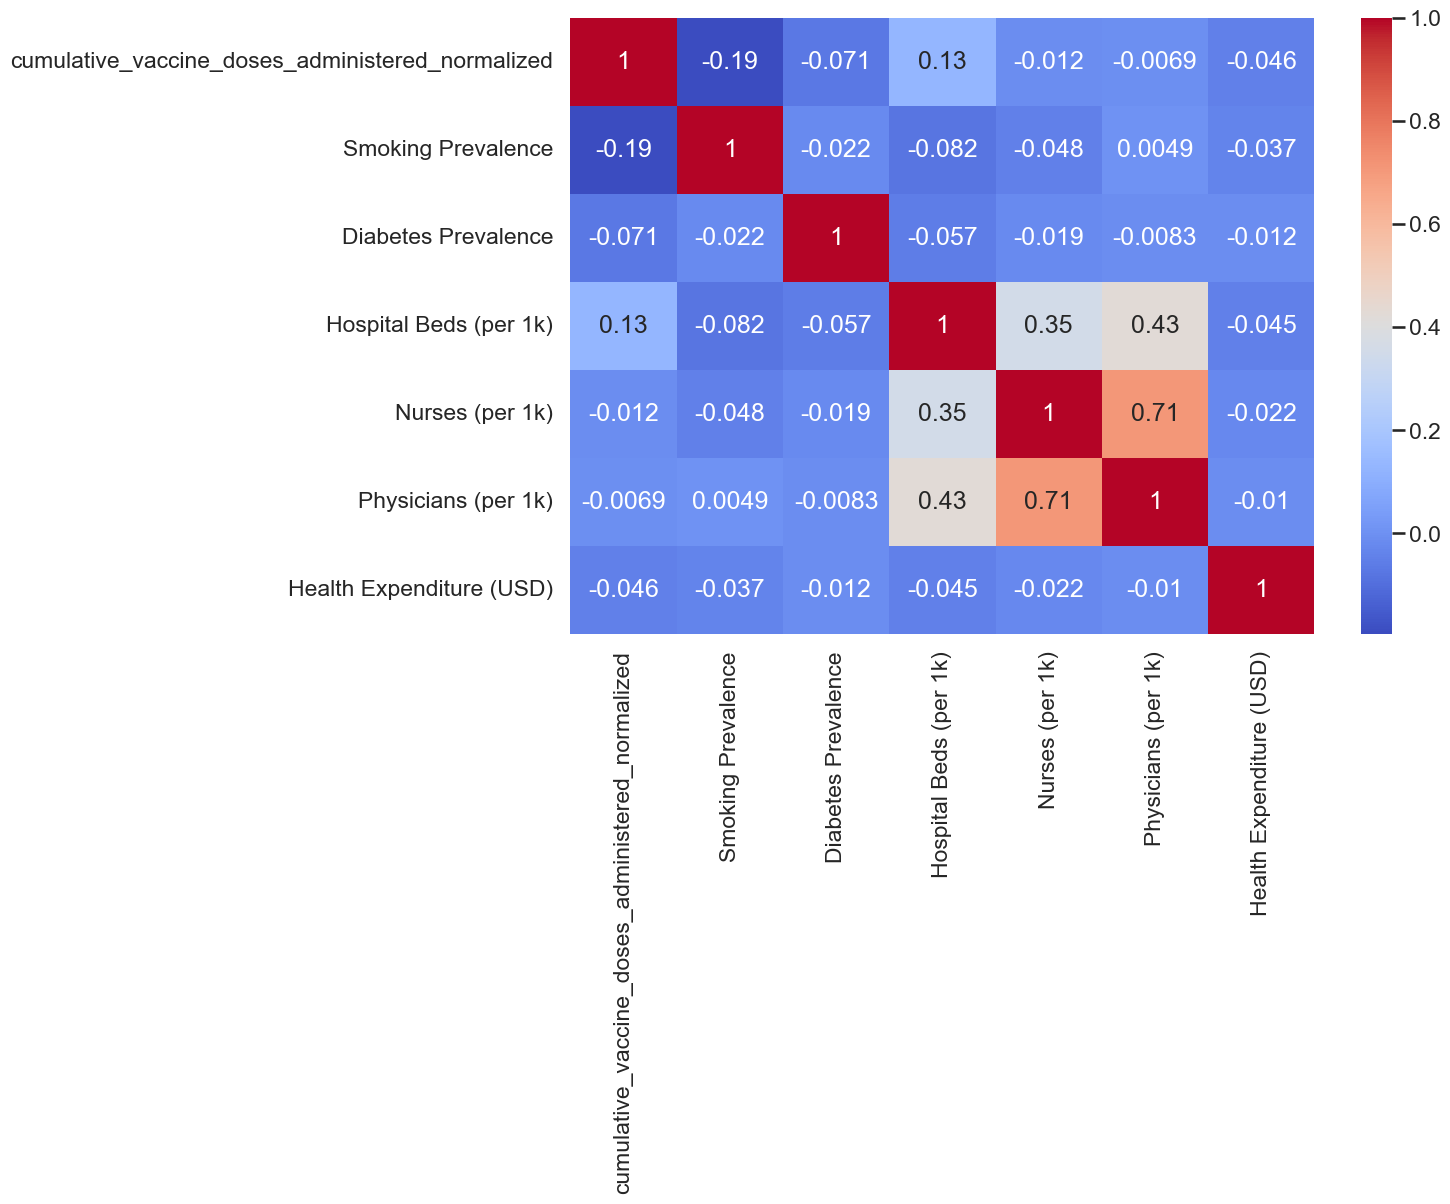

In [38]:
df['date'] = pd.to_datetime(df['date'])
df_filtered = df.dropna(subset=['new_confirmed_normalized', 'new_deceased_normalized', 'cumulative_confirmed_normalized', 'cumulative_deceased_normalized', 'new_vaccine_doses_administered_normalized', 'cumulative_vaccine_doses_administered_normalized'])


# Używamy groupby oraz idxmax do pobrania indeksów wierszy z maksymalną wartością w kolumnie 'cumulative_confirmed_normalized'
max_idx1 = df_filtered.groupby('iso_3166_1_alpha_3')['new_confirmed_normalized'].idxmax()
max_idx2 = df_filtered.groupby('iso_3166_1_alpha_3')['new_deceased_normalized'].idxmax()
max_idx3 = df_filtered.groupby('iso_3166_1_alpha_3')['cumulative_confirmed_normalized'].idxmax()
max_idx4 = df_filtered.groupby('iso_3166_1_alpha_3')['cumulative_deceased_normalized'].idxmax()
max_idx5 = df_filtered.groupby('iso_3166_1_alpha_3')['new_vaccine_doses_administered_normalized'].idxmax()
max_idx6 = df_filtered.groupby('iso_3166_1_alpha_3')['cumulative_vaccine_doses_administered_normalized'].idxmax()

# Wybór wierszy na podstawie indeksów
max_confirmed_new = df_filtered.loc[max_idx1]
max_deceased_new = df_filtered.loc[max_idx2]
max_confirmed_cumulative = df_filtered.loc[max_idx3]
max_deceased_cumulative = df_filtered.loc[max_idx4]
max_vaccine_new = df_filtered.loc[max_idx5]
max_vaccine_cumulative = df_filtered.loc[max_idx6]


columns_max_confirmed_new = ['new_confirmed_normalized', 'smoking_prevalence', 'diabetes_prevalence', 'hospital_beds_per_1000', 'nurses_per_1000', 'physicians_per_1000', 'health_expenditure_usd']

columns_max_deceased_new = ['new_deceased_normalized', 'smoking_prevalence', 'diabetes_prevalence', 'hospital_beds_per_1000', 'nurses_per_1000', 'physicians_per_1000', 'health_expenditure_usd']

columns_max_vaccine_new = ['new_vaccine_doses_administered_normalized', 'smoking_prevalence', 'diabetes_prevalence', 'hospital_beds_per_1000', 'nurses_per_1000', 'physicians_per_1000', 'health_expenditure_usd']

columns_max_confirmed_cumulative = ['cumulative_confirmed_normalized', 'smoking_prevalence', 'diabetes_prevalence', 'hospital_beds_per_1000', 'nurses_per_1000', 'physicians_per_1000', 'health_expenditure_usd']

columns_max_deceased_cumulative = ['cumulative_deceased_normalized', 'smoking_prevalence', 'diabetes_prevalence', 'hospital_beds_per_1000', 'nurses_per_1000', 'physicians_per_1000', 'health_expenditure_usd']

columns_max_vaccine_cumulative = ['cumulative_vaccine_doses_administered_normalized', 'smoking_prevalence', 'diabetes_prevalence', 'hospital_beds_per_1000', 'nurses_per_1000', 'physicians_per_1000', 'health_expenditure_usd']



# Calculation of the correlation matrix
correlation_matrix_confirmed_new = max_confirmed_new[columns_max_confirmed_new].corr()
correlation_matrix_deceased_new = max_deceased_new[columns_max_deceased_new].corr()
correlation_matrix_vaccine_new = max_deceased_new[columns_max_vaccine_new].corr()
correlation_matrix_confirmed_cumulative = max_confirmed_cumulative[columns_max_confirmed_cumulative].corr()
correlation_matrix_deceased_cumulative = max_deceased_cumulative[columns_max_deceased_cumulative].corr()
correlation_matrix_vaccine_cumulative = max_deceased_cumulative[columns_max_vaccine_cumulative].corr()

new_names = {
    'new_confirmed_normalized': 'New Confirmations (per 1k)',
    'new_deceased_normalized': 'New Deaths (per 1k)',
    'new_vaccine_doses_administered_normalized': 'New Vaccine Doses (per 1k)',
    'smoking_prevalence': 'Smoking Prevalence',
    'diabetes_prevalence': 'Diabetes Prevalence',
    'hospital_beds_per_1000': 'Hospital Beds (per 1k)',
    'nurses_per_1000': 'Nurses (per 1k)',
    'physicians_per_1000': 'Physicians (per 1k)',
    'health_expenditure_usd': 'Health Expenditure (USD)'

}

# Changing index and column labels in the correlation matrix
correlation_matrix_confirmed_new = correlation_matrix_confirmed_new.rename(index=new_names, columns=new_names)
correlation_matrix_deceased_new = correlation_matrix_deceased_new.rename(index=new_names, columns=new_names)
correlation_matrix_vaccine_new = correlation_matrix_vaccine_new.rename(index=new_names, columns=new_names)
correlation_matrix_confirmed_cumulative = correlation_matrix_confirmed_cumulative.rename(index=new_names, columns=new_names)
correlation_matrix_deceased_cumulative = correlation_matrix_deceased_cumulative.rename(index=new_names, columns=new_names)
correlation_matrix_vaccine_cumulative = correlation_matrix_vaccine_cumulative.rename(index=new_names, columns=new_names)

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix_confirmed_new, annot=True, cmap='coolwarm')
plt.show()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix_deceased_new, annot=True, cmap='coolwarm')
plt.show()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix_confirmed_cumulative, annot=True, cmap='coolwarm')
plt.show()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix_deceased_cumulative, annot=True, cmap='coolwarm')
plt.show()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix_vaccine_new, annot=True, cmap='coolwarm')
plt.show()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix_vaccine_cumulative, annot=True, cmap='coolwarm')
plt.show()


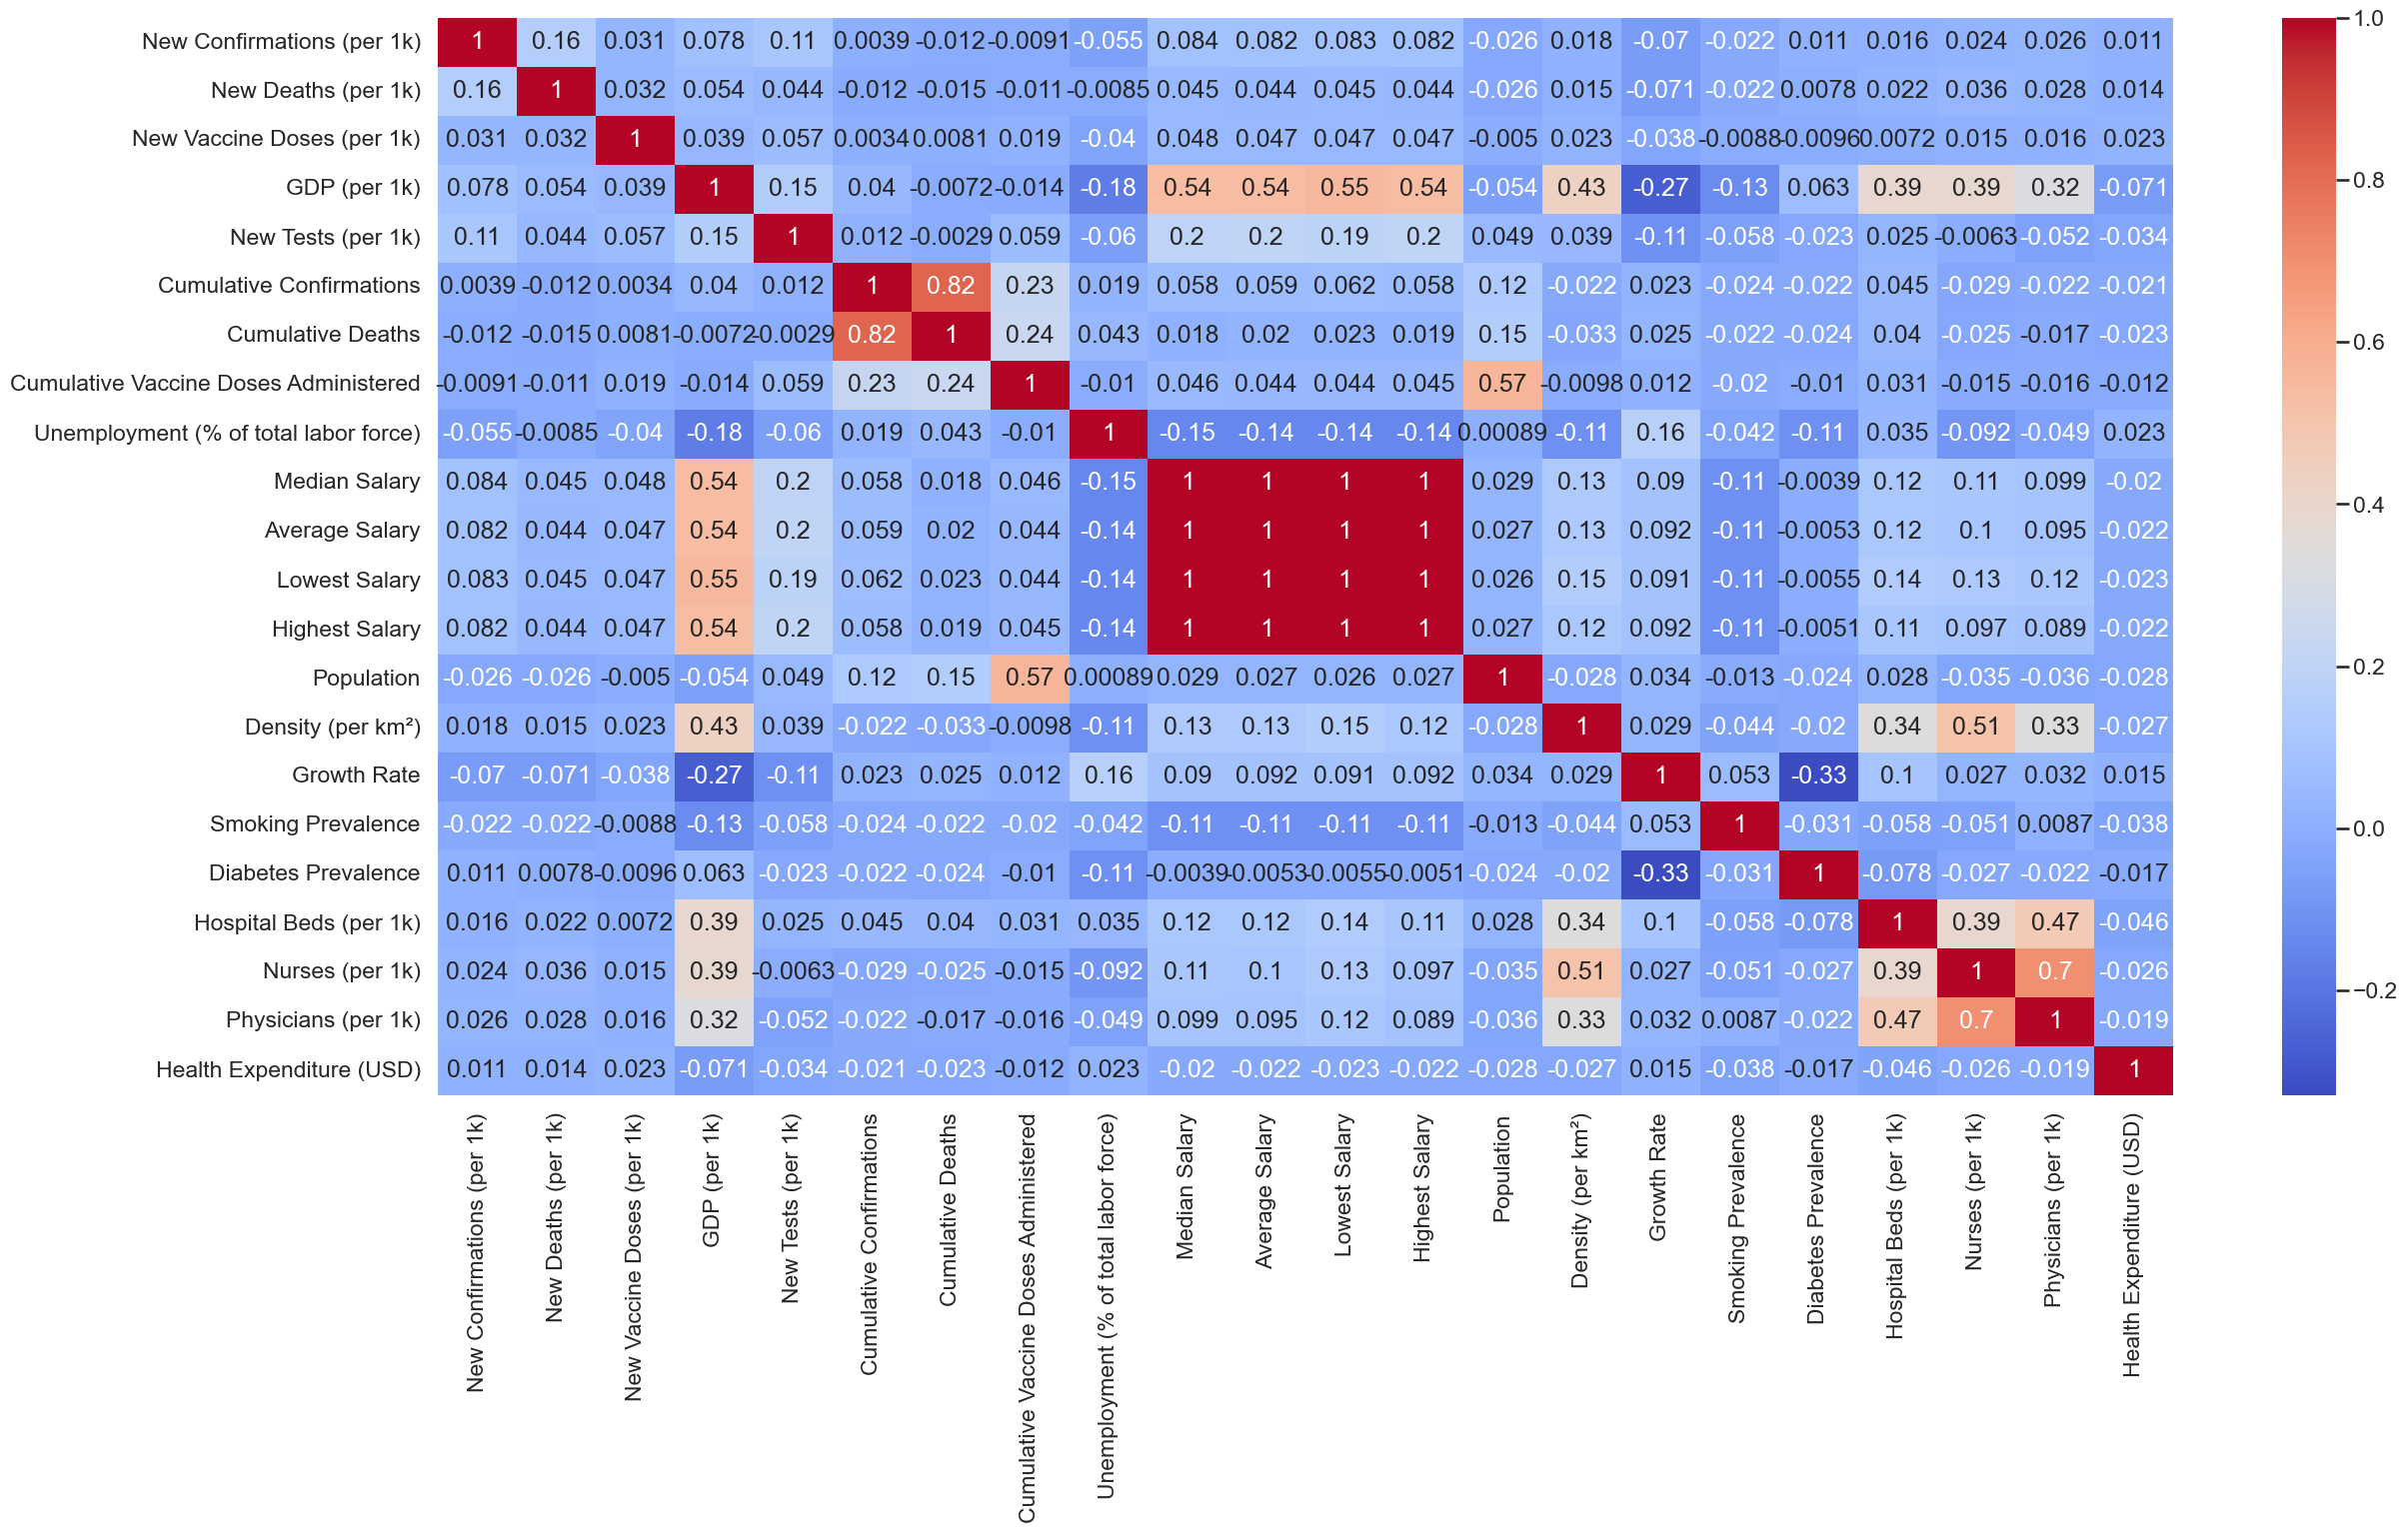

In [39]:
columns = ['new_confirmed_normalized', 'new_deceased_normalized', 'new_vaccine_doses_administered_normalized', 'GDP_normalized', 'new_tested_normalized', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'Unemployment, total (% of total labor force)', 'median_salary', 'average_salary', 'lowest_salary', 'highest_salary', 'Population', 'Density (per km²)', 'Growth Rate', 'smoking_prevalence', 'diabetes_prevalence', 'hospital_beds_per_1000', 'nurses_per_1000', 'physicians_per_1000', 'health_expenditure_usd']

# Calculation of the correlation matrix
correlation_matrix = df[columns].corr()

new_names = {
    'new_confirmed_normalized': 'New Confirmations (per 1k)',
    'new_deceased_normalized': 'New Deaths (per 1k)',
    'new_vaccine_doses_administered_normalized': 'New Vaccine Doses (per 1k)',
    'GDP_normalized': 'GDP (per 1k)',
    'new_tested_normalized': 'New Tests (per 1k)',
    'cumulative_confirmed': 'Cumulative Confirmations',
    'cumulative_deceased': 'Cumulative Deaths',
    'cumulative_vaccine_doses_administered': 'Cumulative Vaccine Doses Administered',
    'Unemployment, total (% of total labor force)': 'Unemployment (% of total labor force)',
    'median_salary': 'Median Salary',
    'average_salary': 'Average Salary',
    'lowest_salary': 'Lowest Salary',
    'highest_salary': 'Highest Salary',
    'Population': 'Population',
    'Density (per km²)': 'Density (per km²)',
    'Growth Rate': 'Growth Rate',
    'smoking_prevalence': 'Smoking Prevalence',
    'diabetes_prevalence': 'Diabetes Prevalence',
    'hospital_beds_per_1000': 'Hospital Beds (per 1k)',
    'nurses_per_1000': 'Nurses (per 1k)',
    'physicians_per_1000': 'Physicians (per 1k)',
    'health_expenditure_usd': 'Health Expenditure (USD)'
}

# Changing index and column labels in the correlation matrix
correlation_matrix = correlation_matrix.rename(index=new_names, columns=new_names)

plt.figure(figsize=(28, 14))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
